# Dependencies and files

## Install dependencies

## Imports

In [156]:
import warnings
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

import time
from tqdm.notebook import tqdm
import requests

sc.settings.set_figure_params(dpi=80)
#sc.set_figure_params(facecolor="white", figsize=(8, 8))
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.verbosity = 3

# Global variables

In [157]:
de_dir_path = '../../data/DE/ANOVA_mean/'

In [158]:
layers = ['L1', 'L2', 'L3', 'L4', 'L5', "L6", 'WM']

In [159]:
cluster_color = ['red', 'yellow', 'orange', 'green', 'purple', 'blue', 'olive', 'pink', 'brown']

In [160]:
conditions = ['human', 'chimp', 'macaque', 'spatial_libd_human']
cond_colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue']
color_dict = {'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green', 'spatial_libd_human': 'tab:blue'}

# Load files

## Pseudobulks

In [161]:
dir_path = 'results/'

In [162]:
os.listdir(dir_path)

['.ipynb_checkpoints',
 'adults_mammals.h5ad',
 'adults_mammals_mean_norm.h5ad',
 'adult_human_pics',
 'ancova_3df_res.pkl',
 'ancova_perm_res.pkl',
 'ancova_res.pkl',
 'annotation.csv',
 'celltypes.csv',
 'chimp_clusters_28.csv',
 'chimp_clusters_50.csv',
 'chimp_clusters_77.csv',
 'chimp_clusters_ancova.csv',
 'chimp_de.pkl',
 'clusters0.01',
 'clusters0.05',
 'colors.csv',
 'constypes.csv',
 'edgeR_chimp_macaque.csv',
 'edgeR_human_chimp.csv',
 'edgeR_human_macaque.csv',
 'EIF1B_all.pdf',
 'expression.csv',
 'FOXP1_all.pdf',
 'gene_selection_df.csv',
 'hs_anova_inter_clusters.csv',
 'hs_layers.csv',
 'hs_norm_splines_adults_mammals.csv',
 'hs_prof.csv',
 'hs_prof_anova.csv',
 'hs_ttest_inter_clusters.csv',
 'human_clusters_28.csv',
 'human_clusters_50.csv',
 'human_clusters_67.csv',
 'human_clusters_77.csv',
 'human_clusters_ancova.csv',
 'human_clusters_ancova_01_cos_all_10.csv',
 'human_clusters_ancova_01_cos_all_6.csv',
 'human_clusters_ancova_01_cos_all_7.csv',
 'human_clusters_

In [163]:
adata_pb_merged_norm = sc.read_h5ad(dir_path + 'adults_mammals_mean_norm.h5ad')
adata_pb_merged_norm

AnnData object with n_obs × n_vars = 170 × 14611
    obs: 'layer', 'sample_id', 'psbulk_n_cells', 'psbulk_counts', 'condition'
    var: 'feature_types', 'mt', 'hb', 'ribo'
    uns: 'log1p'
    layers: 'psbulk_props'

## Specie-specific genes

In [164]:
from statsmodels.stats.multitest import multipletests
res_dict = dict()
res_dict['human-chimp'] = pd.read_csv('results/edgeR_human_chimp.csv', index_col=0)
res_dict['human-macaque'] = pd.read_csv('results/edgeR_human_macaque.csv', index_col=0)
res_dict['chimp-macaque'] = pd.read_csv('results/edgeR_chimp_macaque.csv', index_col=0)

for key, df in res_dict.items():
    mult_test = multipletests(df['PValue'], method='fdr_bh')
    df['p_val_adj'] = mult_test[1]

res_dict['human-chimp'].head()

logFC.spline_1.human  logFC.spline_2.human  logFC.spline_3.human  \
A1BG               0.244038              0.286535              0.252427   
AACS              -0.388070             -0.241365             -0.039750   
AADAT             -0.399771             -0.369816             -0.361727   
AAGAB              0.086928              0.361438              0.044400   
AAK1               0.231119              0.421302              0.032839   

         logCPM         F    PValue  p_val_adj  
A1BG   8.937955  1.353039  0.266747   0.847434  
AACS   8.898749  1.925657  0.131096   0.624955  
AADAT  8.822620  0.269978  0.846744   1.000000  
AAGAB  8.837510  0.579746  0.630315   1.000000  
AAK1   8.977608  0.409947  0.746269   1.000000

In [165]:
sign_genes = lambda df: df[df.p_val_adj < 0.05].index
sign_genes_dict = {key:sign_genes(df) for key, df in res_dict.items()}
sign_genes_dict

{'human-chimp': Index(['ACTN2', 'ADGRB2', 'ADGRG1', 'ADGRL1', 'ALCAM', 'AMZ2', 'ANK3', 'AP2S1',
        'APBA1', 'APBA2',
        ...
        'UQCRB', 'UQCRH', 'VAT1L', 'WDR37', 'WLS', 'ZBTB18', 'ZBTB46',
        'ZCCHC17', 'ZMYND8', 'ZNF706'],
       dtype='object', length=224),
 'human-macaque': Index(['AACS', 'AARS1', 'AATK', 'ABAT', 'ABCA2', 'ABCC10', 'ABCC5', 'ABCD3',
        'ABCD4', 'ABHD10',
        ...
        'ZNF483', 'ZNF536', 'ZNF579', 'ZNF706', 'ZNF770', 'ZNF791', 'ZNHIT3',
        'ZRANB2', 'ZYG11B', 'ZYX'],
       dtype='object', length=2141),
 'chimp-macaque': Index(['AARS1', 'AATK', 'ABAT', 'ABCD3', 'ABCD4', 'ABLIM3', 'ABTB1', 'ACAD9',
        'ACHE', 'ACOT7',
        ...
        'YPEL5', 'YWHAB', 'YWHAG', 'ZDHHC22', 'ZDHHC8', 'ZDHHC9', 'ZFAND5',
        'ZMPSTE24', 'ZNF536', 'ZNF655'],
       dtype='object', length=1057)}

Попробуем определить человеко-специфичные гены как $(HC\bigcap HM)\setminus CM$

In [166]:
hs_genes = sign_genes_dict['human-chimp'].intersection(sign_genes_dict['human-macaque']).difference(sign_genes_dict['chimp-macaque'])
hs_genes, hs_genes.size

(Index(['ALCAM', 'AMZ2', 'ASAH1', 'ASAP2', 'ATP1A3', 'CALR', 'CAMLG', 'CD47',
        'CHST10', 'CLSTN1', 'COTL1', 'CX3CL1', 'DLGAP4', 'ECSIT', 'EEF1G',
        'EIF1B', 'EIF3L', 'ERC1', 'ETFB', 'FBXO9', 'GAD1', 'GDE1', 'GNAI1',
        'GPX4', 'ID2', 'IGFBP2', 'IGFBP6', 'IGSF21', 'KIF21B', 'KLHL2', 'LDHB',
        'LHX2', 'LPL', 'MACF1', 'MAP1LC3B', 'MAZ', 'MRPL51', 'NDUFB10',
        'NDUFB7', 'NRXN1', 'NRXN2', 'NUAK1', 'OLA1', 'PCP4', 'PDE1A', 'PES1',
        'PPA1', 'PPP1CC', 'PSMB7', 'PTPRK', 'RBIS', 'RGS2', 'SCN3B', 'SEPTIN6',
        'ST3GAL5', 'SULF2', 'SYNGAP1', 'TCEAL4', 'TMED3', 'TRIR', 'UBE2V1',
        'VAT1L', 'ZBTB18', 'ZBTB46', 'ZNF706'],
       dtype='object'),
 65)

In [167]:
background_genes = res_dict['human-chimp'].index.tolist()
len(background_genes)

7790

## Load expression

In [168]:
df_cont = pd.read_csv('results/mean_norm_expr_adults_mammals.csv', index_col=0)
df_cont.head()

A1BG      A1CF     A2ML1    A4GALT      AAAS      AACS  \
human_759_WM -0.065597 -0.007003 -0.003975 -0.013253  0.010394  0.040782   
human_j12_WM -0.061484 -0.001560  0.001832  0.006629  0.018847  0.023573   
human_j3_WM  -0.098580 -0.000419  0.007390  0.037316  0.029047 -0.029669   
human_j4_WM  -0.093707 -0.003433 -0.003631  0.010995  0.056550 -0.021900   
human_j6_WM  -0.078156 -0.000970  0.028050 -0.000334 -0.015202  0.004190   

              AADAC   AADACL3     AADAT     AAGAB  ...      ZW10    ZWILCH  \
human_759_WM    0.0  0.000000 -0.054153  0.025312  ... -0.015923  0.041272   
human_j12_WM    0.0  0.000000 -0.067045 -0.045136  ...  0.025553 -0.052177   
human_j3_WM     0.0  0.000000 -0.101685 -0.012873  ...  0.000273 -0.083695   
human_j4_WM     0.0  0.000000 -0.101653 -0.054878  ...  0.008096 -0.118206   
human_j6_WM     0.0  0.009556 -0.134004  0.010452  ...  0.005293 -0.005660   

                 ZWINT      ZXDC    ZYG11A    ZYG11B       ZYX     ZZEF1  \
human_759_WM  0.020585 -0.024429 -0.004823 -0.026922 -0.087423 -0.063499   
human_j12_WM -0.014197  0.008867 -0.000207 -0.147507 -0.031736 -0.016625   
human_j3_WM  -0.018681  0.022813  0.008433 -0.054969 -0.062960 -0.078859   
human_j4_WM  -0.006962  0.020539  0.008355 -0.023523 -0.112695 -0.024069   
human_j6_WM  -0.039875  0.017323 -0.001348  0.020074 -0.112545 -0.058979   

              layer  condition  
human_759_WM      7      human  
human_j12_WM      7      human  
human_j3_WM       7      human  
human_j4_WM       7      human  
human_j6_WM       7      human  

[5 rows x 14613 columns]

In [169]:
df_spline = pd.read_csv('results/hs_norm_splines_adults_mammals.csv', index_col=0)

In [170]:
common_hs_genes = df_cont.columns.intersection(hs_genes)
common_hs_genes

Index(['ALCAM', 'AMZ2', 'ASAH1', 'ASAP2', 'ATP1A3', 'CALR', 'CAMLG', 'CD47',
       'CHST10', 'CLSTN1', 'COTL1', 'CX3CL1', 'DLGAP4', 'ECSIT', 'EEF1G',
       'EIF1B', 'EIF3L', 'ERC1', 'ETFB', 'FBXO9', 'GAD1', 'GDE1', 'GNAI1',
       'GPX4', 'ID2', 'IGFBP2', 'IGFBP6', 'IGSF21', 'KIF21B', 'KLHL2', 'LDHB',
       'LHX2', 'LPL', 'MACF1', 'MAP1LC3B', 'MAZ', 'MRPL51', 'NDUFB10',
       'NDUFB7', 'NRXN1', 'NRXN2', 'NUAK1', 'OLA1', 'PCP4', 'PDE1A', 'PES1',
       'PPA1', 'PPP1CC', 'PSMB7', 'PTPRK', 'RGS2', 'SCN3B', 'ST3GAL5', 'SULF2',
       'SYNGAP1', 'TCEAL4', 'TMED3', 'TRIR', 'UBE2V1', 'VAT1L', 'ZBTB18',
       'ZBTB46', 'ZNF706'],
      dtype='object')

# Helpful functions

In [171]:
def p_val_group(value):
    if value >= 0.05:
        return 'No significance'
    elif  0.01 <= value < 0.05:
        return 'p < 0.05'
    elif  0.001 <= value < 0.01:
        return 'p < 0.01'
    else:
        return 'p < 0.001'

In [172]:
color_discrete_map = {'No significance': 'darkblue',
                      'p < 0.05': 'purple',
                      'p < 0.01': 'darkorange',
                      'p < 0.001': 'yellow'}

In [173]:
class GeneCluster:
    def __init__(self, genes, descr, label, background_genes, **kwargs):
        self.label = label
        self.genes = genes
        self.descr = descr
        self.background_genes = background_genes
        self.userlist_id = self._get_userlist_id()
        self.background_id = self._get_background_id()
        self.enrichment_res = dict()

    
    def _get_userlist_id(self):
        base_url = "https://maayanlab.cloud/speedrichr"

        description = "sample gene set with background"

        res = requests.post(
            base_url+'/api/addList',
            files=dict(
              list=(None, '\n'.join(self.genes)),
              description=(None, description),
            )
          )
        if res.ok:
            userlist_response = res.json()
        else:
            raise Exception('Error analyzing gene list')
        return userlist_response['userListId']
    
    def _get_background_id(self):
        base_url = "https://maayanlab.cloud/speedrichr"

        res = requests.post(
            base_url+'/api/addbackground',
            data=dict(background='\n'.join(self.background_genes))
        )

        if res.ok:
            background_response = res.json()
        else:
            raise Exception('Error analyzing gene list')
        return background_response['backgroundid']

    def enrich(self, gene_set_library):
        # get enrichment results
        base_url = "https://maayanlab.cloud/speedrichr"

        res = requests.post(
                base_url+'/api/backgroundenrich',
                data=dict(
                userListId=self.userlist_id,
                backgroundid=self.background_id,
                backgroundType=gene_set_library,
                )
            )
        if res.ok:
            data = res.json()
        else:
            raise Exception('Error analyzing gene list')
        # convert results to df
        columns = ['Rank', 'Term', 'p-val', 'Z-score', 'Combined score', 'Overlapping genes', 'Adjusted P-value', 'Old p-value', 'Old adjusted p-value']
        results = pd.DataFrame(data[gene_set_library], columns=columns)
        # preprocess df
        results.Term = results.Term.astype(str)
        results['num_overlap_genes'] = results['Overlapping genes'].apply(lambda x: len(x))
        results['neg_log10(p_adj)'] = - np.log10(results['Adjusted P-value'])
        results['cluster_label'] = self.label
        # save to enrichment_res
        self.enrichment_res[gene_set_library] = results

    @staticmethod
    def enrich_geneclusters(geneclusters, gene_set_library):
        for gc in geneclusters:
            gc.enrich(gene_set_library)

# Correlation of profiles

In [174]:
from scipy.stats import spearmanr, pearsonr

columns = ['sp_ha', 'sp_mca', 'pear_ha', 'pear_mca']
corr_list = []
for gene in df_spline.columns[:-1]:
    human_spl = df_spline.loc[df_spline.condition == 'human', gene].values
    adult_spl = df_spline.loc[df_spline.condition == 'spatial_libd_human', gene].values
    chimp_spl = df_spline.loc[df_spline.condition == 'chimp', gene].values
    macaque_spl = df_spline.loc[df_spline.condition == 'macaque', gene].values
    ch_m_spl = (chimp_spl + macaque_spl) / 2



    pear_ha = pearsonr(adult_spl, human_spl)
    pear_mca = pearsonr(adult_spl, ch_m_spl)
    sp_ha = spearmanr(adult_spl, human_spl)
    sp_mca = spearmanr(adult_spl, macaque_spl)
    corr_list.append([sp_ha[0], sp_mca[0], pear_ha[0], pear_mca[0]])

corr_df = pd.DataFrame(corr_list, columns=columns, index=df_spline.columns[:-1])
corr_df.head()

sp_ha    sp_mca   pear_ha  pear_mca
ALCAM  -0.325018 -0.455268 -0.111069 -0.257090
AMZ2    0.094344 -0.743376  0.243436 -0.685436
ASAH1   0.892063 -0.847438  0.902563 -0.869301
ASAP2  -0.374021  0.974825 -0.394395  0.960807
ATP1A3 -0.031857  0.564916 -0.124596  0.569056

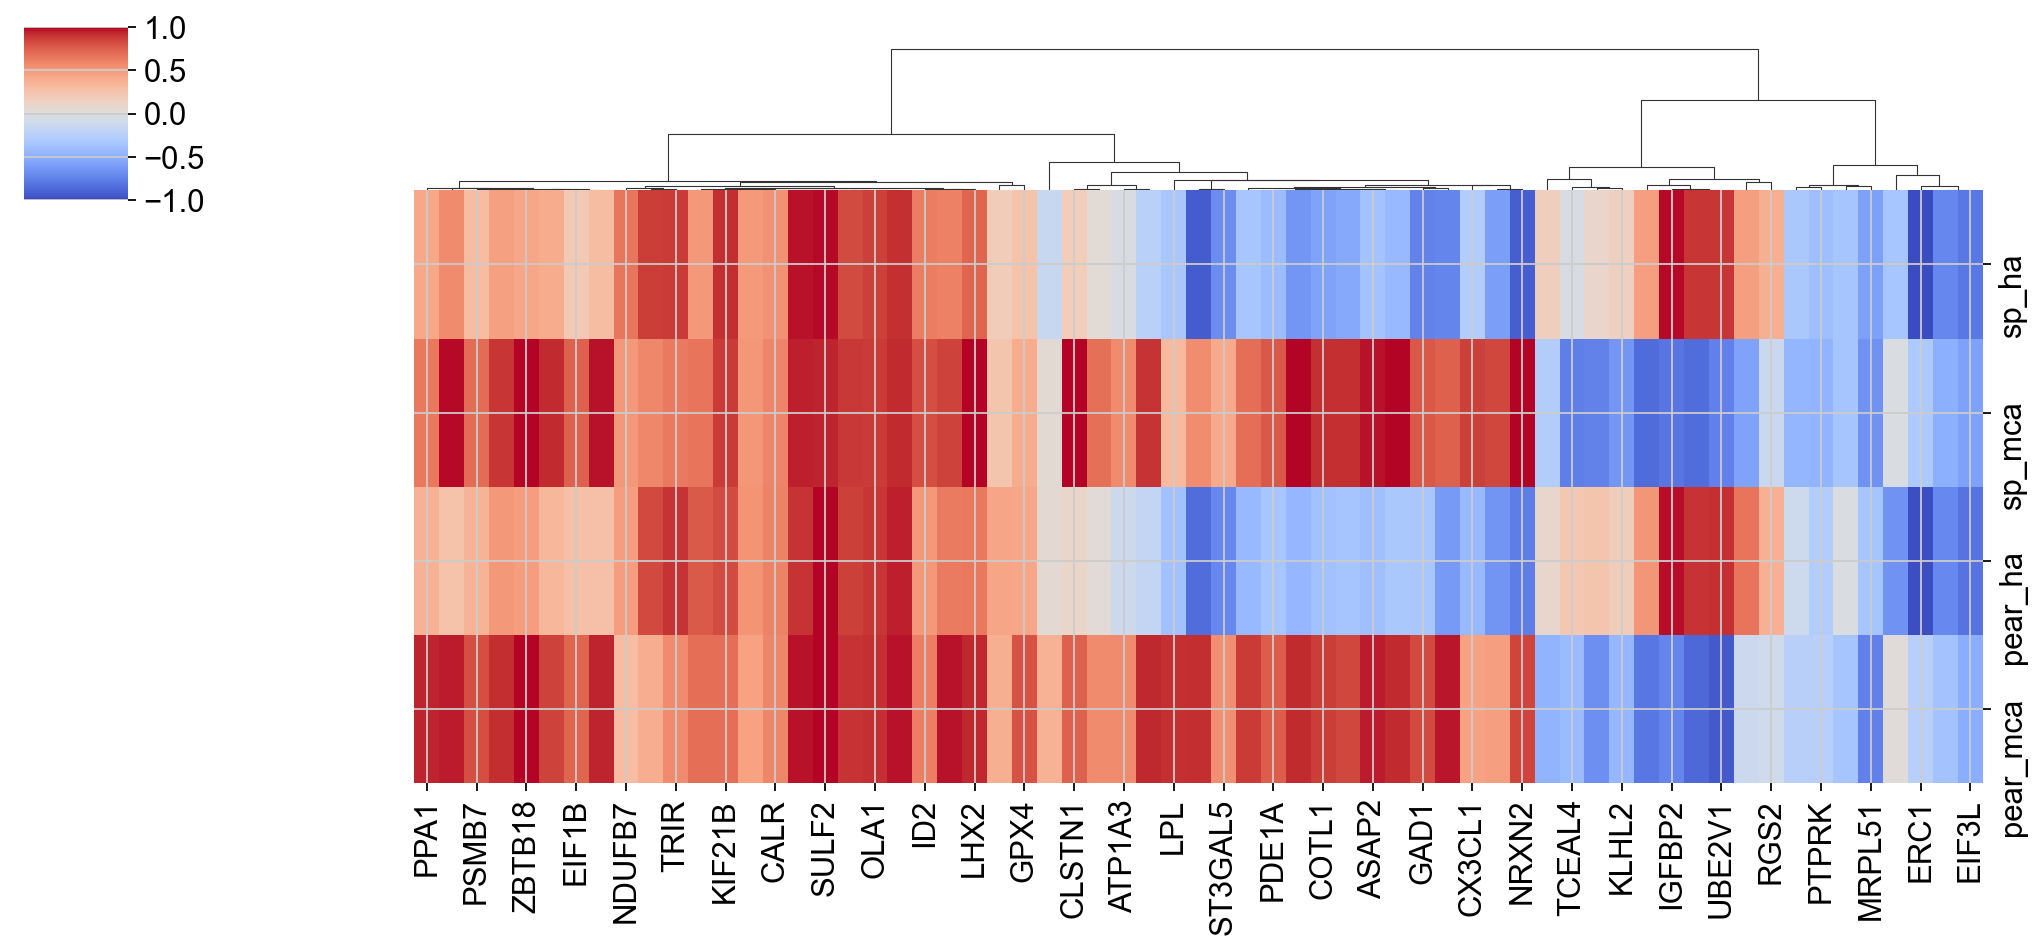

In [175]:
#fig = plt.figure(figsize=(10, 3), dpi=60)
clust = sns.clustermap(corr_df.T, cmap='coolwarm', figsize=(13, 6), row_cluster=False, metric='cosine')

In [176]:
corr_df['mean_ha'] = (corr_df['sp_ha'] + corr_df['pear_ha']) / 2
corr_df['mean_mca'] = (corr_df['sp_mca'] + corr_df['pear_mca']) / 2
corr_df['corr_diff'] = corr_df['mean_ha'] - corr_df['mean_mca']

corr_df['pear_diff'] = corr_df['pear_ha'] - corr_df['pear_mca']
corr_df['sp_diff'] = corr_df['sp_ha'] - corr_df['sp_mca']

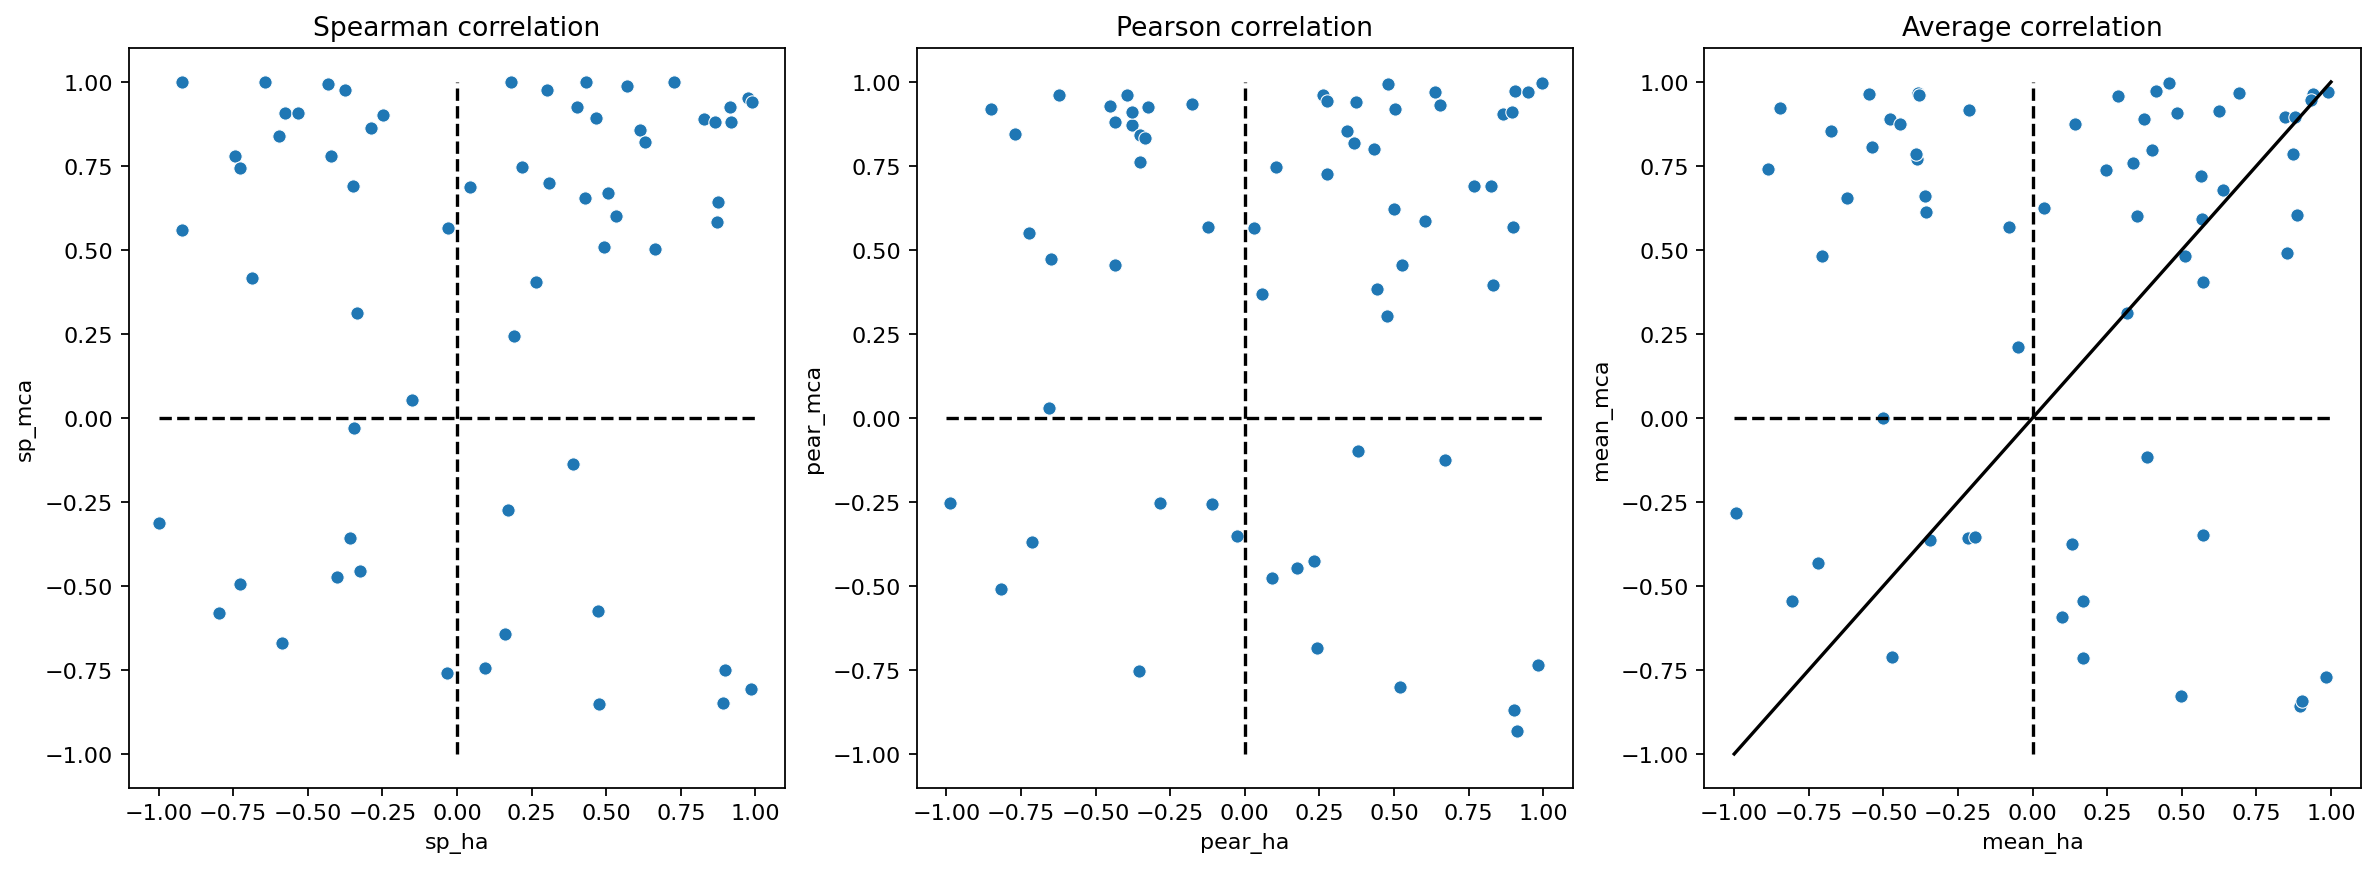

In [177]:
mpl.rcdefaults()

fig, ax = plt.subplots(1, 3, figsize=(18, 6), dpi=80)
sns.scatterplot(corr_df, x='sp_ha', y='sp_mca', ax=ax[0])
ax[0].hlines(y=0, xmin=-1, xmax=1, colors='black', linestyles='dashed')
ax[0].vlines(x=0, ymin=-1, ymax=1, colors='black', linestyles='dashed')
ax[0].set_title('Spearman correlation')
ax[0].grid(False)

sns.scatterplot(corr_df, x='pear_ha', y='pear_mca', ax=ax[1])
ax[1].hlines(y=0, xmin=-1, xmax=1, colors='black', linestyles='dashed')
ax[1].vlines(x=0, ymin=-1, ymax=1, colors='black', linestyles='dashed')
ax[1].set_title('Pearson correlation')
ax[1].grid(False)

sns.scatterplot(corr_df, x='mean_ha', y='mean_mca', ax=ax[2])
ax[2].hlines(y=0, xmin=-1, xmax=1, colors='black', linestyles='dashed')
ax[2].vlines(x=0, ymin=-1, ymax=1, colors='black', linestyles='dashed')
ax[2].plot([-1, 1], [-1, 1], '-', color='black')
ax[2].set_title('Average correlation')
ax[2].grid(False)

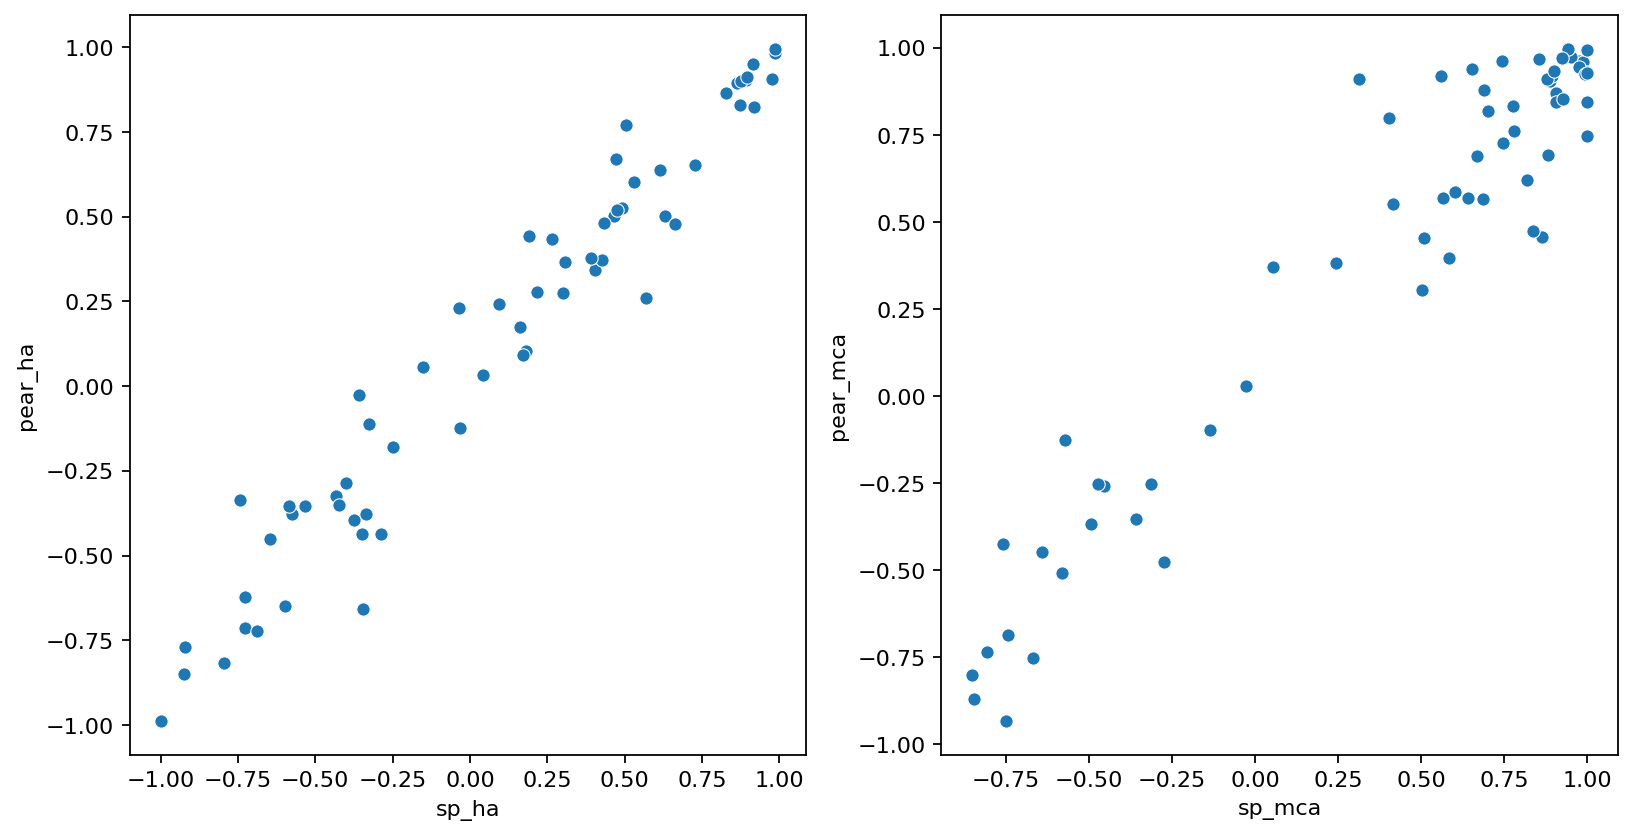

In [178]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=80)
sns.scatterplot(x=corr_df['sp_ha'], y=corr_df['pear_ha'], ax=ax[0])
ax[0].grid(False)

sns.scatterplot(corr_df, x=corr_df['sp_mca'], y=corr_df['pear_mca'], ax=ax[1])
ax[1].grid(False)

In [179]:
corr_df['label'] = 'Zero'
# corr_df.loc[corr_df['mean_mca'] < 0, 'label'] = 'human-specific'
# corr_df.loc[(corr_df['corr_diff'] > 0) & ~(corr_df['mean_mca'] < 0), 'label'] = 'maybe human-specific'
# corr_df.loc[(corr_df['corr_diff'] < 0) & (corr_df['corr_diff'] >= -0.5) & ~(corr_df['mean_mca'] < 0), 'label'] = 'maybe age-specific'
# corr_df.loc[(corr_df['corr_diff'] < -0.5) & ~(corr_df['mean_mca'] < 0), 'label'] = 'age-specific'

corr_df.loc[corr_df['pear_diff'] > 0.5, 'label'] = 'human-specific'
corr_df.loc[(corr_df['pear_diff'] > 0) & (corr_df['pear_diff'] <= 0.5), 'label'] = 'maybe human-specific'
corr_df.loc[(corr_df['pear_diff'] < 0) & (corr_df['pear_diff'] >= -0.5), 'label'] = 'maybe age-specific'
corr_df.loc[corr_df['pear_diff'] < -0.5, 'label'] = 'age-specific'

corr_df.label.value_counts()

label
age-specific            26
maybe age-specific      16
maybe human-specific    12
human-specific           9
Name: count, dtype: int64

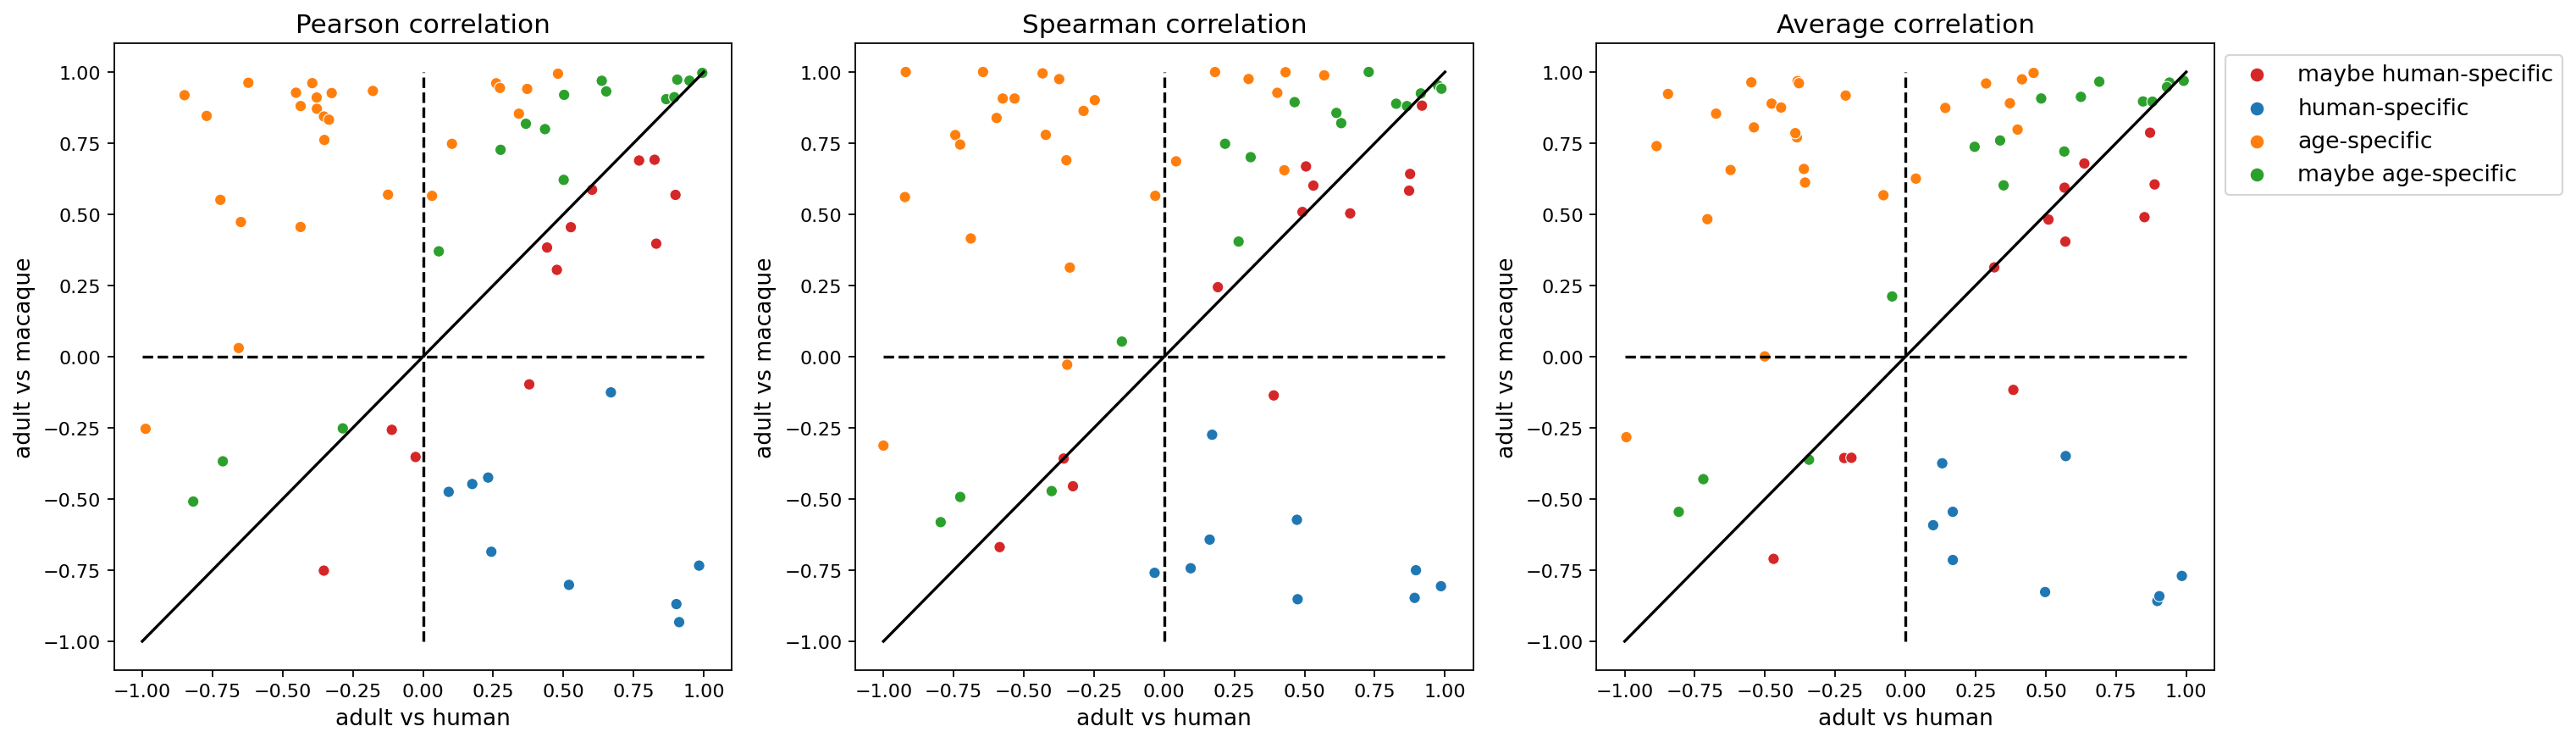

In [180]:
mpl.rcdefaults()

fig, ax = plt.subplots(1, 3, figsize=(20, 6), dpi=80)
color_dict_labels = {'human-specific': 'tab:blue', 'age-specific': 'tab:orange', 'maybe human-specific': 'tab:red', 'maybe age-specific': 'tab:green'}

sns.scatterplot(corr_df, x='pear_ha', y='pear_mca', ax=ax[0], hue='label', palette=color_dict_labels)
ax[0].hlines(y=0, xmin=-1, xmax=1, colors='black', linestyles='dashed')
ax[0].vlines(x=0, ymin=-1, ymax=1, colors='black', linestyles='dashed')
ax[0].plot([-1, 1], [-1, 1], '-', color='black')
ax[0].set_title('Pearson correlation', fontsize=14)
ax[0].set_ylabel('adult vs macaque', fontsize=12)
ax[0].set_xlabel('adult vs human', fontsize=12)
ax[0].grid(False)
ax[0].get_legend().remove()

sns.scatterplot(corr_df, x='sp_ha', y='sp_mca', ax=ax[1], hue='label', palette=color_dict_labels)
ax[1].hlines(y=0, xmin=-1, xmax=1, colors='black', linestyles='dashed')
ax[1].vlines(x=0, ymin=-1, ymax=1, colors='black', linestyles='dashed')
ax[1].plot([-1, 1], [-1, 1], '-', color='black')
ax[1].set_title('Spearman correlation', fontsize=14)
ax[1].set_ylabel('adult vs macaque', fontsize=12)
ax[1].set_xlabel('adult vs human', fontsize=12)
ax[1].grid(False)
ax[1].get_legend().remove()

sns.scatterplot(corr_df, x='mean_ha', y='mean_mca', ax=ax[2], hue='label', palette=color_dict_labels)
ax[2].hlines(y=0, xmin=-1, xmax=1, colors='black', linestyles='dashed')
ax[2].vlines(x=0, ymin=-1, ymax=1, colors='black', linestyles='dashed')
ax[2].plot([-1, 1], [-1, 1], '-', color='black')
ax[2].set_title('Average correlation', fontsize=14)
ax[2].set_ylabel('adult vs macaque', fontsize=12)
ax[2].set_xlabel('adult vs human', fontsize=12)
ax[2].grid(False)
ax[2].legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1), prop={"size":12})
plt.show()

Text(0, 0.5, 'corr(adult vs newborn human) - corr(adult vs newborn macaque)')

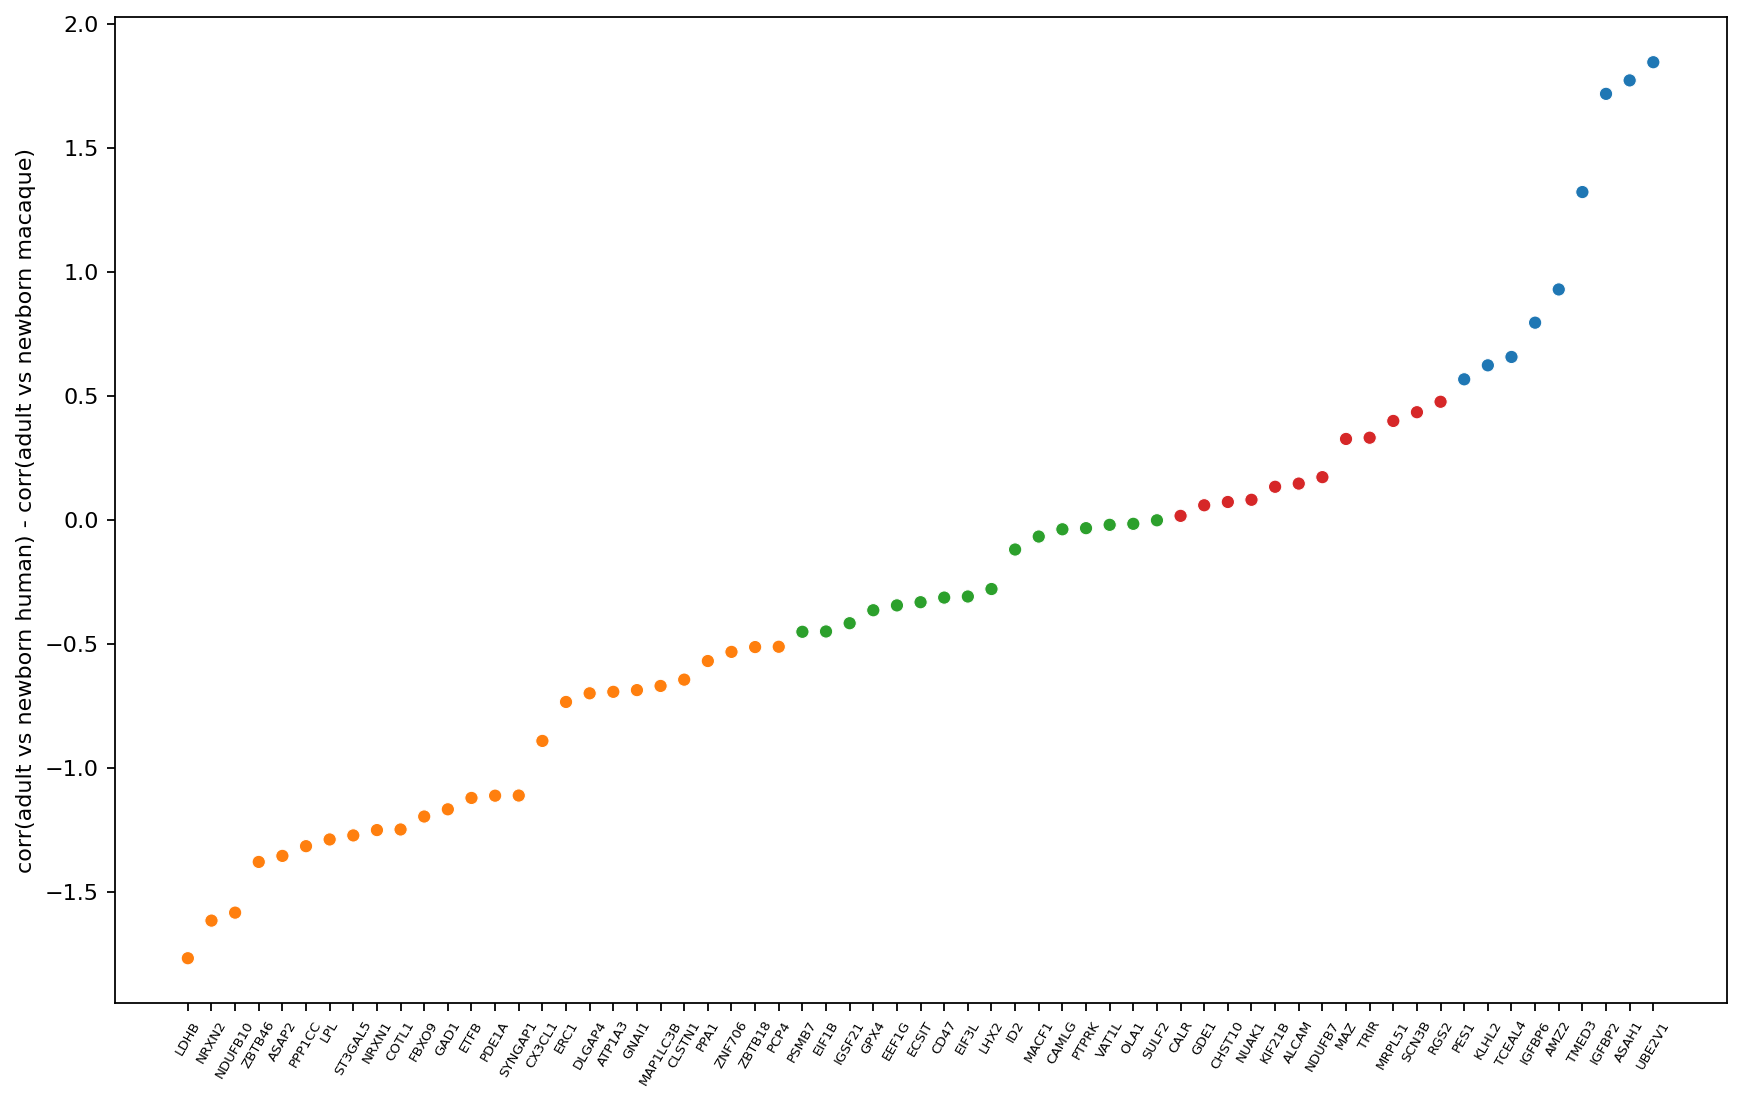

In [181]:
fig = plt.figure(figsize=(13, 8), dpi=80)
corr_df = corr_df.sort_values(by='pear_diff')
color_dict_labels = {'human-specific': 'tab:blue', 'age-specific': 'tab:orange', 'maybe human-specific': 'tab:red', 'maybe age-specific': 'tab:green'}
sns.scatterplot(corr_df['pear_diff'], color=corr_df.label.map(color_dict_labels))
plt.xticks(rotation=60, fontsize=6);
plt.ylabel("corr(adult vs newborn human) - corr(adult vs newborn macaque)", fontsize=10)

## Functional analysis

In [182]:
import gseapy
#gseapy.get_library_name()

In [183]:
enr_bg = gseapy.enrichr(gene_list=hs_genes.to_list(),
                        gene_sets=['GO_Biological_Process_2021', 'Azimuth_Cell_Types_2021', 'SynGO_2022', 'KEGG_2021_Human'],
                        outdir=None, # don't write to disk
                        background=background_genes
                       ).results

In [184]:
enr_bg[enr_bg['Adjusted P-value'] < 0.05].index.size

1

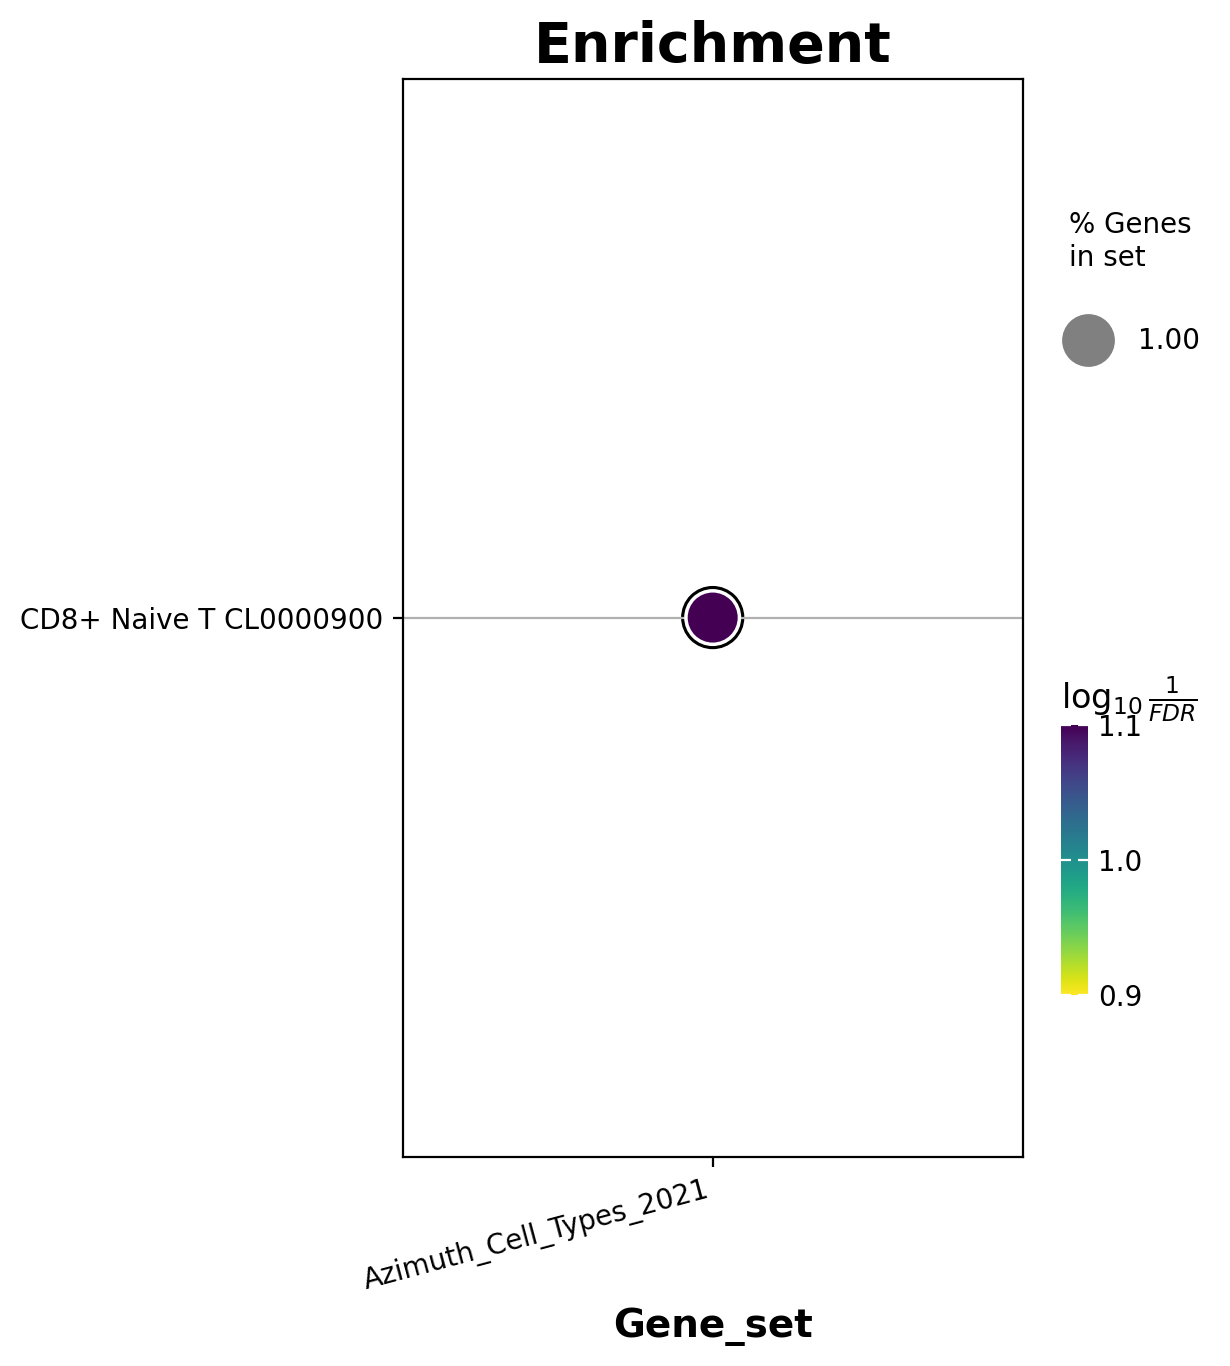

In [185]:
# categorical scatterplot
try:
    ax = gseapy.dotplot(enr_bg,
                column="Adjusted P-value",
                x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
                size=3,
                top_term=6,
                figsize=(5,7),
                title = "Enrichment",
                xticklabels_rot=15, # rotate xtick labels
                show_ring=True, # set to False to revmove outer ring
                marker='o',
                )

    ax.tick_params(axis='both', which='major', labelsize=10)
except e:
    print(e)

In [186]:
common_hs_genes, len(common_hs_genes)

(Index(['ALCAM', 'AMZ2', 'ASAH1', 'ASAP2', 'ATP1A3', 'CALR', 'CAMLG', 'CD47',
        'CHST10', 'CLSTN1', 'COTL1', 'CX3CL1', 'DLGAP4', 'ECSIT', 'EEF1G',
        'EIF1B', 'EIF3L', 'ERC1', 'ETFB', 'FBXO9', 'GAD1', 'GDE1', 'GNAI1',
        'GPX4', 'ID2', 'IGFBP2', 'IGFBP6', 'IGSF21', 'KIF21B', 'KLHL2', 'LDHB',
        'LHX2', 'LPL', 'MACF1', 'MAP1LC3B', 'MAZ', 'MRPL51', 'NDUFB10',
        'NDUFB7', 'NRXN1', 'NRXN2', 'NUAK1', 'OLA1', 'PCP4', 'PDE1A', 'PES1',
        'PPA1', 'PPP1CC', 'PSMB7', 'PTPRK', 'RGS2', 'SCN3B', 'ST3GAL5', 'SULF2',
        'SYNGAP1', 'TCEAL4', 'TMED3', 'TRIR', 'UBE2V1', 'VAT1L', 'ZBTB18',
        'ZBTB46', 'ZNF706'],
       dtype='object'),
 63)

In [187]:
gene_clust = list()
enrich_results = list()
geneset_dict = dict()

for group in ['age-specific', 'maybe age-specific', 'maybe human-specific', 'human-specific']:
    gene_set = corr_df[corr_df.label == group].index.to_list()
    gene_clust.append(GeneCluster(gene_set, group, group, background_genes))
    geneset_dict[group] = gene_set
    time.sleep(1)

In [188]:
print(geneset_dict)

{'age-specific': ['LDHB', 'NRXN2', 'NDUFB10', 'ZBTB46', 'ASAP2', 'PPP1CC', 'LPL', 'ST3GAL5', 'NRXN1', 'COTL1', 'FBXO9', 'GAD1', 'ETFB', 'PDE1A', 'SYNGAP1', 'CX3CL1', 'ERC1', 'DLGAP4', 'ATP1A3', 'GNAI1', 'MAP1LC3B', 'CLSTN1', 'PPA1', 'ZNF706', 'ZBTB18', 'PCP4'], 'maybe age-specific': ['PSMB7', 'EIF1B', 'IGSF21', 'GPX4', 'EEF1G', 'ECSIT', 'CD47', 'EIF3L', 'LHX2', 'ID2', 'MACF1', 'CAMLG', 'PTPRK', 'VAT1L', 'OLA1', 'SULF2'], 'maybe human-specific': ['CALR', 'GDE1', 'CHST10', 'NUAK1', 'KIF21B', 'ALCAM', 'NDUFB7', 'MAZ', 'TRIR', 'MRPL51', 'SCN3B', 'RGS2'], 'human-specific': ['PES1', 'KLHL2', 'TCEAL4', 'IGFBP6', 'AMZ2', 'TMED3', 'IGFBP2', 'ASAH1', 'UBE2V1']}


## GO_Biological_Process_2023

In [189]:
db_name = 'GO_Biological_Process_2023'
GeneCluster.enrich_geneclusters(gene_clust,db_name )

In [190]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val  \
Term                                                                 
Vocal Learning (GO:0042297)                            1  0.000064   
Imitative Learning (GO:0098596)                        2  0.000064   
Auditory Behavior (GO:0031223)                         3  0.000064   
Learned Vocalization Behavior Or Vocal Learning...     4  0.000064   
Postsynaptic Density Assembly (GO:0097107)             5  0.000064   

                                                       Z-score  \
Term                                                             
Vocal Learning (GO:0042297)                         323.416667   
Imitative Learning (GO:0098596)                     323.416667   
Auditory Behavior (GO:0031223)                      323.416667   
Learned Vocalization Behavior Or Vocal Learning...  323.416667   
Postsynaptic Density Assembly (GO:0097107)          323.416667   

                                                    Combined score  \
Term                                                                 
Vocal Learning (GO:0042297)                            3123.069641   
Imitative Learning (GO:0098596)                        3123.069641   
Auditory Behavior (GO:0031223)                         3123.069641   
Learned Vocalization Behavior Or Vocal Learning...     3123.069641   
Postsynaptic Density Assembly (GO:0097107)             3123.069641   

                                                   Overlapping genes  \
Term                                                                   
Vocal Learning (GO:0042297)                           [NRXN1, NRXN2]   
Imitative Learning (GO:0098596)                       [NRXN1, NRXN2]   
Auditory Behavior (GO:0031223)                        [NRXN1, NRXN2]   
Learned Vocalization Behavior Or Vocal Learning...    [NRXN1, NRXN2]   
Postsynaptic Density Assembly (GO:0097107)            [NRXN1, NRXN2]   

                                                    Adjusted P-value  \
Term                                                                   
Vocal Learning (GO:0042297)                                 0.003841   
Imitative Learning (GO:0098596)                             0.003841   
Auditory Behavior (GO:0031223)                              0.003841   
Learned Vocalization Behavior Or Vocal Learning...          0.003841   
Postsynaptic Density Assembly (GO:0097107)                  0.003841   

                                                    Old p-value  \
Term                                                              
Vocal Learning (GO:0042297)                                   0   
Imitative Learning (GO:0098596)                               0   
Auditory Behavior (GO:0031223)                                0   
Learned Vocalization Behavior Or Vocal Learning...            0   
Postsynaptic Density Assembly (GO:0097107)                    0   

                                                    Old adjusted p-value  \
Term                                                                       
Vocal Learning (GO:0042297)                                            0   
Imitative Learning (GO:0098596)                                        0   
Auditory Behavior (GO:0031223)                                         0   
Learned Vocalization Behavior Or Vocal Learning...                     0   
Postsynaptic Density Assembly (GO:0097107)                             0   

                                                    num_overlap_genes  \
Term                                                                    
Vocal Learning (GO:0042297)                                         2   
Imitative Learning (GO:0098596)                                     2   
Auditory Behavior (GO:0031223)                                      2   
Learned Vocalization Behavior Or Vocal Learning...                  2   
Postsynaptic Density Assembly (GO:0097107)                          2   

                                                    neg_log10(p_adj)  \
Term      

In [191]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 20)].index.unique()
terms.size

31

In [192]:
enrich_res[enrich_res.cluster_label == 5]

Empty DataFrame
Columns: [Rank, p-val, Z-score, Combined score, Overlapping genes, Adjusted P-value, Old p-value, Old adjusted p-value, num_overlap_genes, neg_log10(p_adj), cluster_label]
Index: []

In [193]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

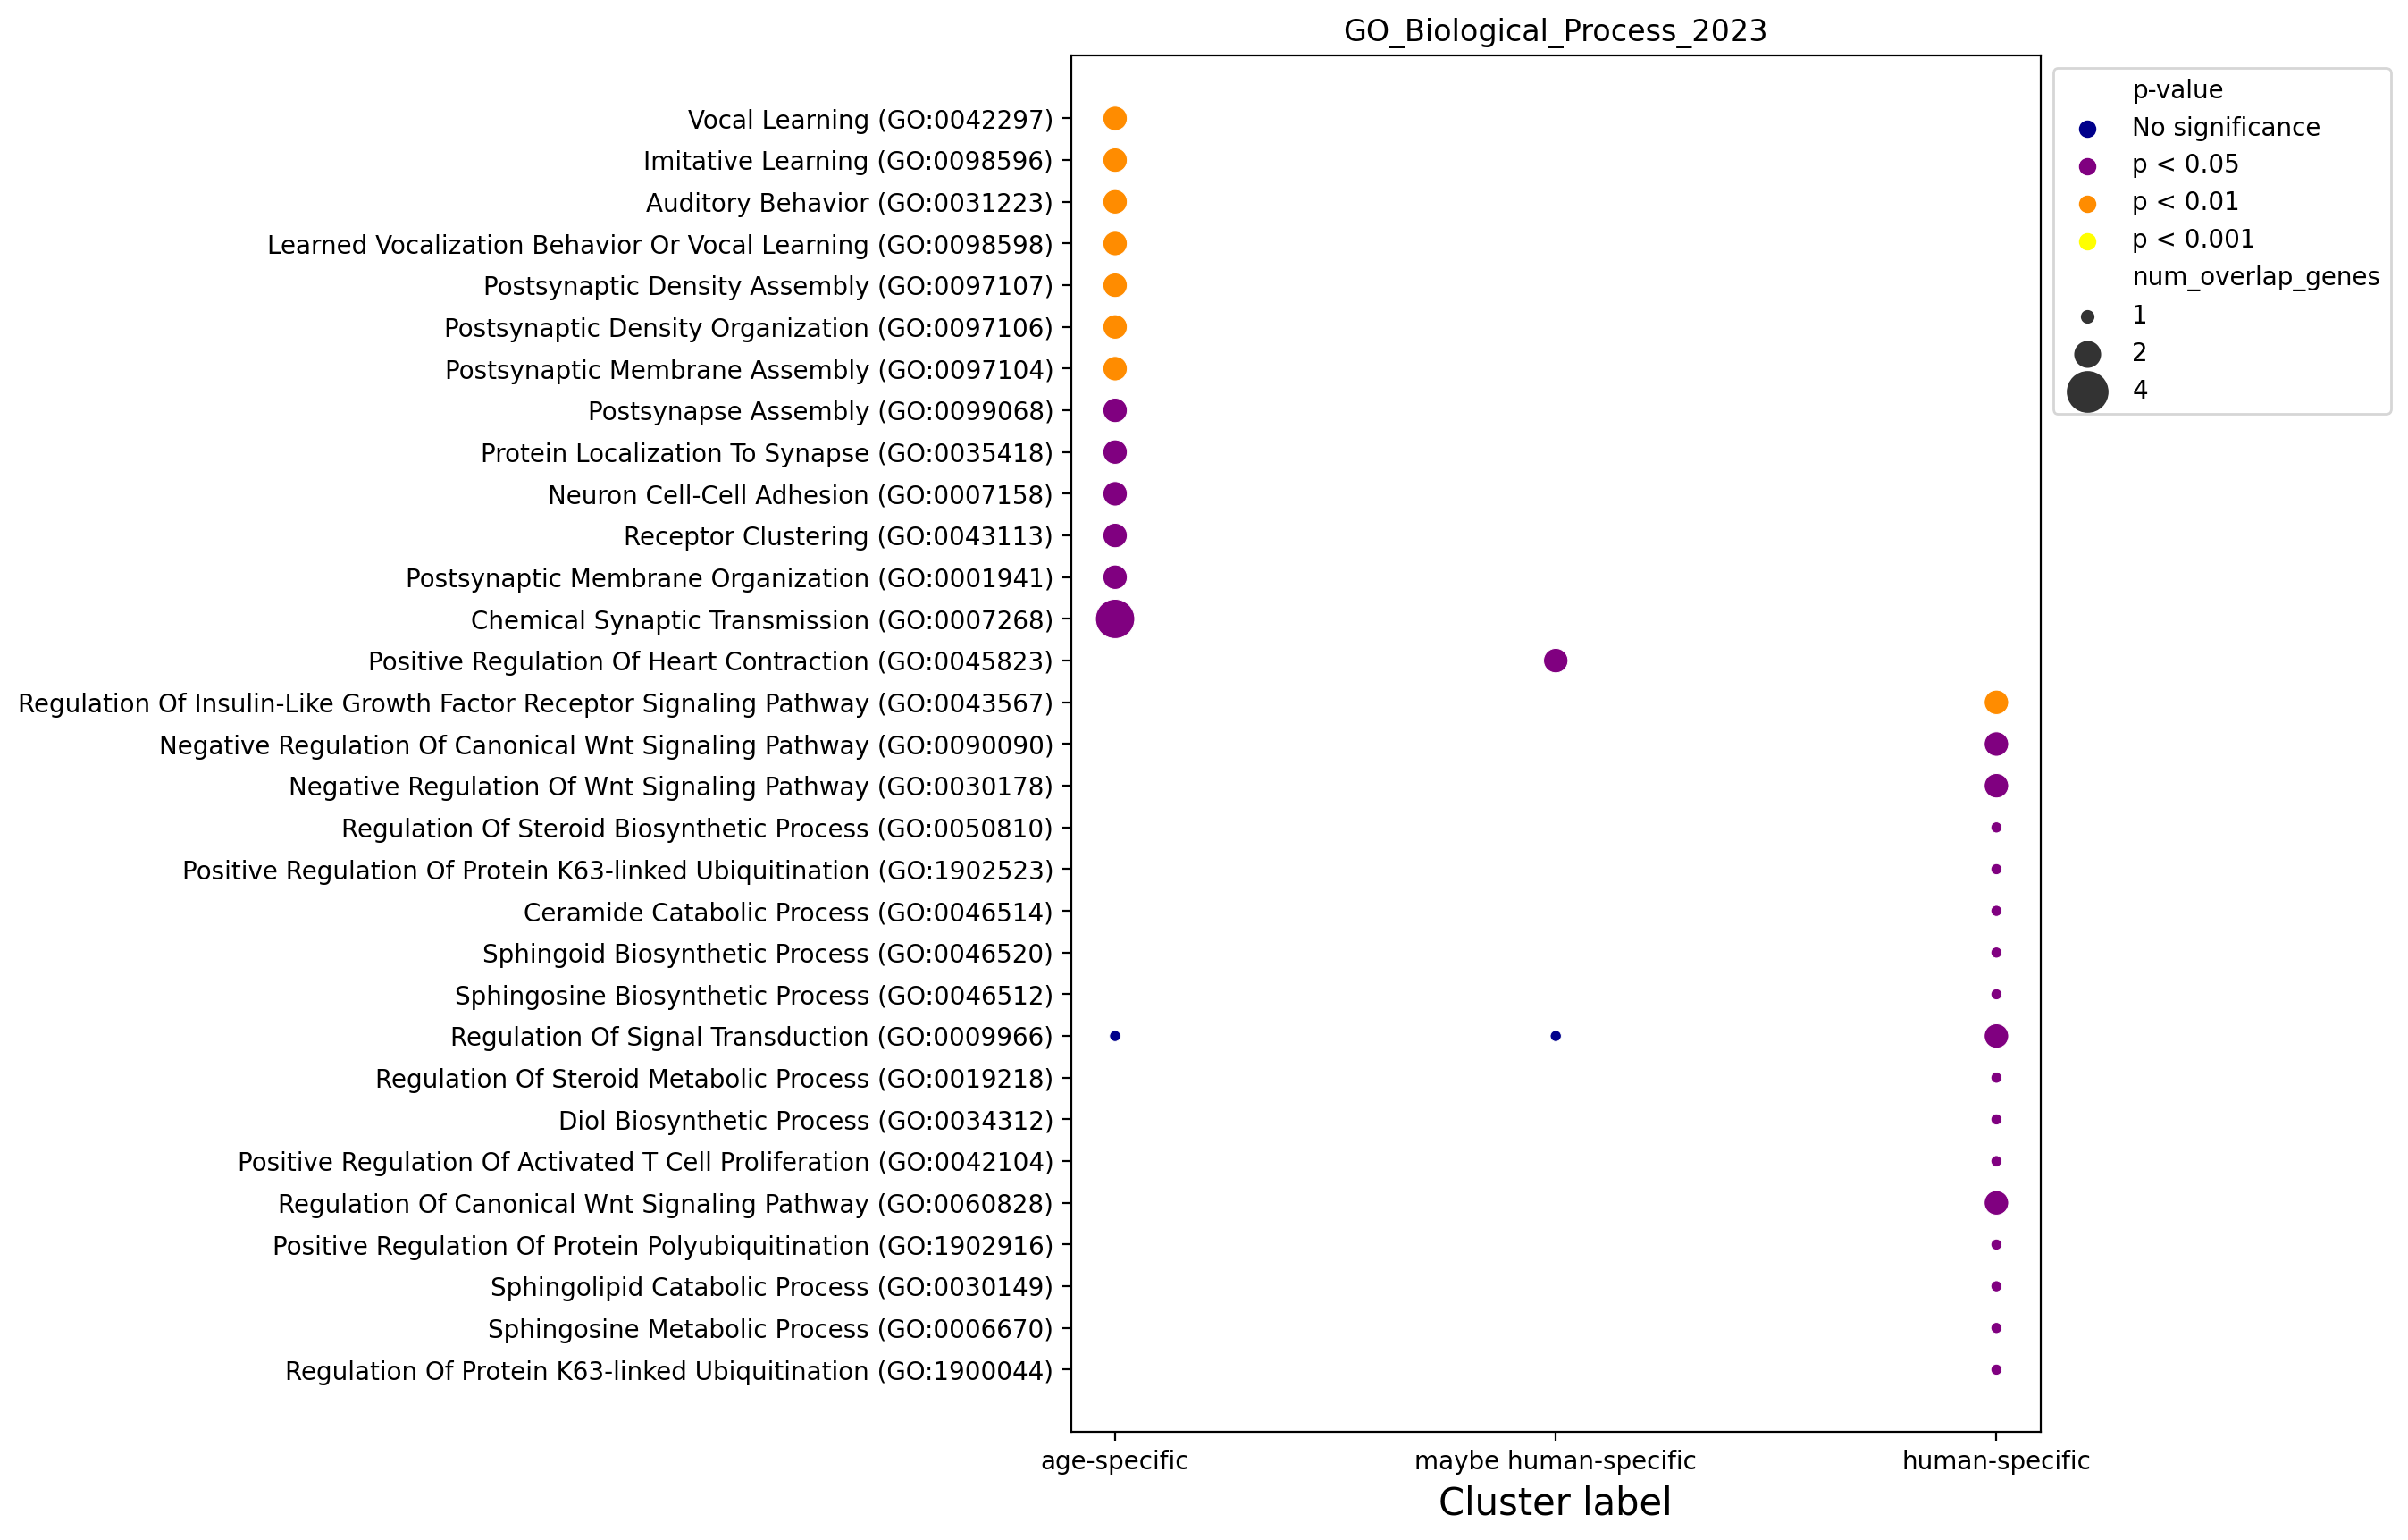

In [194]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 10), dpi=100)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## GO_Molecular_Function_2023

In [195]:
db_name = 'GO_Molecular_Function_2023'
GeneCluster.enrich_geneclusters(gene_clust,db_name )

In [196]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val  \
Term                                                                 
Calcium Channel Regulator Activity (GO:0005246)        1  0.001586   
Lactate Dehydrogenase Activity (GO:0004457)            2  0.003338   
Amyloid-Beta Binding (GO:0001540)                      3  0.009298   
Chemokine Activity (GO:0008009)                        4  0.009981   
P-type Potassium Transmembrane Transporter Acti...     5  0.009981   

                                                       Z-score  \
Term                                                             
Calcium Channel Regulator Activity (GO:0005246)      40.354167   
Lactate Dehydrogenase Activity (GO:0004457)                inf   
Amyloid-Beta Binding (GO:0001540)                    15.321429   
Chemokine Activity (GO:0008009)                     155.240000   
P-type Potassium Transmembrane Transporter Acti...  155.240000   

                                                    Combined score  \
Term                                                                 
Calcium Channel Regulator Activity (GO:0005246)         260.144707   
Lactate Dehydrogenase Activity (GO:0004457)                    inf   
Amyloid-Beta Binding (GO:0001540)                        71.672806   
Chemokine Activity (GO:0008009)                         715.207615   
P-type Potassium Transmembrane Transporter Acti...      715.207615   

                                                   Overlapping genes  \
Term                                                                   
Calcium Channel Regulator Activity (GO:0005246)       [NRXN1, NRXN2]   
Lactate Dehydrogenase Activity (GO:0004457)                   [LDHB]   
Amyloid-Beta Binding (GO:0001540)                   [CLSTN1, ATP1A3]   
Chemokine Activity (GO:0008009)                             [CX3CL1]   
P-type Potassium Transmembrane Transporter Acti...          [ATP1A3]   

                                                    Adjusted P-value  \
Term                                                                   
Calcium Channel Regulator Activity (GO:0005246)             0.076102   
Lactate Dehydrogenase Activity (GO:0004457)                 0.076102   
Amyloid-Beta Binding (GO:0001540)                           0.076102   
Chemokine Activity (GO:0008009)                             0.076102   
P-type Potassium Transmembrane Transporter Acti...          0.076102   

                                                    Old p-value  \
Term                                                              
Calcium Channel Regulator Activity (GO:0005246)               0   
Lactate Dehydrogenase Activity (GO:0004457)                   0   
Amyloid-Beta Binding (GO:0001540)                             0   
Chemokine Activity (GO:0008009)                               0   
P-type Potassium Transmembrane Transporter Acti...            0   

                                                    Old adjusted p-value  \
Term                                                                       
Calcium Channel Regulator Activity (GO:0005246)                        0   
Lactate Dehydrogenase Activity (GO:0004457)                            0   
Amyloid-Beta Binding (GO:0001540)                                      0   
Chemokine Activity (GO:0008009)                                        0   
P-type Potassium Transmembrane Transporter Acti...                     0   

                                                    num_overlap_genes  \
Term                                                                    
Calcium Channel Regulator Activity (GO:0005246)                     2   
Lactate Dehydrogenase Activity (GO:0004457)                         1   
Amyloid-Beta Binding (GO:0001540)                                   2   
Chemokine Activity (GO:0008009)                                     1   
P-type Potassium Transmembrane Transporter Acti...                  1   

                                                    neg_log10(p_adj)  \
Term      

In [197]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 20)].index.unique()
terms.size

4

In [198]:
enrich_res[enrich_res.cluster_label == 5]

Empty DataFrame
Columns: [Rank, p-val, Z-score, Combined score, Overlapping genes, Adjusted P-value, Old p-value, Old adjusted p-value, num_overlap_genes, neg_log10(p_adj), cluster_label]
Index: []

In [199]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

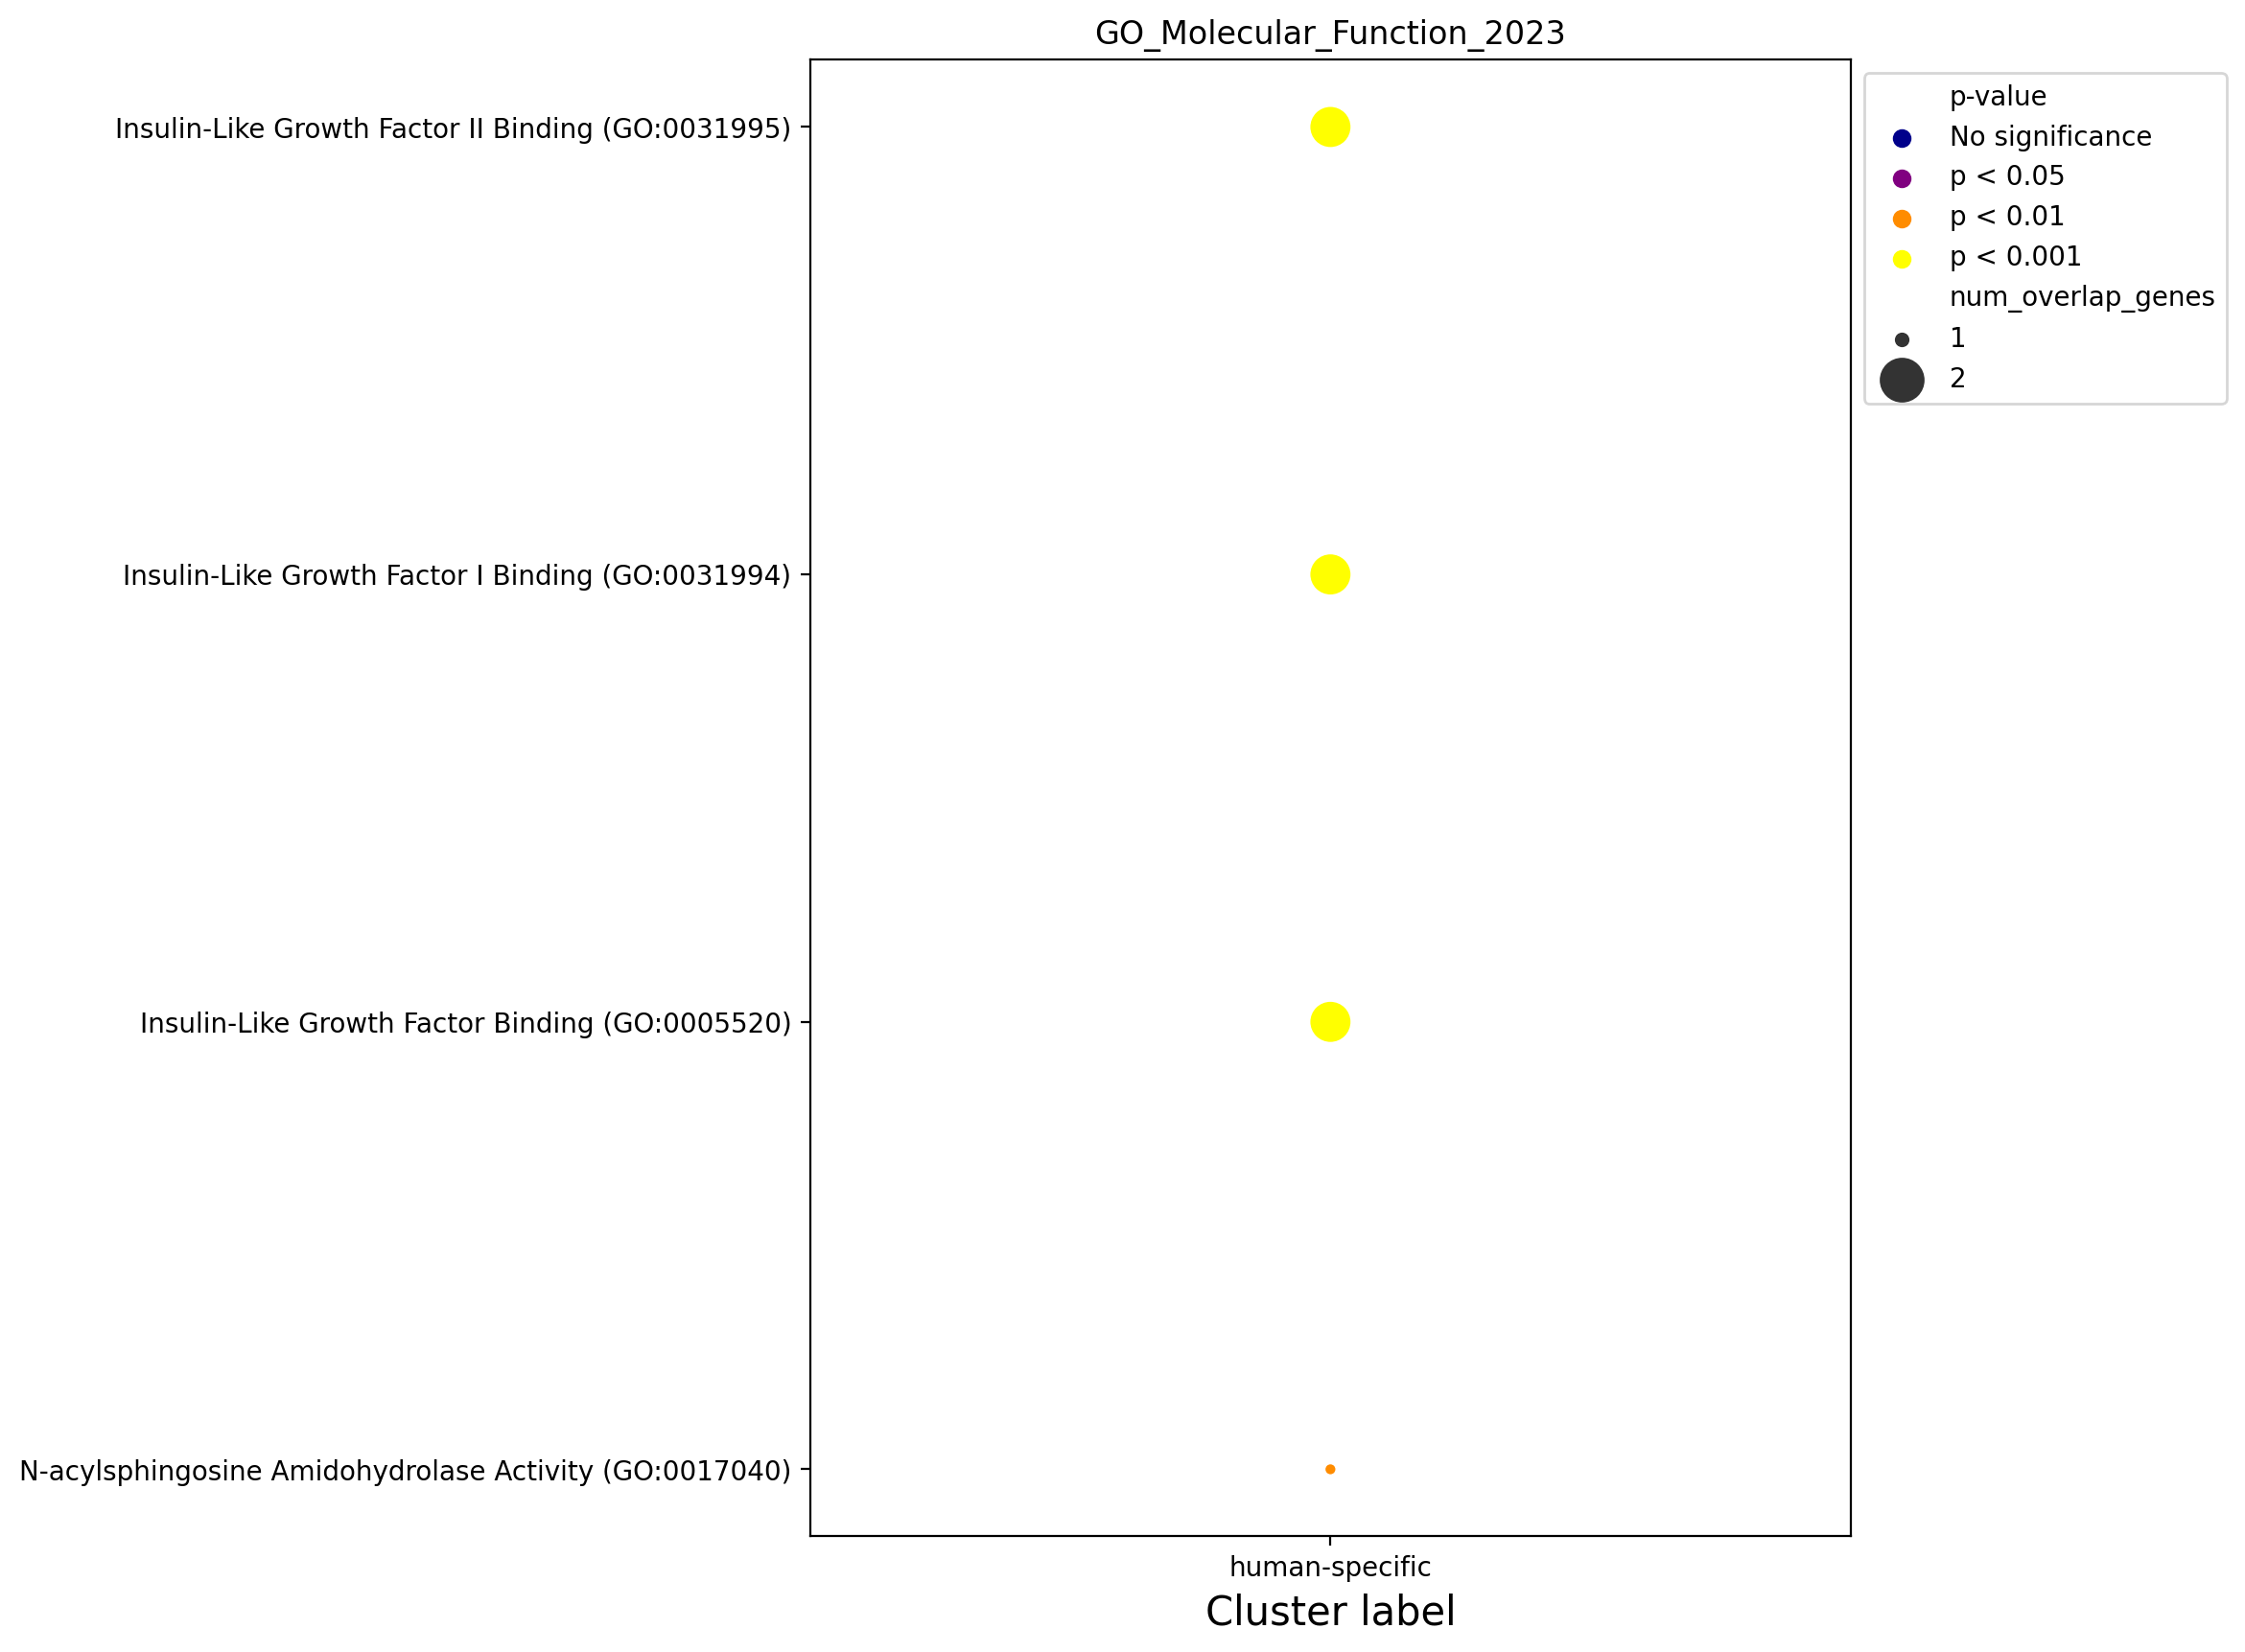

In [200]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 10), dpi=100)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## GO_Cellular_Component_2023

In [201]:
db_name = 'GO_Cellular_Component_2023'
GeneCluster.enrich_geneclusters(gene_clust,db_name )

In [202]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val    Z-score  \
Term                                                                            
Cortical Cytoskeleton (GO:0030863)                     1  0.006995  17.888889   
Vesicle (GO:0031982)                                   2  0.007158   8.525084   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...     3  0.016581  77.600000   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...     4  0.016581  77.600000   
Sodium:Potassium-Exchanging ATPase Complex (GO:...     5  0.019865  62.072000   

                                                    Combined score  \
Term                                                                 
Cortical Cytoskeleton (GO:0030863)                       88.774888   
Vesicle (GO:0031982)                                     42.110175   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...      318.120428   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...      318.120428   
Sodium:Potassium-Exchanging ATPase Complex (GO:...      243.245957   

                                                        Overlapping genes  \
Term                                                                        
Cortical Cytoskeleton (GO:0030863)                          [COTL1, ERC1]   
Vesicle (GO:0031982)                                [NRXN1, GAD1, ATP1A3]   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...                 [GAD1]   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...                 [GAD1]   
Sodium:Potassium-Exchanging ATPase Complex (GO:...               [ATP1A3]   

                                                    Adjusted P-value  \
Term                                                                   
Cortical Cytoskeleton (GO:0030863)                          0.153298   
Vesicle (GO:0031982)                                        0.153298   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...          0.153298   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...          0.153298   
Sodium:Potassium-Exchanging ATPase Complex (GO:...          0.153298   

                                                    Old p-value  \
Term                                                              
Cortical Cytoskeleton (GO:0030863)                            0   
Vesicle (GO:0031982)                                          0   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...            0   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...            0   
Sodium:Potassium-Exchanging ATPase Complex (GO:...            0   

                                                    Old adjusted p-value  \
Term                                                                       
Cortical Cytoskeleton (GO:0030863)                                     0   
Vesicle (GO:0031982)                                                   0   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...                     0   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...                     0   
Sodium:Potassium-Exchanging ATPase Complex (GO:...                     0   

                                                    num_overlap_genes  \
Term                                                                    
Cortical Cytoskeleton (GO:0030863)                                  2   
Vesicle (GO:0031982)                                                3   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...                  1   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...                  1   
Sodium:Potassium-Exchanging ATPase Complex (GO:...                  1   

                                                    neg_log10(p_adj)  \
Term                                                                   
Cortical Cytoskeleton (GO:0030863)                          0.814464   
Vesicle (GO:0031982)                                        0.814464   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...          0.814464   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...          0.814464   
S

In [203]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 20)].index.unique()
terms.size

0

In [204]:
enrich_res[enrich_res.cluster_label == 5]

Empty DataFrame
Columns: [Rank, p-val, Z-score, Combined score, Overlapping genes, Adjusted P-value, Old p-value, Old adjusted p-value, num_overlap_genes, neg_log10(p_adj), cluster_label]
Index: []

In [205]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

C:\Users\aleks\AppData\Local\Temp\ipykernel_660\1472615517.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


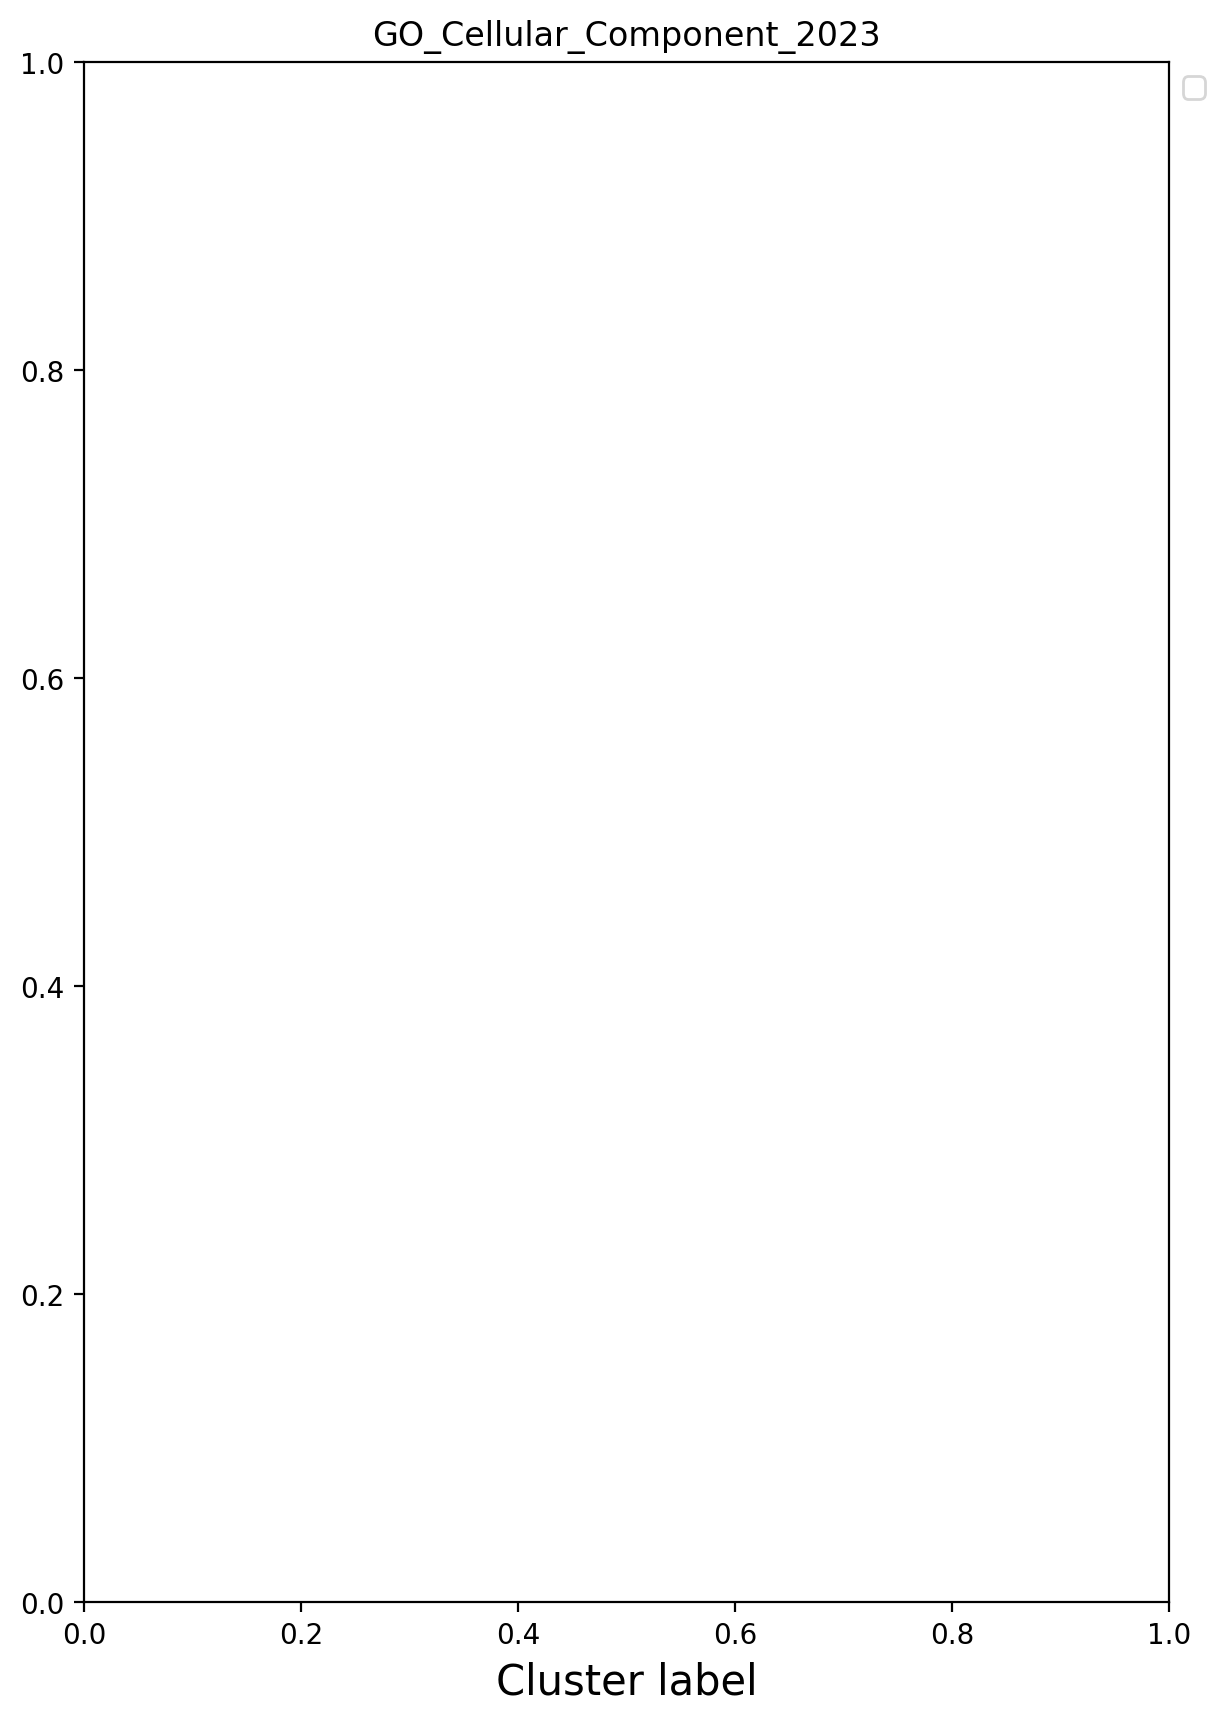

In [206]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 10), dpi=100)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## WikiPathway_2023_Human

In [207]:
db_name = 'WikiPathway_2023_Human'
GeneCluster.enrich_geneclusters(gene_clust,db_name )

In [208]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val  \
Term                                                                 
Disruption Of Postsynaptic Signaling By CNV WP4875     1  0.000102   
Fragile X Syndrome WP4549                              2  0.004680   
Common Pathways Underlying Drug Addiction WP2636       3  0.004996   
Lipid Particles Composition WP3601                     4  0.006664   
Familial Hyperlipidemia Type 2 WP5109                  5  0.009981   

                                                       Z-score  \
Term                                                             
Disruption Of Postsynaptic Signaling By CNV WP4875   40.377391   
Fragile X Syndrome WP4549                             9.996522   
Common Pathways Underlying Drug Addiction WP2636     21.483333   
Lipid Particles Composition WP3601                  310.520000   
Familial Hyperlipidemia Type 2 WP5109               155.240000   

                                                    Combined score  \
Term                                                                 
Disruption Of Postsynaptic Signaling By CNV WP4875      370.965312   
Fragile X Syndrome WP4549                                53.626878   
Common Pathways Underlying Drug Addiction WP2636        113.841915   
Lipid Particles Composition WP3601                     1556.006590   
Familial Hyperlipidemia Type 2 WP5109                   715.207615   

                                                            Overlapping genes  \
Term                                                                            
Disruption Of Postsynaptic Signaling By CNV WP4875    [SYNGAP1, NRXN1, NRXN2]   
Fragile X Syndrome WP4549                           [MAP1LC3B, SYNGAP1, GAD1]   
Common Pathways Underlying Drug Addiction WP2636              [PPP1CC, GNAI1]   
Lipid Particles Composition WP3601                                      [LPL]   
Familial Hyperlipidemia Type 2 WP5109                                   [LPL]   

                                                    Adjusted P-value  \
Term                                                                   
Disruption Of Postsynaptic Signaling By CNV WP4875          0.008594   
Fragile X Syndrome WP4549                                   0.110537   
Common Pathways Underlying Drug Addiction WP2636            0.110537   
Lipid Particles Composition WP3601                          0.110537   
Familial Hyperlipidemia Type 2 WP5109                       0.110537   

                                                    Old p-value  \
Term                                                              
Disruption Of Postsynaptic Signaling By CNV WP4875            0   
Fragile X Syndrome WP4549                                     0   
Common Pathways Underlying Drug Addiction WP2636              0   
Lipid Particles Composition WP3601                            0   
Familial Hyperlipidemia Type 2 WP5109                         0   

                                                    Old adjusted p-value  \
Term                                                                       
Disruption Of Postsynaptic Signaling By CNV WP4875                     0   
Fragile X Syndrome WP4549                                              0   
Common Pathways Underlying Drug Addiction WP2636                       0   
Lipid Particles Composition WP3601                                     0   
Familial Hyperlipidemia Type 2 WP5109                                  0   

                                                    num_overlap_genes  \
Term                                                                    
Disruption Of Postsynaptic Signaling By CNV WP4875                  3   
Fragile X Syndrome WP4549                                           3   
Common Pathways Underlying Drug Addiction WP2636                    2   
Lipid Particles Composition WP3601                                  1   
Familial Hyperlipidemia Type 2 WP5109                               1   

                   

In [209]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 20)].index.unique()
terms.size

13

In [210]:
enrich_res[enrich_res.cluster_label == 5]

Empty DataFrame
Columns: [Rank, p-val, Z-score, Combined score, Overlapping genes, Adjusted P-value, Old p-value, Old adjusted p-value, num_overlap_genes, neg_log10(p_adj), cluster_label]
Index: []

In [211]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

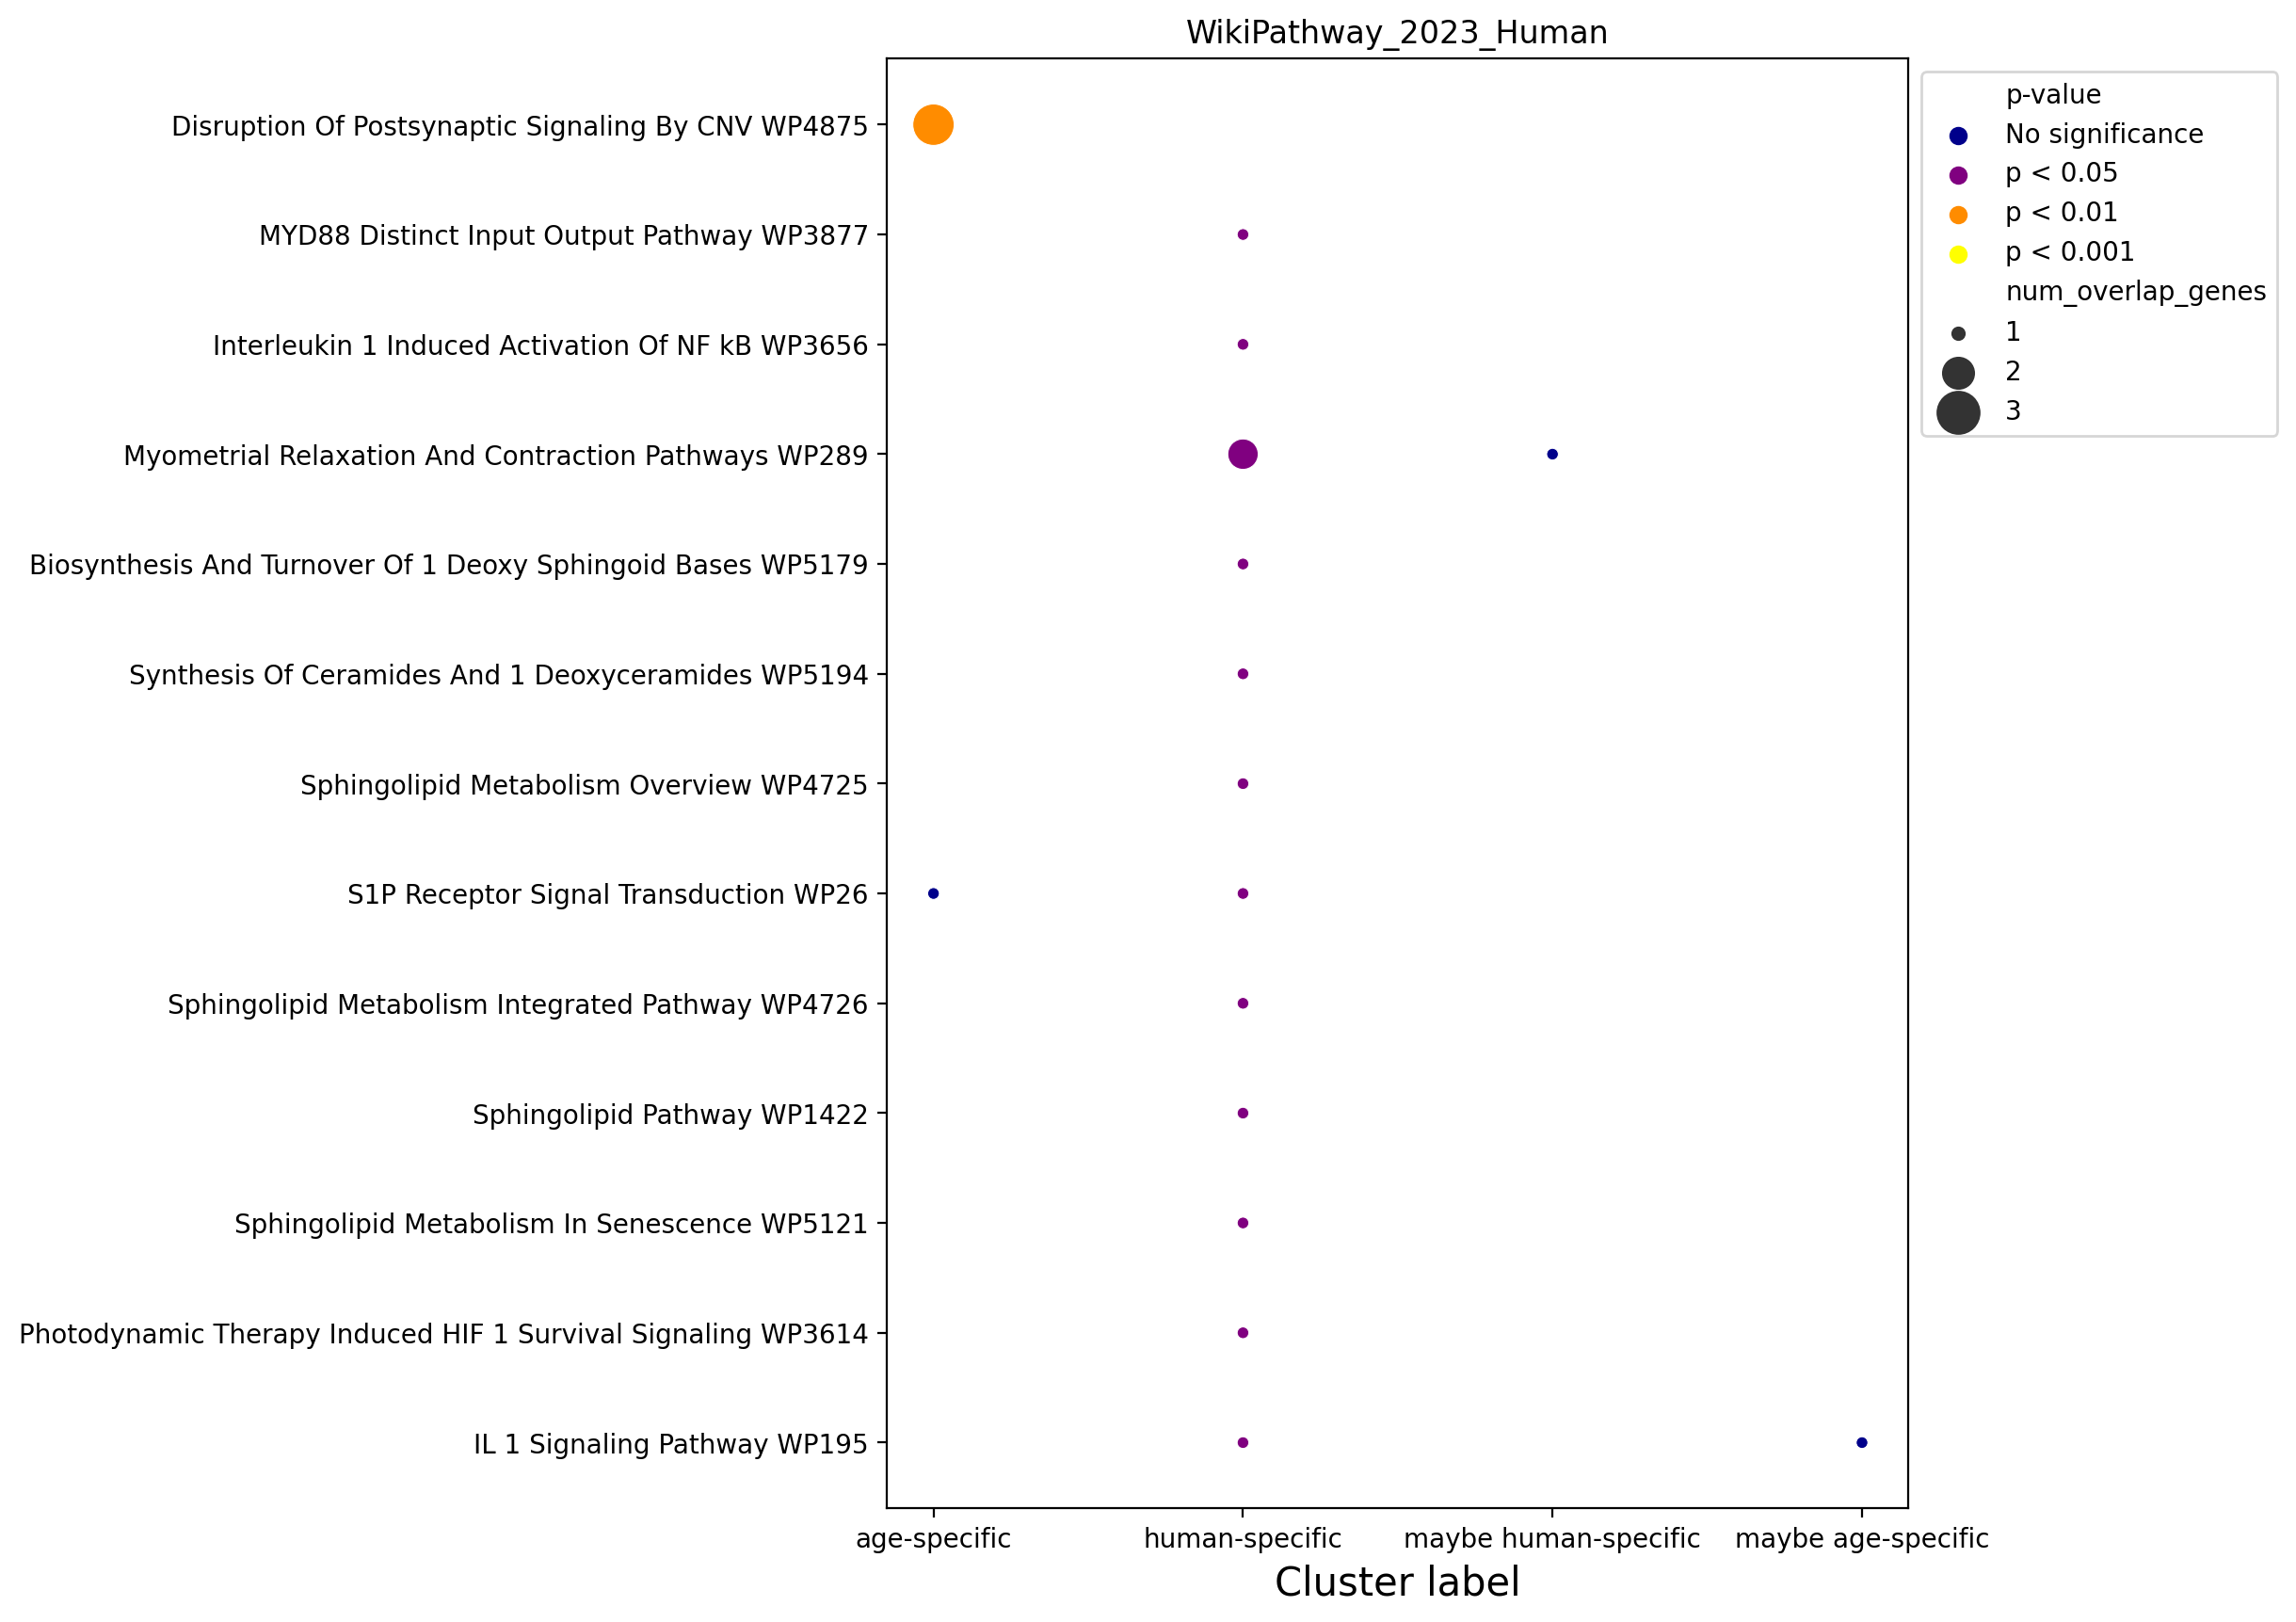

In [212]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 10), dpi=100)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Azimuth_2023


In [213]:
db_name = 'Azimuth_2023'
GeneCluster.enrich_geneclusters(gene_clust, db_name)

In [214]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val  Z-score  \
Term                                                             
Tonsil-L2-aDC2                            1  0.003338      inf   
Adipose-L1-Monocyte                       2  0.003338      inf   
Lung V2 (HLCA)-ann Level 4-Suprabasal     3  0.006664   310.52   
PBMC-L2-CD8+ Central Memory T             4  0.006664   310.52   
Lung v1-L2-Lipofibroblast                 5  0.006664   310.52   

                                       Combined score Overlapping genes  \
Term                                                                      
Tonsil-L2-aDC2                                    inf           [NRXN2]   
Adipose-L1-Monocyte                               inf           [COTL1]   
Lung V2 (HLCA)-ann Level 4-Suprabasal      1556.00659            [LDHB]   
PBMC-L2-CD8+ Central Memory T              1556.00659            [LDHB]   
Lung v1-L2-Lipofibroblast                  1556.00659            [PPA1]   

                                       Adjusted P-value  Old p-value  \
Term                                                                   
Tonsil-L2-aDC2                                 0.021555            0   
Adipose-L1-Monocyte                            0.021555            0   
Lung V2 (HLCA)-ann Level 4-Suprabasal          0.021555            0   
PBMC-L2-CD8+ Central Memory T                  0.021555            0   
Lung v1-L2-Lipofibroblast                      0.021555            0   

                                       Old adjusted p-value  \
Term                                                          
Tonsil-L2-aDC2                                            0   
Adipose-L1-Monocyte                                       0   
Lung V2 (HLCA)-ann Level 4-Suprabasal                     0   
PBMC-L2-CD8+ Central Memory T                             0   
Lung v1-L2-Lipofibroblast                                 0   

                                       num_overlap_genes  neg_log10(p_adj)  \
Term                                                                         
Tonsil-L2-aDC2                                         1          1.666443   
Adipose-L1-Monocyte                                    1          1.666443   
Lung V2 (HLCA)-ann Level 4-Suprabasal                  1          1.666443   
PBMC-L2-CD8+ Central Memory T                          1          1.666443   
Lung v1-L2-Lipofibroblast                              1          1.666443   

                                      cluster_label  
Term                                                 
Tonsil-L2-aDC2                         age-specific  
Adipose-L1-Monocyte                    age-specific  
Lung V2 (HLCA)-ann Level 4-Suprabasal  age-specific  
PBMC-L2-CD8+ Central Memory T          age-specific  
Lung v1-L2-Lipofibroblast              age-specific

In [215]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 10)].index.unique()
terms.size

36

In [216]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

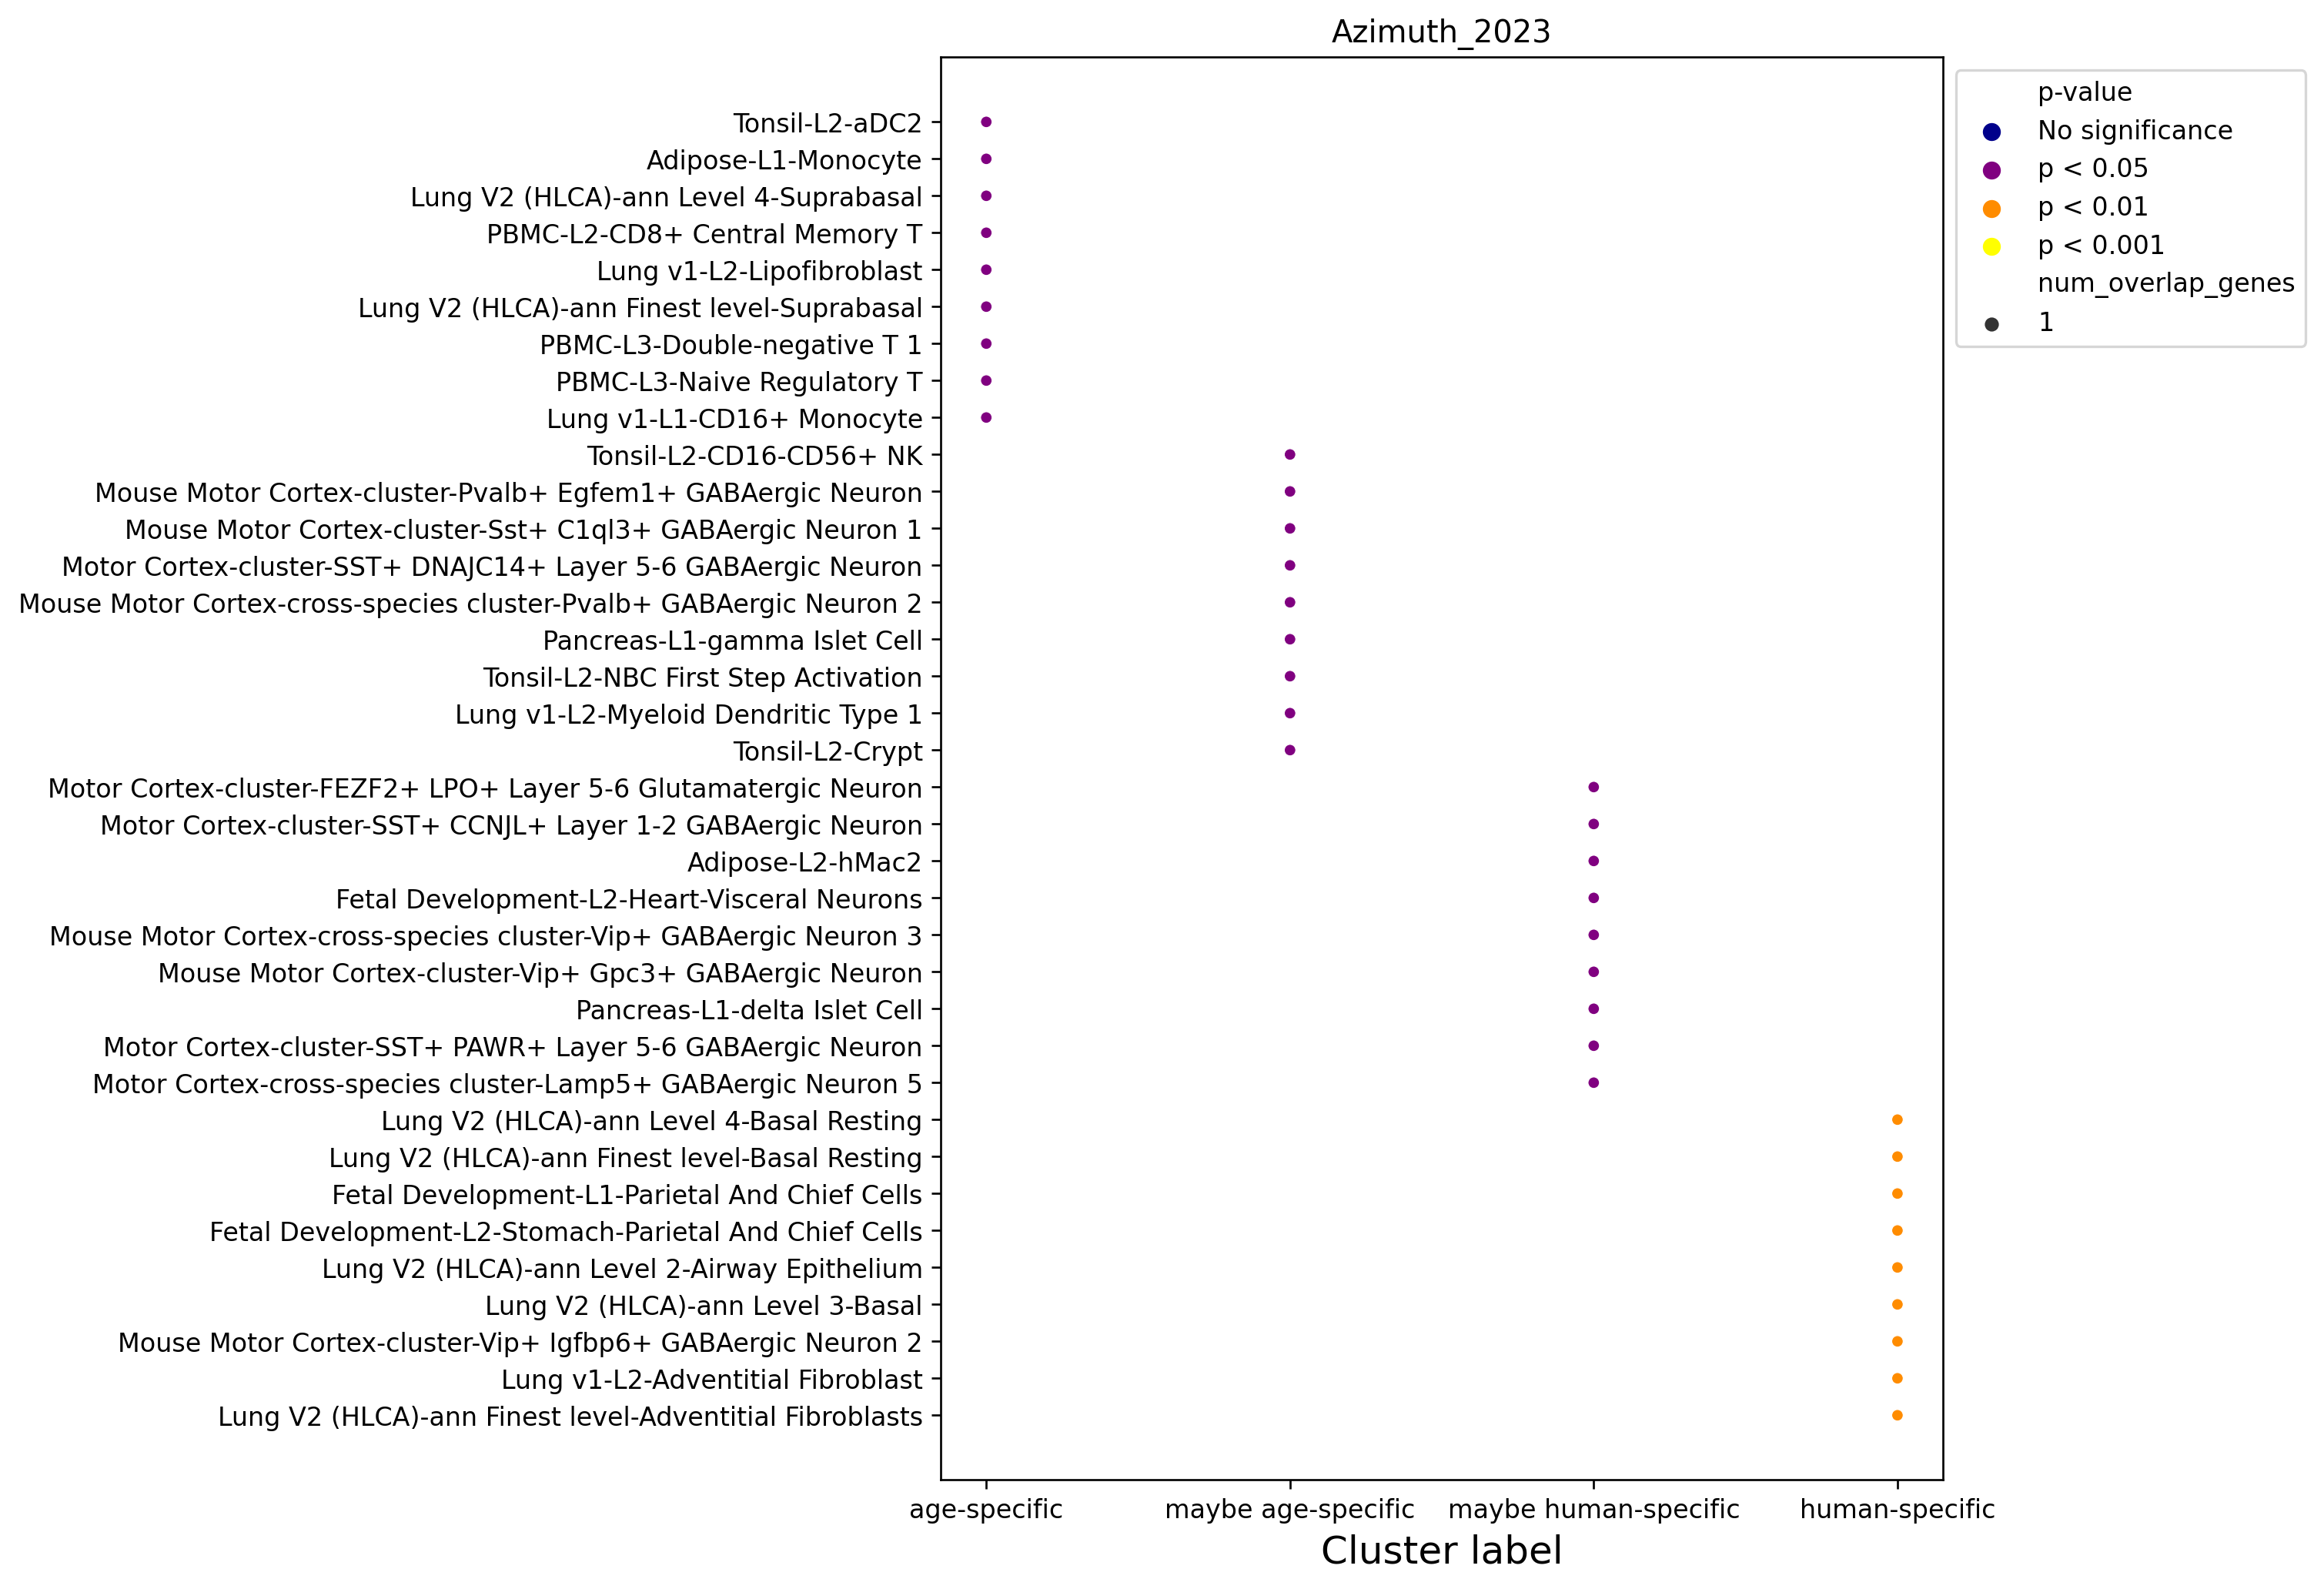

In [217]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 10), dpi=120)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Allen_Brain_Atlas_10x_scRNA_2021


In [218]:
db_name = 'Allen_Brain_Atlas_10x_scRNA_2021'
GeneCluster.enrich_geneclusters(gene_clust, db_name)

In [219]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val    Z-score  Combined score  \
Term                                                                
Mouse 125 DG down          1  0.000091   8.221432       76.507427   
Mouse 364 Oligo down       2  0.001141   5.273435       35.732832   
Mouse 23 Ndnf HPF down     3  0.001249  46.130952      308.403092   
Mouse 116 Pvalb up         4  0.001413  43.050000      282.505773   
Mouse 115 Pvalb up         5  0.002375  32.266667      194.979710   

                                                        Overlapping genes  \
Term                                                                        
Mouse 125 DG down       [GAD1, CLSTN1, NRXN2, CX3CL1, GNAI1, FBXO9, DL...   
Mouse 364 Oligo down    [NDUFB10, NRXN1, CLSTN1, CX3CL1, GNAI1, FBXO9,...   
Mouse 23 Ndnf HPF down                                    [ZBTB18, PDE1A]   
Mouse 116 Pvalb up                                         [LDHB, PPP1CC]   
Mouse 115 Pvalb up                                         [LDHB, PPP1CC]   

                        Adjusted P-value  Old p-value  Old adjusted p-value  \
Term                                                                          
Mouse 125 DG down               0.016451            0                     0   
Mouse 364 Oligo down            0.063923            0                     0   
Mouse 23 Ndnf HPF down          0.063923            0                     0   
Mouse 116 Pvalb up              0.063923            0                     0   
Mouse 115 Pvalb up              0.069357            0                     0   

                        num_overlap_genes  neg_log10(p_adj) cluster_label  
Term                                                                       
Mouse 125 DG down                       7          1.783802  age-specific  
Mouse 364 Oligo down                    7          1.194340  age-specific  
Mouse 23 Ndnf HPF down                  2          1.194340  age-specific  
Mouse 116 Pvalb up                      2          1.194340  age-specific  
Mouse 115 Pvalb up                      2          1.158909  age-specific

In [220]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 10)].index.unique()
terms.size

7

In [221]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

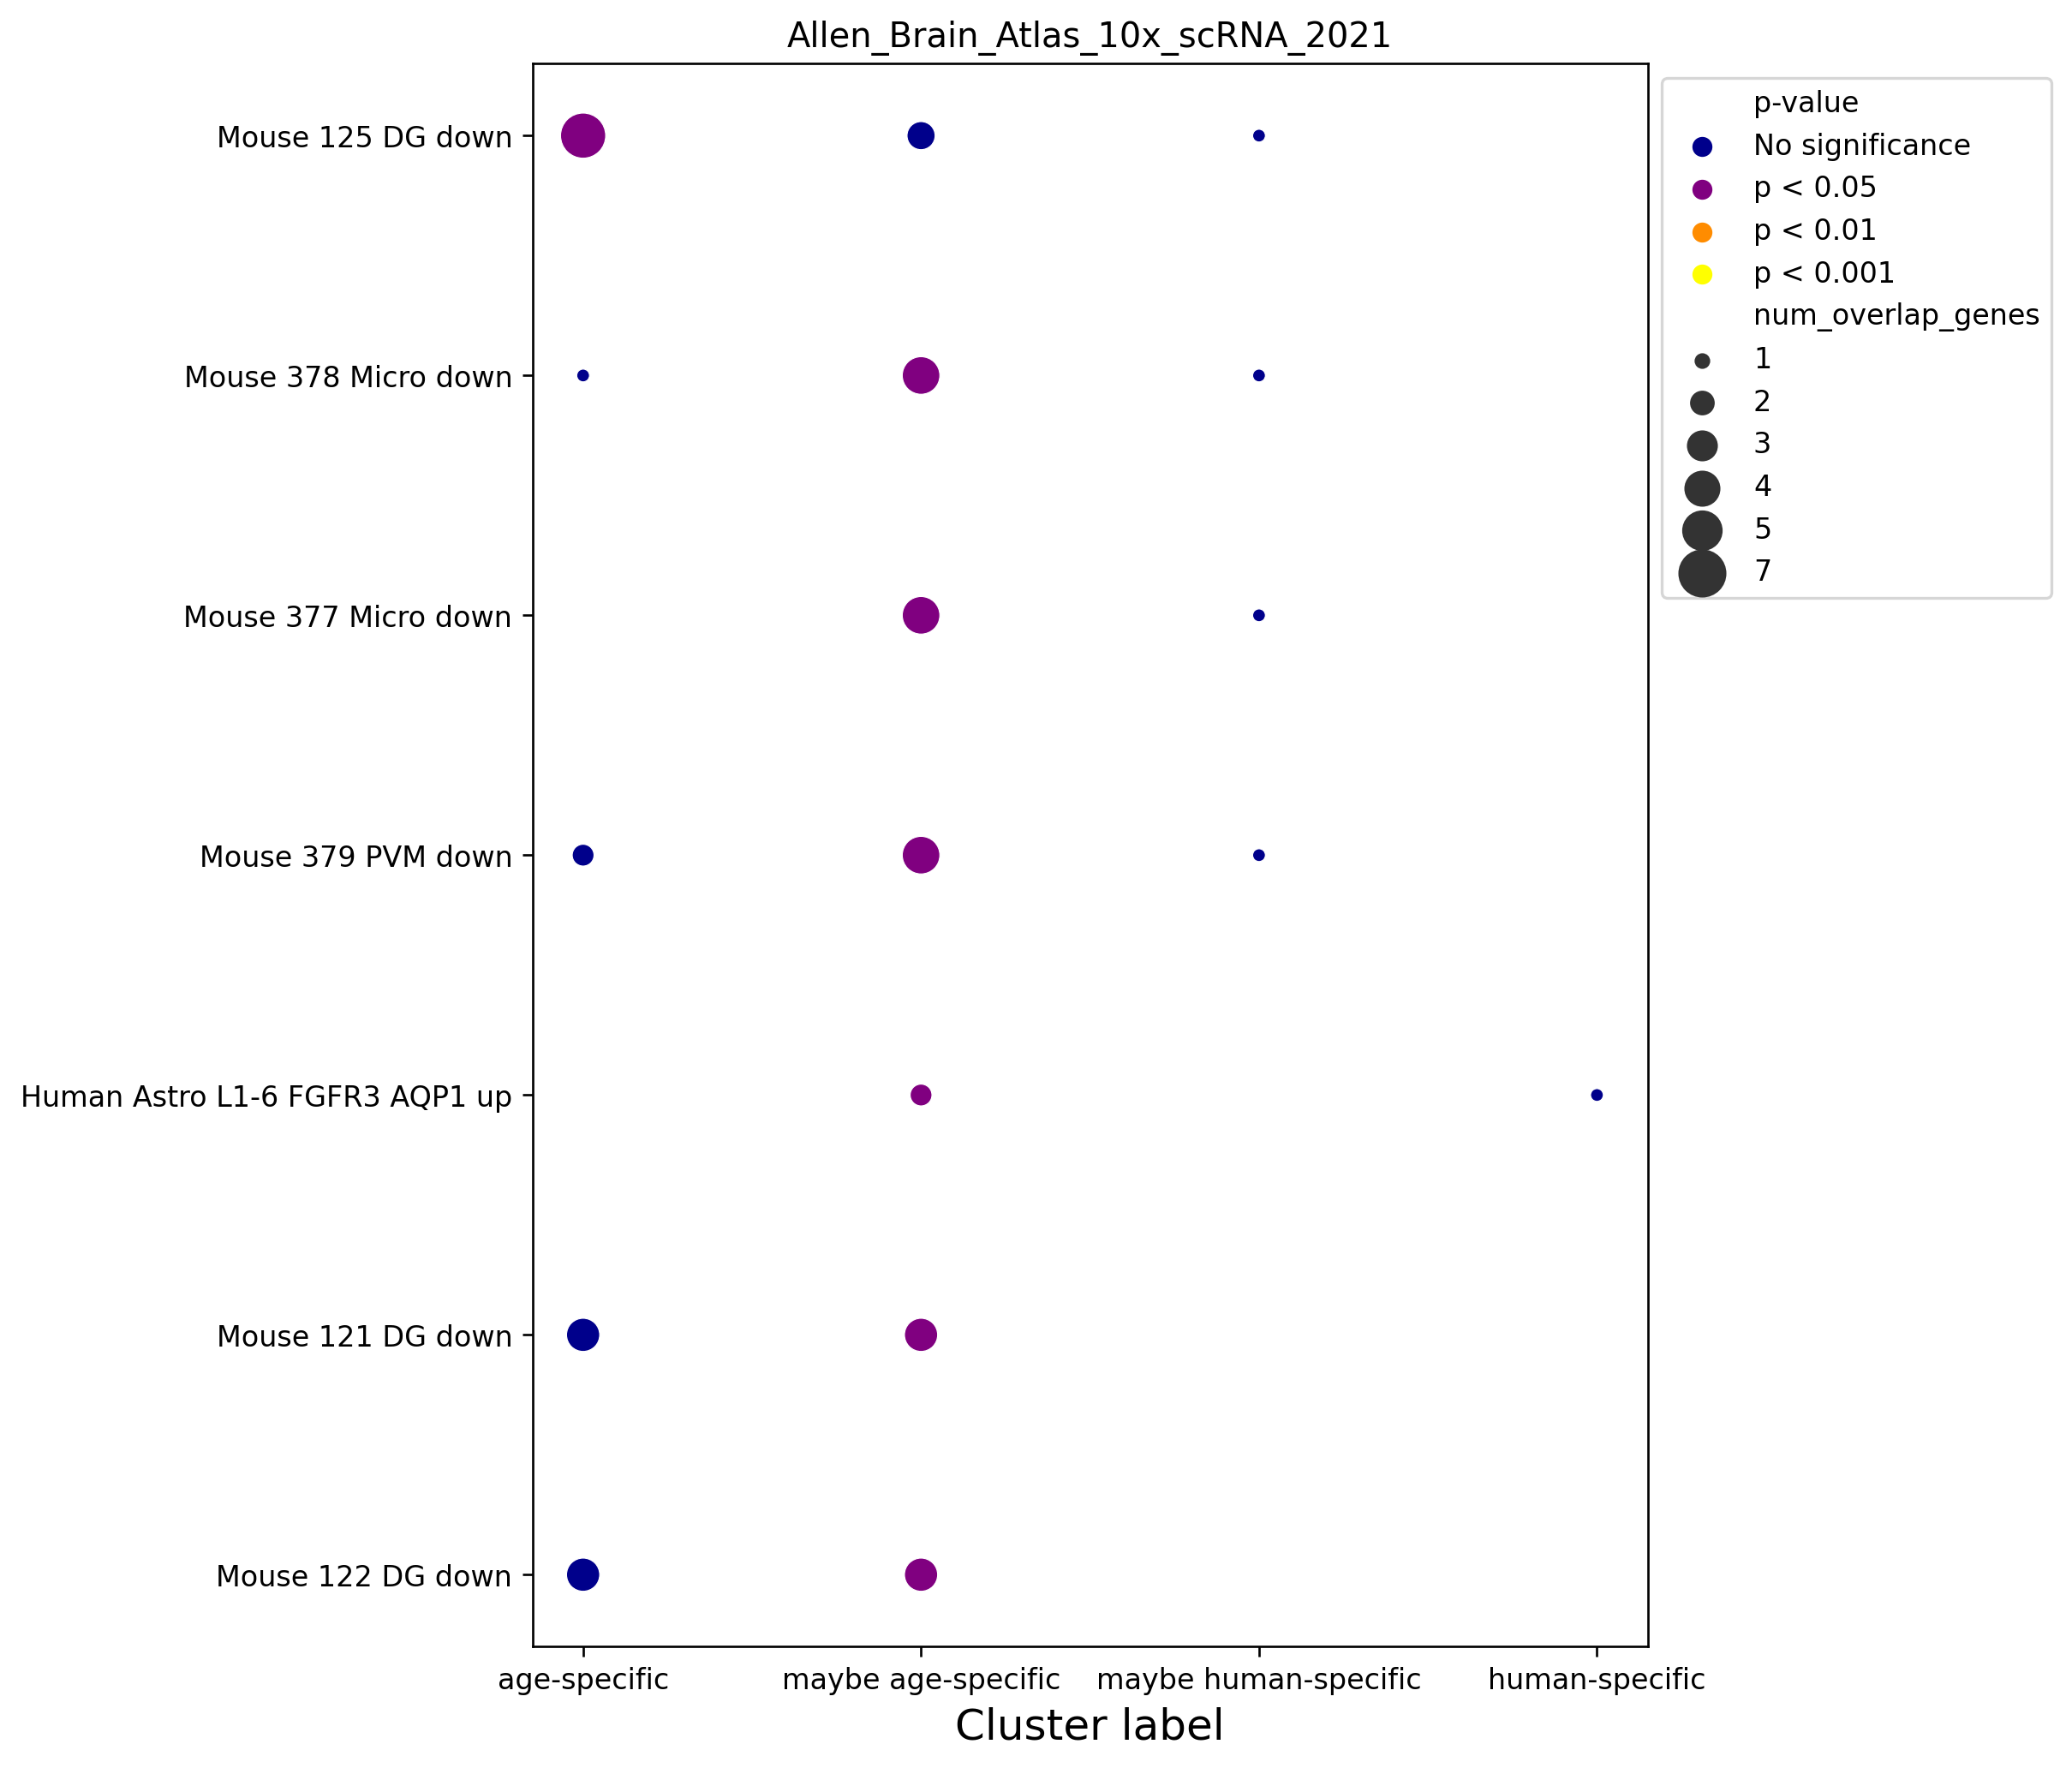

In [222]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 10), dpi=120)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## SynGO_2022

In [223]:
db_name = 'SynGO_2022'
GeneCluster.enrich_geneclusters(gene_clust, db_name)

In [224]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val     Z-score  \
Term                                                                            
Regulation Of Synaptic Vesicle Fusion To Presyn...    1  0.013286  103.480000   
Maintenance Of Postsynaptic Specialization Stru...    2  0.016581   77.600000   
Regulation Of Postsynaptic Specialization Assem...    3  0.019865   62.072000   
Integral Component Of Presynaptic Membrane (GO:...    4  0.021913    9.573383   
Regulation Of Calcium-Dependent Activation Of S...    5  0.023139   51.720000   

                                                    Combined score  \
Term                                                                 
Regulation Of Synaptic Vesicle Fusion To Presyn...      447.140237   
Maintenance Of Postsynaptic Specialization Stru...      318.120428   
Regulation Of Postsynaptic Specialization Assem...      243.245957   
Integral Component Of Presynaptic Membrane (GO:...       36.576722   
Regulation Of Calcium-Dependent Activation Of S...      194.789020   

                                                   Overlapping genes  \
Term                                                                   
Regulation Of Synaptic Vesicle Fusion To Presyn...            [ERC1]   
Maintenance Of Postsynaptic Specialization Stru...         [SYNGAP1]   
Regulation Of Postsynaptic Specialization Assem...           [NRXN1]   
Integral Component Of Presynaptic Membrane (GO:...   [NRXN1, ATP1A3]   
Regulation Of Calcium-Dependent Activation Of S...            [ERC1]   

                                                    Adjusted P-value  \
Term                                                                   
Regulation Of Synaptic Vesicle Fusion To Presyn...          0.068537   
Maintenance Of Postsynaptic Specialization Stru...          0.068537   
Regulation Of Postsynaptic Specialization Assem...          0.068537   
Integral Component Of Presynaptic Membrane (GO:...          0.068537   
Regulation Of Calcium-Dependent Activation Of S...          0.068537   

                                                   Old p-value  \
Term                                                             
Regulation Of Synaptic Vesicle Fusion To Presyn...           0   
Maintenance Of Postsynaptic Specialization Stru...           0   
Regulation Of Postsynaptic Specialization Assem...           0   
Integral Component Of Presynaptic Membrane (GO:...           0   
Regulation Of Calcium-Dependent Activation Of S...           0   

                                                   Old adjusted p-value  \
Term                                                                      
Regulation Of Synaptic Vesicle Fusion To Presyn...                    0   
Maintenance Of Postsynaptic Specialization Stru...                    0   
Regulation Of Postsynaptic Specialization Assem...                    0   
Integral Component Of Presynaptic Membrane (GO:...                    0   
Regulation Of Calcium-Dependent Activation Of S...                    0   

                                                   num_overlap_genes  \
Term                                                                   
Regulation Of Synaptic Vesicle Fusion To Presyn...                 1   
Maintenance Of Postsynaptic Specialization Stru...                 1   
Regulation Of Postsynaptic Specialization Assem...                 1   
Integral Component Of Presynaptic Membrane (GO:...                 2   
Regulation Of Calcium-Dependent Activation Of S...                 1   

                                                    neg_log10(p_adj)  \
Term                                                                   
Regulation Of Synaptic Vesicle Fusion To Presyn...          1.164074   
Maintenance Of Postsynaptic Specialization Stru...          1.164074   
Regulation Of Postsynaptic Specialization Assem...          1.164074   
Integral Component Of Presynaptic Membrane (GO:...          1.164074   
Regulation Of Calcium-Dependent Activation Of S...      

In [225]:
enrich_res[enrich_res['Adjusted P-value'] < 0.05].head()

Empty DataFrame
Columns: [Rank, p-val, Z-score, Combined score, Overlapping genes, Adjusted P-value, Old p-value, Old adjusted p-value, num_overlap_genes, neg_log10(p_adj), cluster_label]
Index: []

In [226]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05)].index.unique()
terms.size

0

In [227]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

C:\Users\aleks\AppData\Local\Temp\ipykernel_660\320292492.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


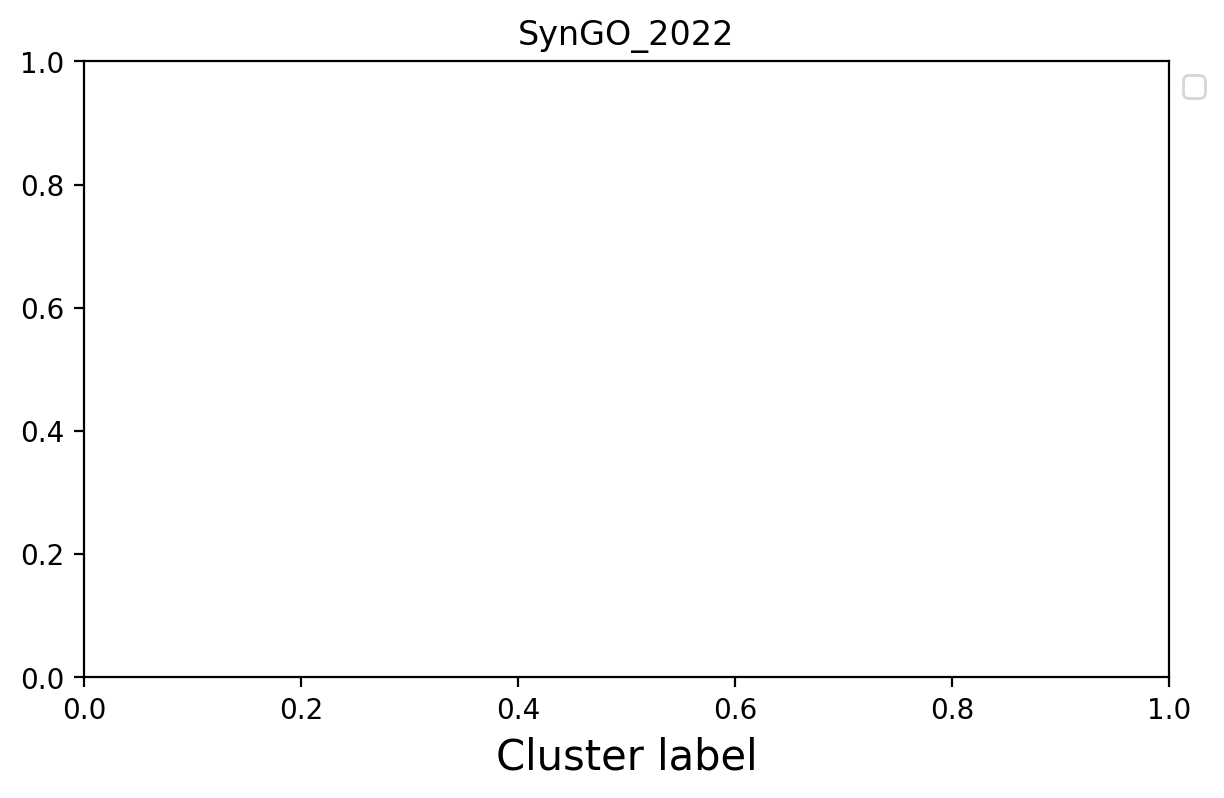

In [228]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 4), dpi=100)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## MGI_Mammalian_Phenotype_Level_4_2021

In [74]:
db_name = 'MGI_Mammalian_Phenotype_Level_4_2021'
GeneCluster.enrich_geneclusters(gene_clust, db_name)

In [75]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val    Z-score  \
Term                                                                            
abnormal habituation to a new environment MP:00...     1  0.000380  92.345238   
abnormal excitatory postsynaptic currents MP:00...     2  0.001202  16.471133   
decreased circulating HDL cholesterol level MP:...     3  0.002455  12.688498   
abnormal long term object recognition memory MP...     4  0.003066  28.047101   
abnormal dendritic cell physiology MP:0002376          5  0.003314  26.875000   

                                                    Combined score  \
Term                                                                 
abnormal habituation to a new environment MP:00...      727.217964   
abnormal excitatory postsynaptic currents MP:00...      110.753413   
decreased circulating HDL cholesterol level MP:...       76.255649   
abnormal long term object recognition memory MP...      162.323776   
abnormal dendritic cell physiology MP:0002376           153.444093   

                                                          Overlapping genes  \
Term                                                                          
abnormal habituation to a new environment MP:00...         [ATP1A3, DLGAP4]   
abnormal excitatory postsynaptic currents MP:00...  [NRXN1, CLSTN1, DLGAP4]   
decreased circulating HDL cholesterol level MP:...       [LDHB, NRXN1, LPL]   
abnormal long term object recognition memory MP...          [ATP1A3, GNAI1]   
abnormal dendritic cell physiology MP:0002376              [ZBTB46, CX3CL1]   

                                                    Adjusted P-value  \
Term                                                                   
abnormal habituation to a new environment MP:00...          0.087430   
abnormal excitatory postsynaptic currents MP:00...          0.108787   
decreased circulating HDL cholesterol level MP:...          0.108787   
abnormal long term object recognition memory MP...          0.108787   
abnormal dendritic cell physiology MP:0002376               0.108787   

                                                    Old p-value  \
Term                                                              
abnormal habituation to a new environment MP:00...            0   
abnormal excitatory postsynaptic currents MP:00...            0   
decreased circulating HDL cholesterol level MP:...            0   
abnormal long term object recognition memory MP...            0   
abnormal dendritic cell physiology MP:0002376                 0   

                                                    Old adjusted p-value  \
Term                                                                       
abnormal habituation to a new environment MP:00...                     0   
abnormal excitatory postsynaptic currents MP:00...                     0   
decreased circulating HDL cholesterol level MP:...                     0   
abnormal long term object recognition memory MP...                     0   
abnormal dendritic cell physiology MP:0002376                          0   

                                                    num_overlap_genes  \
Term                                                                    
abnormal habituation to a new environment MP:00...                  2   
abnormal excitatory postsynaptic currents MP:00...                  3   
decreased circulating HDL cholesterol level MP:...                  3   
abnormal long term object recognition memory MP...                  2   
abnormal dendritic cell physiology MP:0002376                       2   

                                                    neg_log10(p_adj)  \
Term                                                                   
abnormal habituation to a new environment MP:00...          1.058338   
abnormal excitatory postsynaptic currents MP:00...          0.963422   
decreased circulating HDL cholesterol level MP:...          0.963422   
abnormal long term object recognition memory MP...         

In [76]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 10)].index.unique()
terms.size

0

In [77]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

C:\Users\aleks\AppData\Local\Temp\ipykernel_660\916715644.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


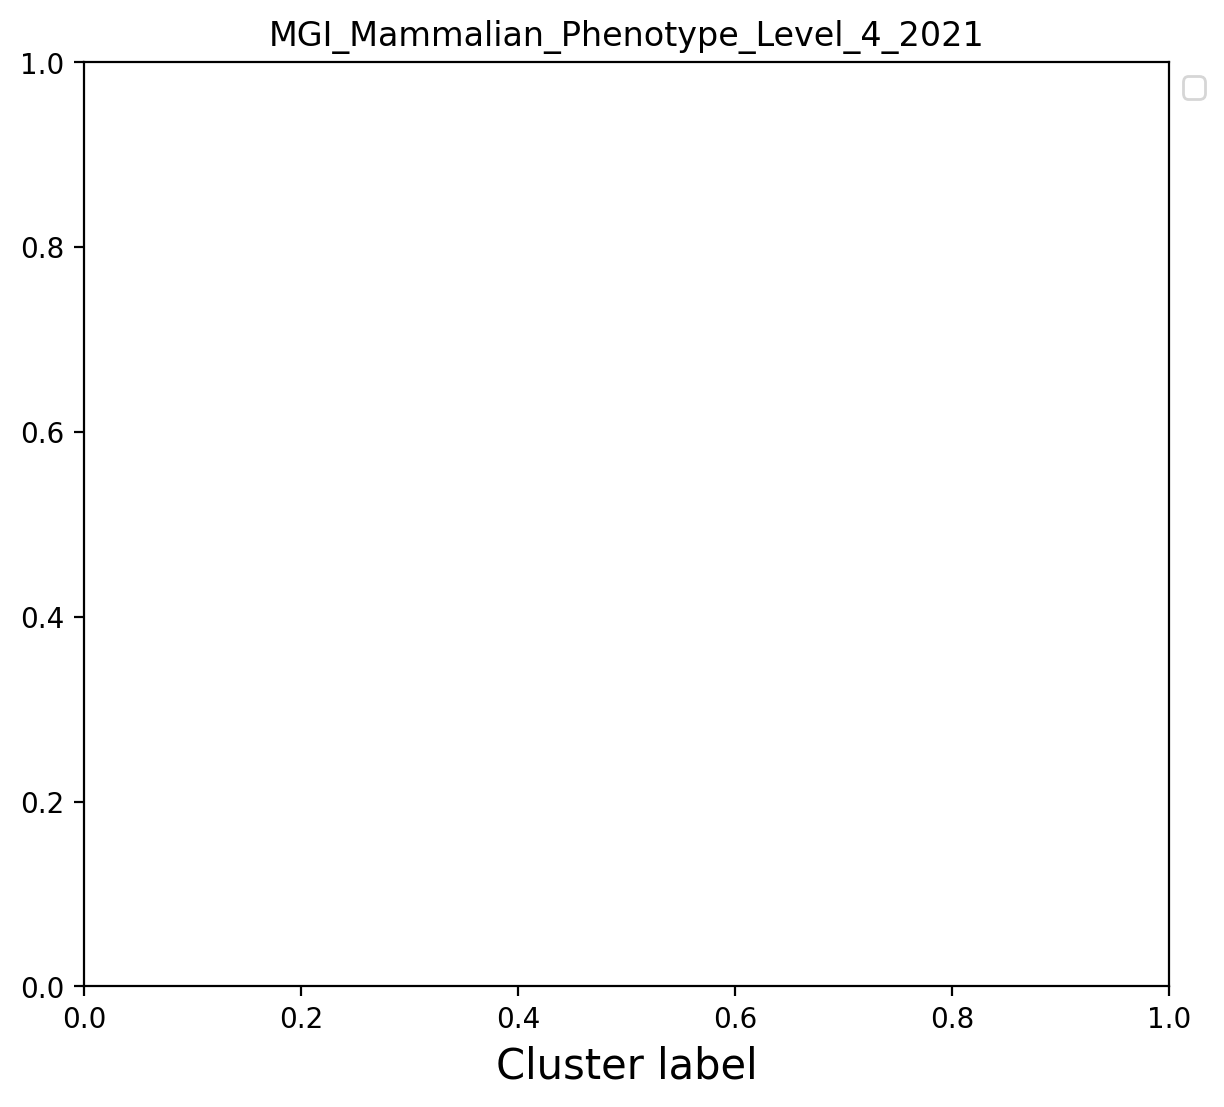

In [78]:
fig = plt.figure(figsize=(7, 6), dpi=100)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Correlation of real profiles

In [79]:
layer_mean = df_cont.groupby(['condition', 'layer']).mean()

In [80]:
from scipy.stats import spearmanr, pearsonr, kendalltau

columns = ['pear_ha', 'pear_mca', 'kend_ha', 'kend_mca', ]
corr_list = []
for gene in df_spline.columns[:-1]:
    human_spl = layer_mean.loc['human', gene].values
    adult_spl = layer_mean.loc['spatial_libd_human', gene].values
    chimp_spl = layer_mean.loc['chimp', gene].values
    macaque_spl = layer_mean.loc['macaque', gene].values
    ch_m_spl = (chimp_spl + macaque_spl) / 2



    pear_ha = pearsonr(adult_spl, human_spl)
    pear_mca = pearsonr(adult_spl, ch_m_spl)
    sp_ha = kendalltau(adult_spl, human_spl)
    sp_mca = kendalltau(adult_spl, macaque_spl)
    corr_list.append([pear_ha[0], pear_mca[0], sp_ha[0], sp_mca[0]])

corr_df_real = pd.DataFrame(corr_list, columns=columns, index=df_spline.columns[:-1])
corr_df_real.head()

pear_ha  pear_mca   kend_ha  kend_mca
ALCAM  -0.031828 -0.296875 -0.428571 -0.333333
AMZ2    0.175596 -0.725024  0.142857 -0.333333
ASAH1   0.824290 -0.335163  0.619048 -0.047619
ASAP2  -0.076759  0.867121  0.047619  0.714286
ATP1A3 -0.143190  0.659168 -0.047619  0.428571

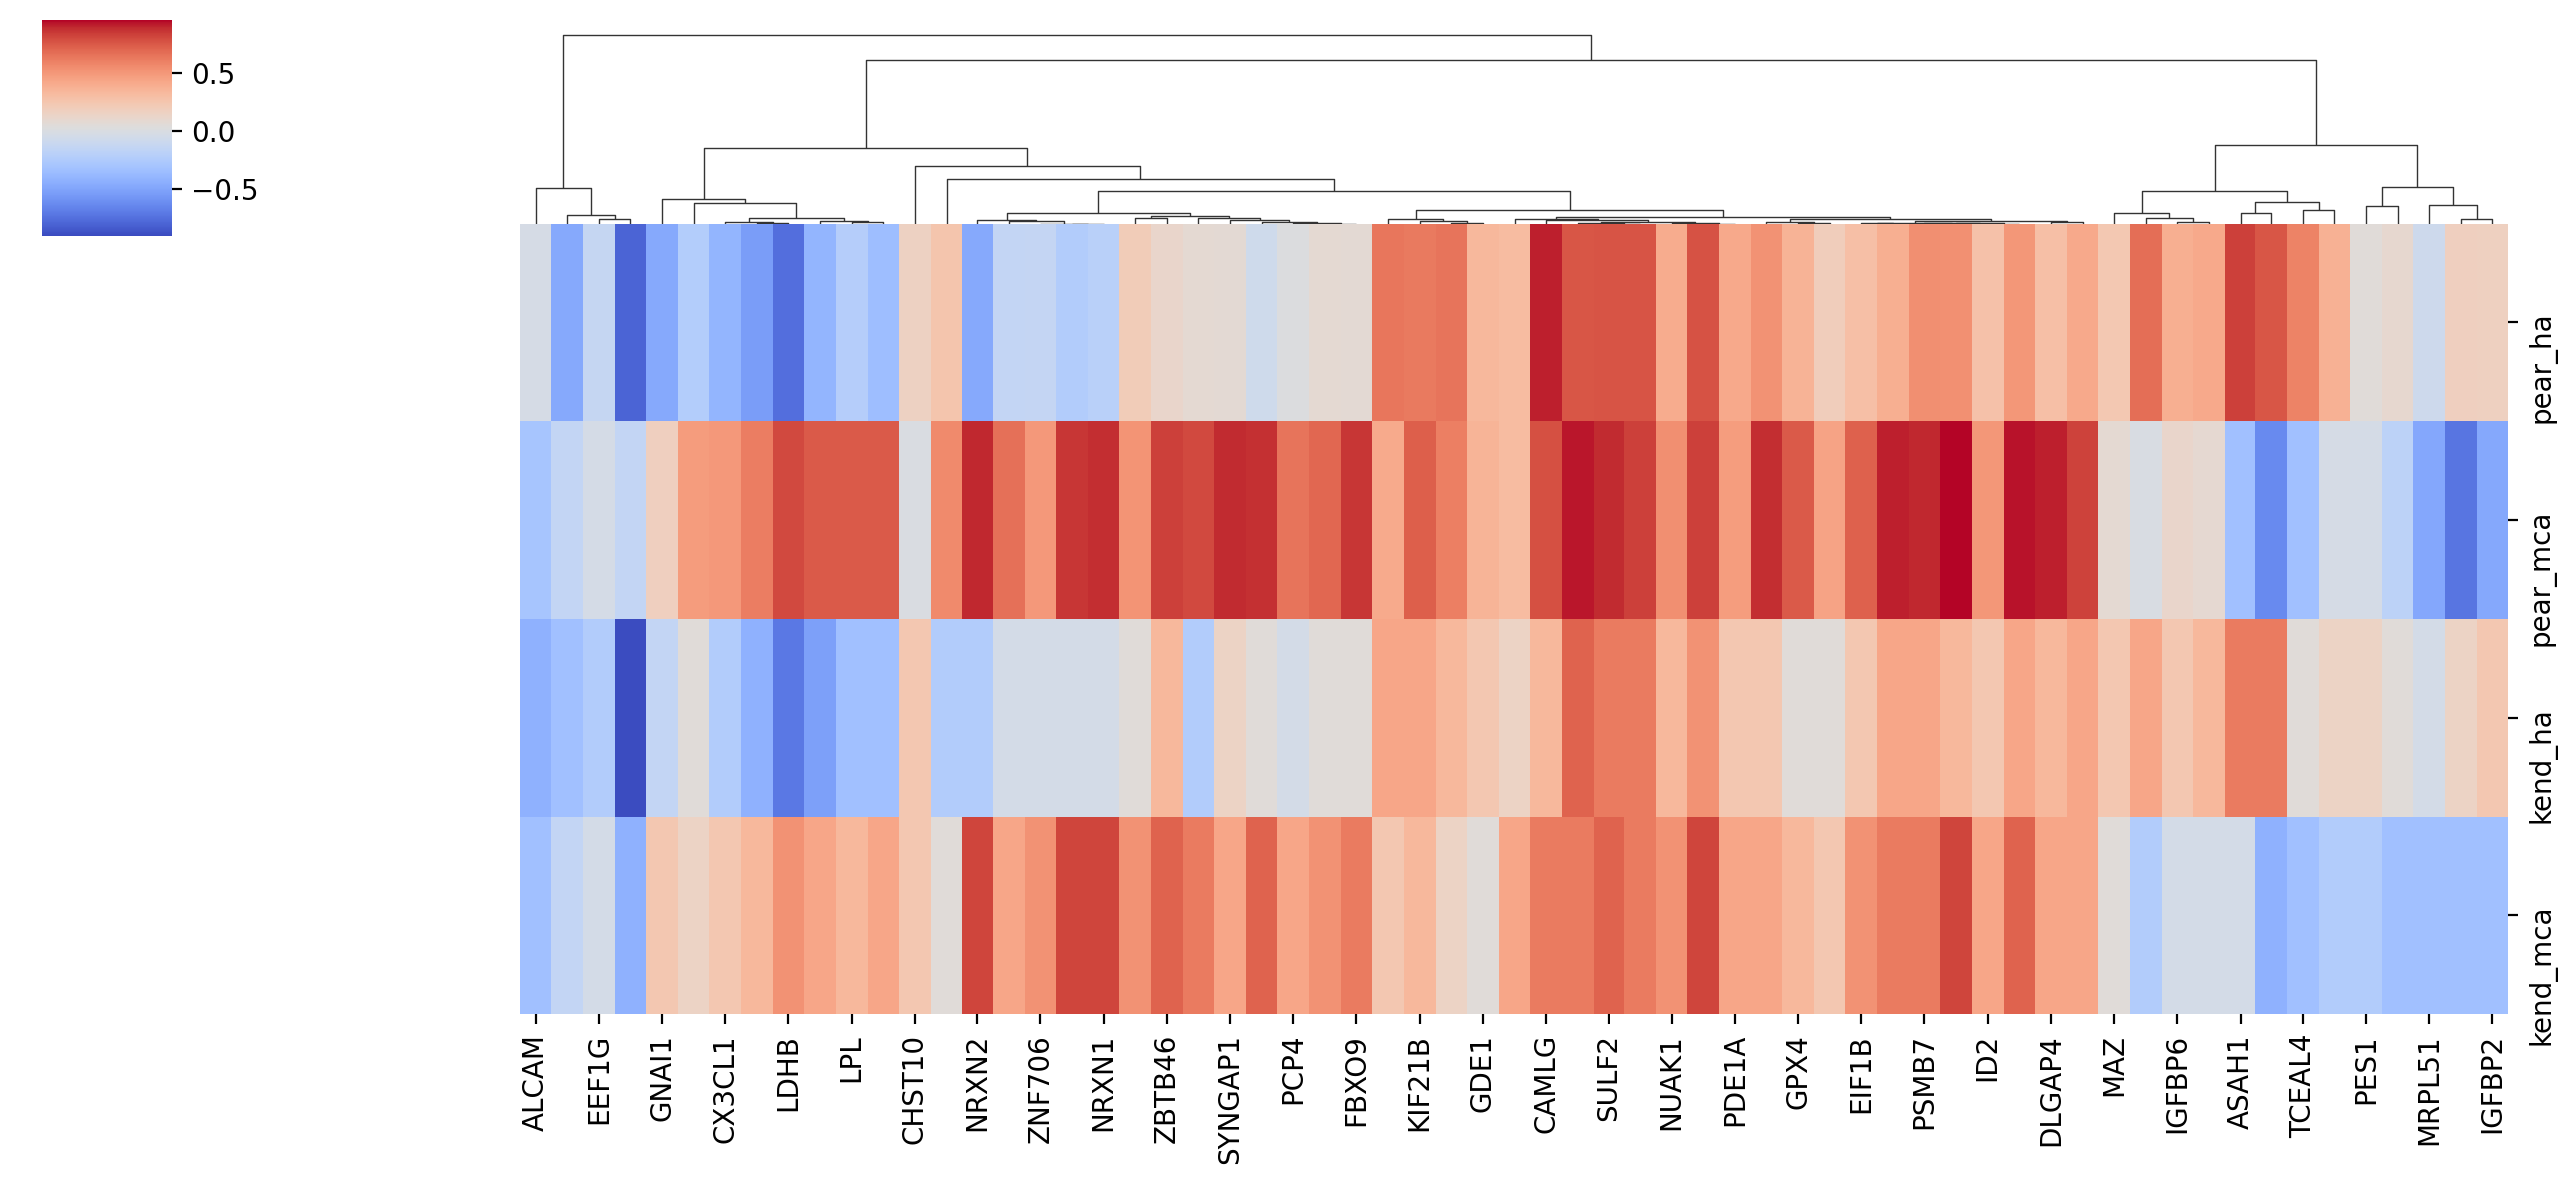

In [81]:
#fig = plt.figure(figsize=(10, 3), dpi=60)
clust = sns.clustermap(corr_df_real.T, cmap='coolwarm', figsize=(13, 6), row_cluster=False, metric='cosine')

In [82]:
corr_df_real['mean_ha'] = (corr_df_real['kend_ha'] + corr_df_real['pear_ha']) / 2
corr_df_real['mean_mca'] = (corr_df_real['kend_mca'] + corr_df_real['pear_mca']) / 2
corr_df_real['corr_diff'] = corr_df_real['mean_ha'] - corr_df_real['mean_mca']
corr_df_real['pear_diff'] = corr_df_real['pear_ha'] - corr_df_real['pear_mca']
corr_df_real['kend_diff'] = corr_df_real['kend_ha'] - corr_df_real['kend_mca']

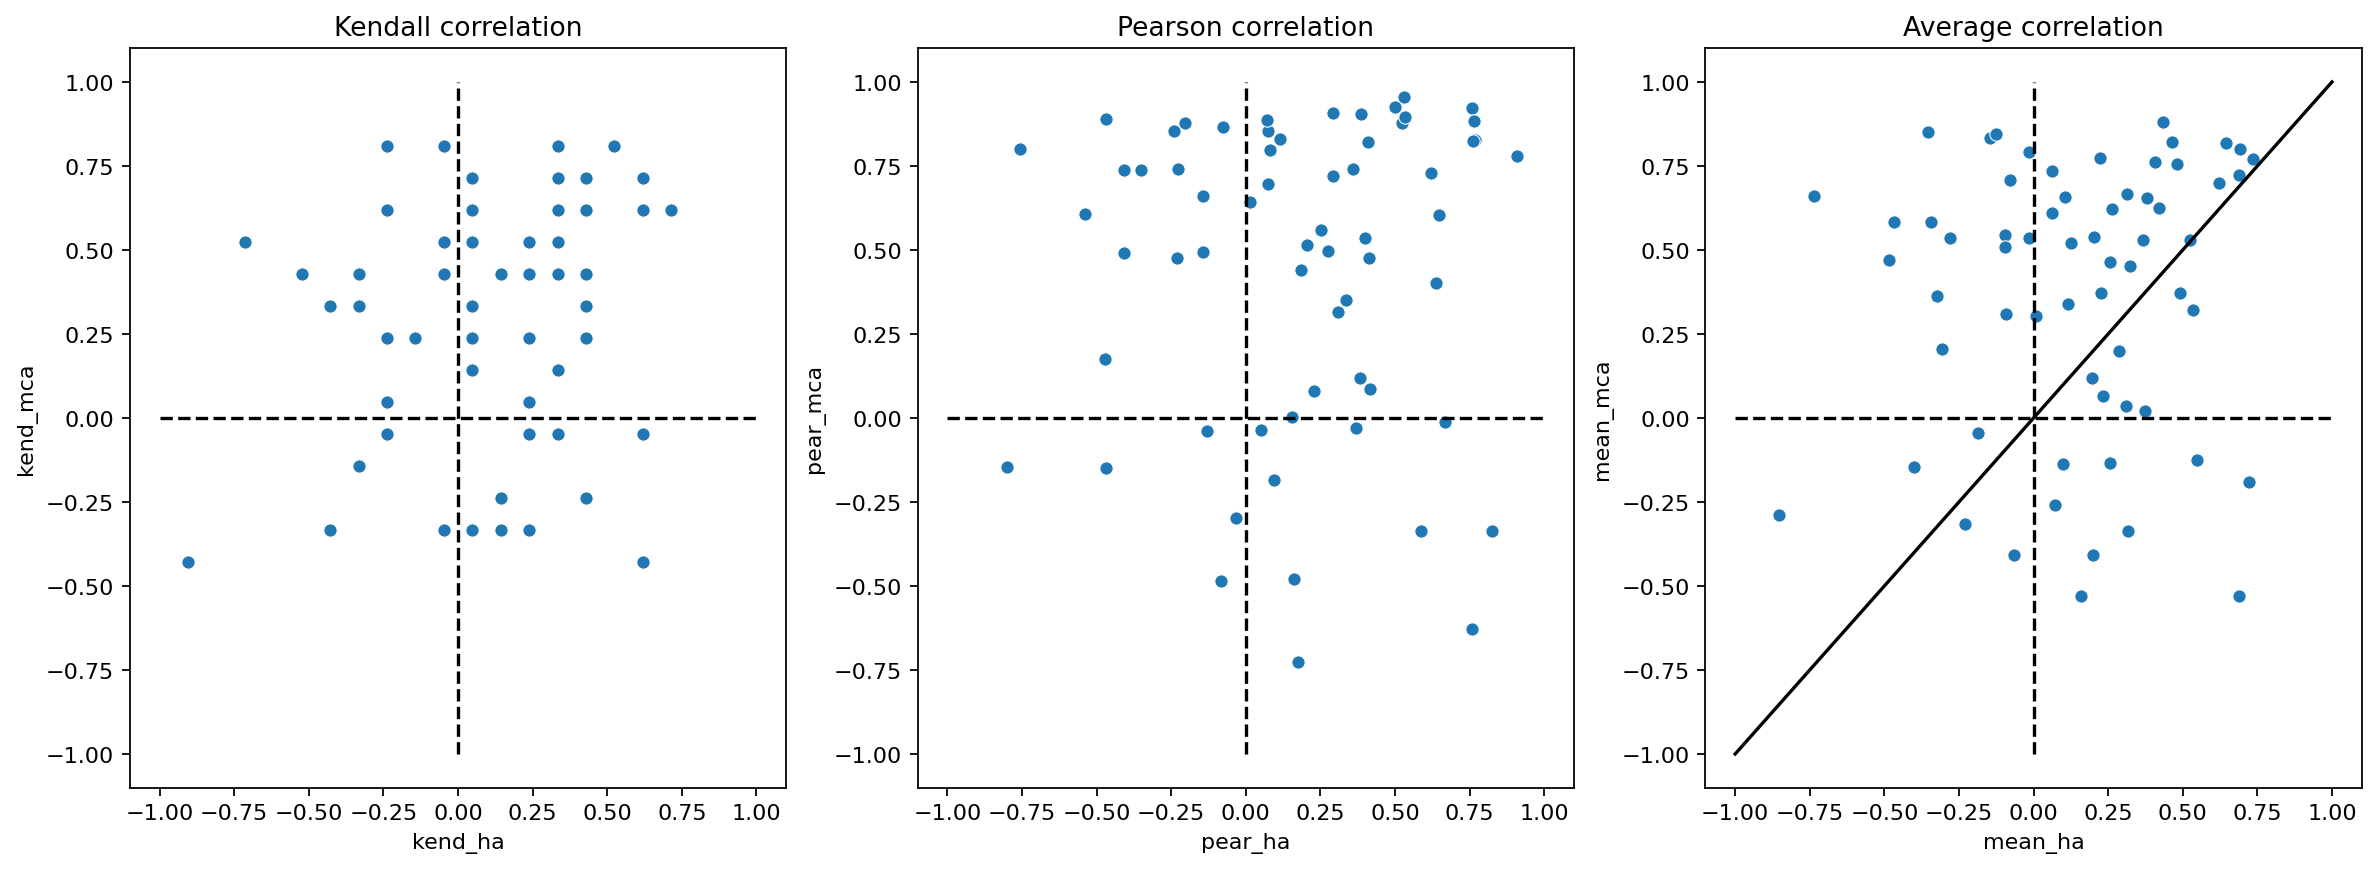

In [83]:
mpl.rcdefaults()

fig, ax = plt.subplots(1, 3, figsize=(18, 6), dpi=80)
sns.scatterplot(corr_df_real, x='kend_ha', y='kend_mca', ax=ax[0])
ax[0].hlines(y=0, xmin=-1, xmax=1, colors='black', linestyles='dashed')
ax[0].vlines(x=0, ymin=-1, ymax=1, colors='black', linestyles='dashed')
ax[0].set_title('Kendall correlation')
ax[0].grid(False)

sns.scatterplot(corr_df_real, x='pear_ha', y='pear_mca', ax=ax[1])
ax[1].hlines(y=0, xmin=-1, xmax=1, colors='black', linestyles='dashed')
ax[1].vlines(x=0, ymin=-1, ymax=1, colors='black', linestyles='dashed')
ax[1].set_title('Pearson correlation')
ax[1].grid(False)

sns.scatterplot(corr_df_real, x='mean_ha', y='mean_mca', ax=ax[2])
ax[2].hlines(y=0, xmin=-1, xmax=1, colors='black', linestyles='dashed')
ax[2].vlines(x=0, ymin=-1, ymax=1, colors='black', linestyles='dashed')
ax[2].plot([-1, 1], [-1, 1], '-', color='black')
ax[2].set_title('Average correlation')
ax[2].grid(False)

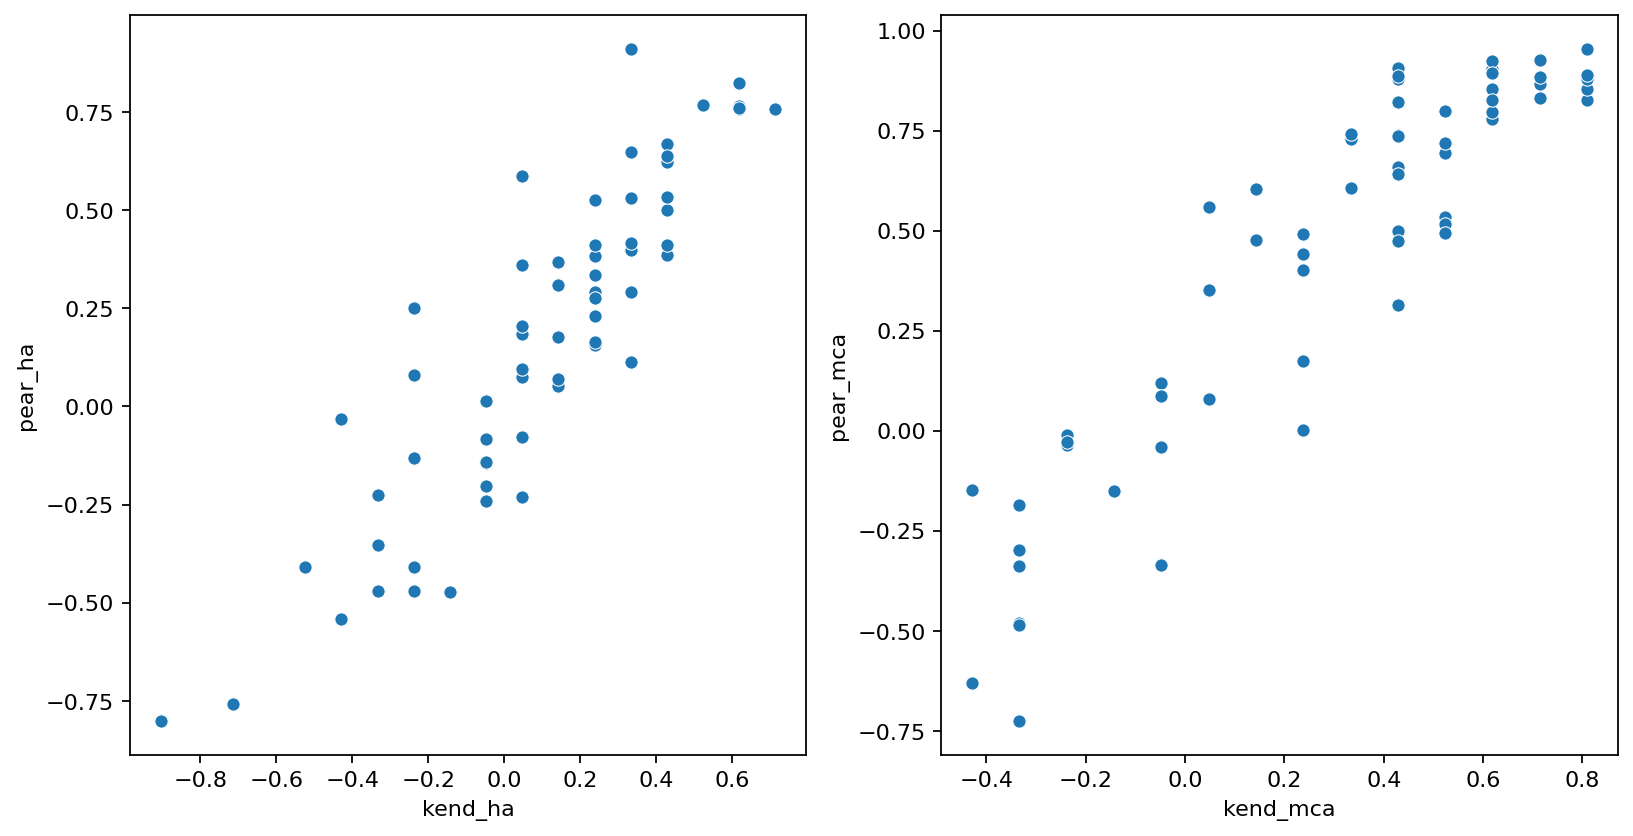

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=80)
sns.scatterplot(x=corr_df_real['kend_ha'], y=corr_df_real['pear_ha'], ax=ax[0])
ax[0].grid(False)

sns.scatterplot(corr_df_real, x=corr_df_real['kend_mca'], y=corr_df_real['pear_mca'], ax=ax[1])
ax[1].grid(False)

In [85]:
corr_df_real['label'] = 'Zero'
corr_df_real.loc[corr_df_real['pear_diff'] > 0.5, 'label'] = 'human-specific'
corr_df_real.loc[(corr_df_real['pear_diff'] > 0) & (corr_df_real['pear_diff'] <= 0.5), 'label'] = 'maybe human-specific'
corr_df_real.loc[(corr_df_real['pear_diff'] < 0) & (corr_df_real['pear_diff'] >= -0.5), 'label'] = 'maybe age-specific'
corr_df_real.loc[corr_df_real['pear_diff'] < -0.5, 'label'] = 'age-specific'
corr_df_real.label.value_counts()

label
age-specific            23
maybe age-specific      22
maybe human-specific    12
human-specific           6
Name: count, dtype: int64

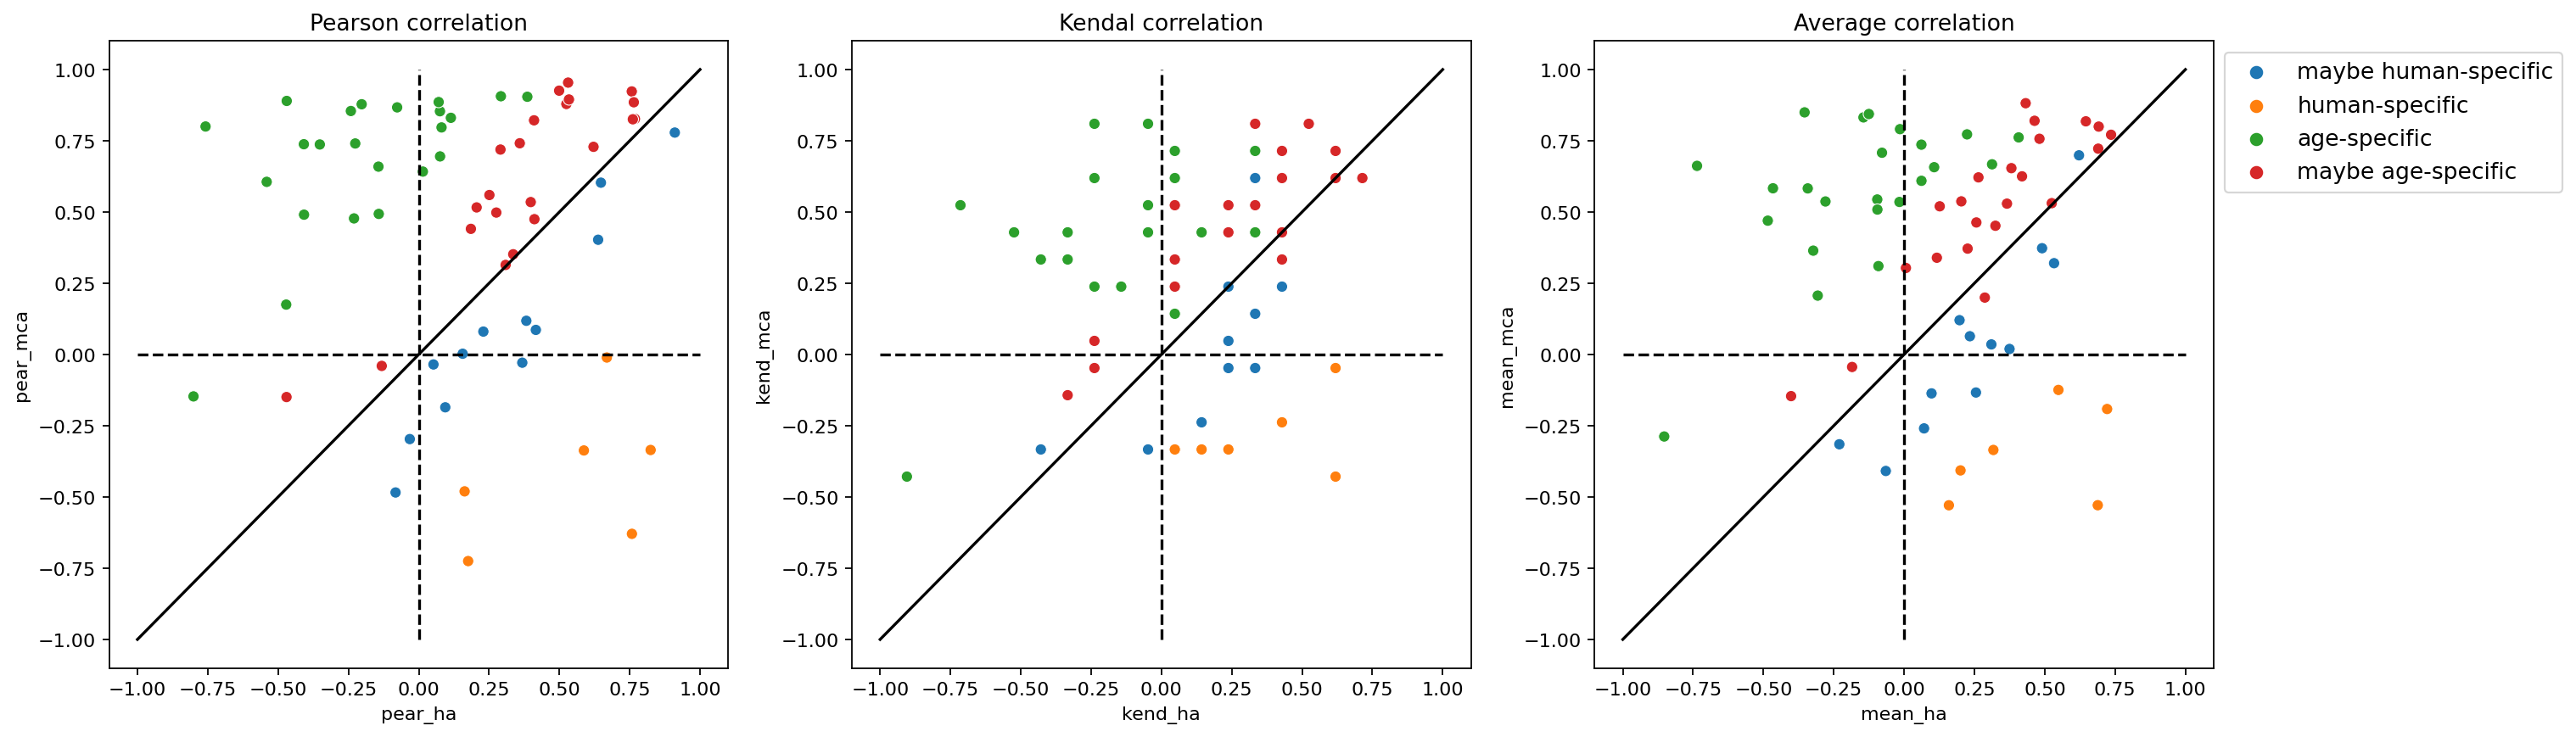

In [86]:
mpl.rcdefaults()

fig, ax = plt.subplots(1, 3, figsize=(20, 6), dpi=80)

sns.scatterplot(corr_df_real, x='pear_ha', y='pear_mca', ax=ax[0], hue='label')
ax[0].hlines(y=0, xmin=-1, xmax=1, colors='black', linestyles='dashed')
ax[0].vlines(x=0, ymin=-1, ymax=1, colors='black', linestyles='dashed')
ax[0].plot([-1, 1], [-1, 1], '-', color='black')
ax[0].set_title('Pearson correlation')
ax[0].grid(False)
ax[0].get_legend().remove()

sns.scatterplot(corr_df_real, x='kend_ha', y='kend_mca', ax=ax[1], hue='label')
ax[1].hlines(y=0, xmin=-1, xmax=1, colors='black', linestyles='dashed')
ax[1].vlines(x=0, ymin=-1, ymax=1, colors='black', linestyles='dashed')
ax[1].plot([-1, 1], [-1, 1], '-', color='black')
ax[1].set_title('Kendal correlation')
ax[1].grid(False)
ax[1].get_legend().remove()

sns.scatterplot(corr_df_real, x='mean_ha', y='mean_mca', ax=ax[2], hue='label')
ax[2].hlines(y=0, xmin=-1, xmax=1, colors='black', linestyles='dashed')
ax[2].vlines(x=0, ymin=-1, ymax=1, colors='black', linestyles='dashed')
ax[2].plot([-1, 1], [-1, 1], '-', color='black')
ax[2].set_title('Average correlation')
ax[2].grid(False)
ax[2].legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1), prop={"size":12})

Text(0, 0.5, 'corr(adult vs newborn human) - corr(adult vs newborn macaque)')

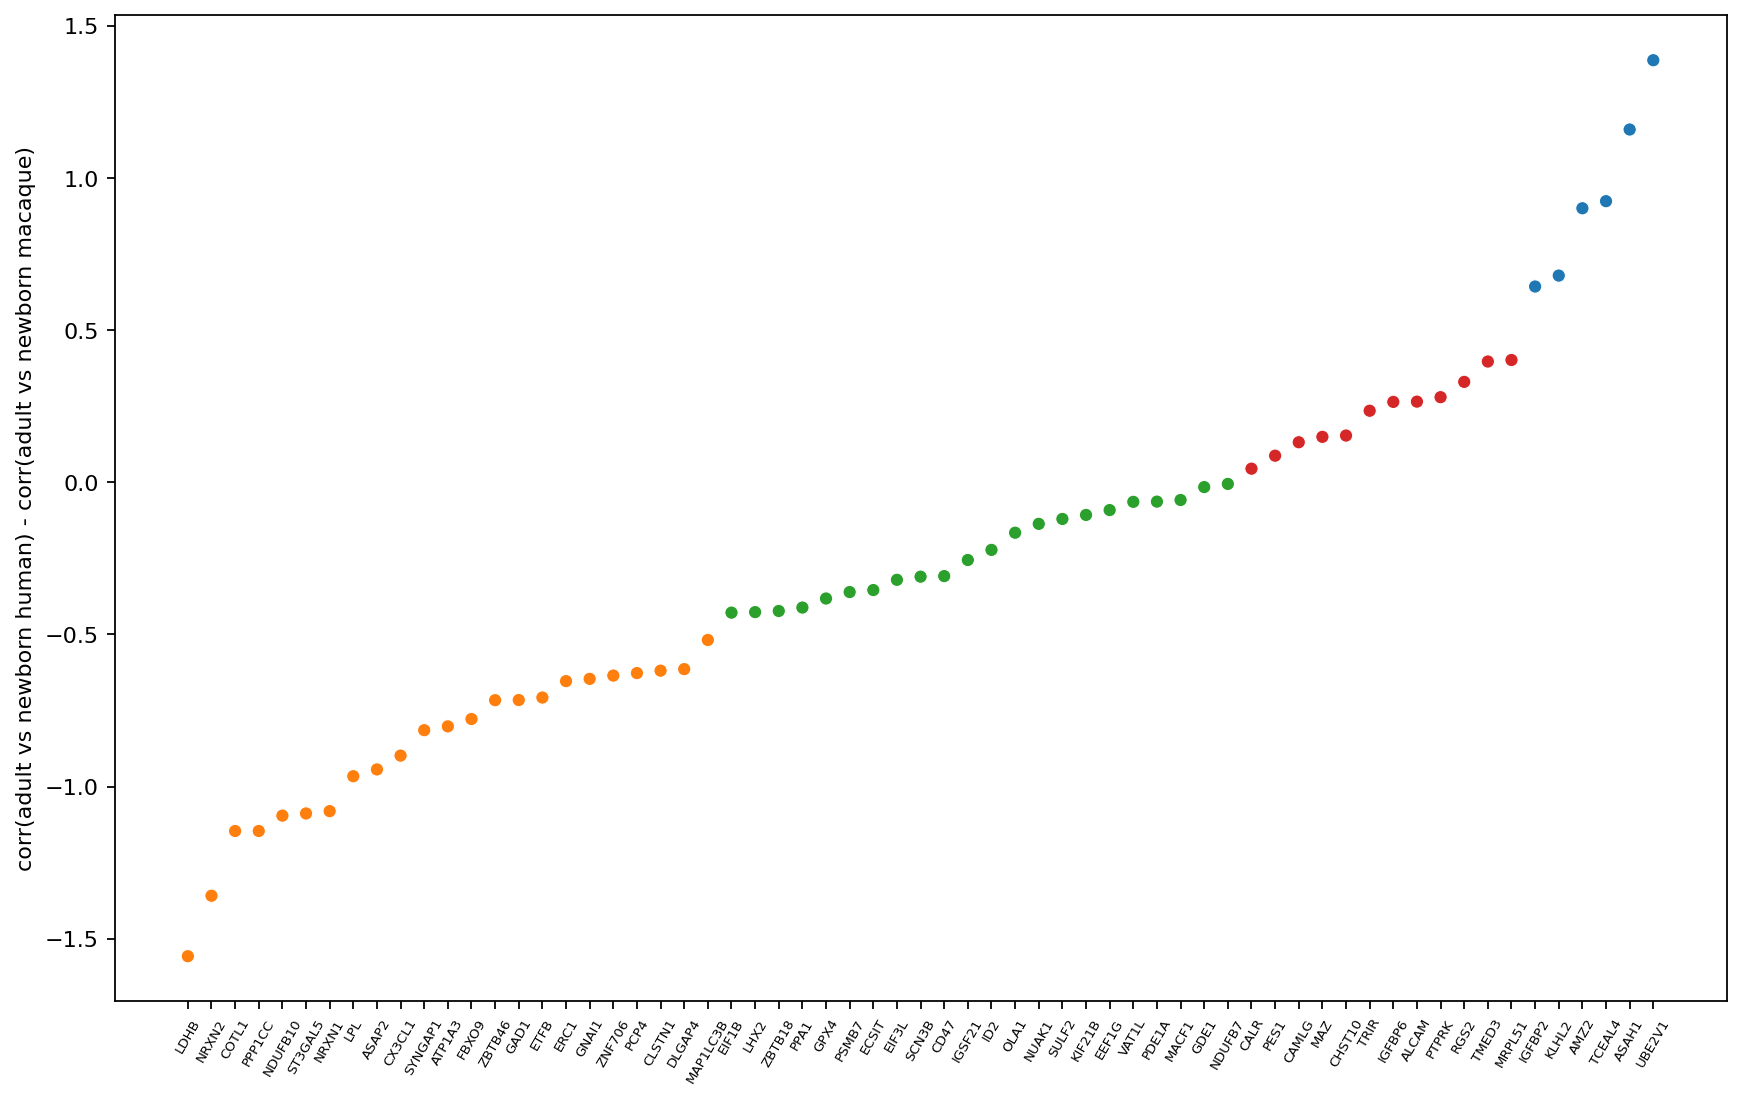

In [87]:
fig = plt.figure(figsize=(13, 8), dpi=80)
corr_df_real = corr_df_real.sort_values(by='pear_diff')
color_dict_labels = {'human-specific': 'tab:blue', 'age-specific': 'tab:orange', 'maybe human-specific': 'tab:red', 'maybe age-specific': 'tab:green'}
sns.scatterplot(corr_df_real['pear_diff'], color=corr_df_real.label.map(color_dict_labels))
plt.xticks(rotation=60, fontsize=6);
plt.ylabel("corr(adult vs newborn human) - corr(adult vs newborn macaque)", fontsize=10)

## Functional analysis

In [88]:
common_hs_genes, len(common_hs_genes)

(Index(['ALCAM', 'AMZ2', 'ASAH1', 'ASAP2', 'ATP1A3', 'CALR', 'CAMLG', 'CD47',
        'CHST10', 'CLSTN1', 'COTL1', 'CX3CL1', 'DLGAP4', 'ECSIT', 'EEF1G',
        'EIF1B', 'EIF3L', 'ERC1', 'ETFB', 'FBXO9', 'GAD1', 'GDE1', 'GNAI1',
        'GPX4', 'ID2', 'IGFBP2', 'IGFBP6', 'IGSF21', 'KIF21B', 'KLHL2', 'LDHB',
        'LHX2', 'LPL', 'MACF1', 'MAP1LC3B', 'MAZ', 'MRPL51', 'NDUFB10',
        'NDUFB7', 'NRXN1', 'NRXN2', 'NUAK1', 'OLA1', 'PCP4', 'PDE1A', 'PES1',
        'PPA1', 'PPP1CC', 'PSMB7', 'PTPRK', 'RGS2', 'SCN3B', 'ST3GAL5', 'SULF2',
        'SYNGAP1', 'TCEAL4', 'TMED3', 'TRIR', 'UBE2V1', 'VAT1L', 'ZBTB18',
        'ZBTB46', 'ZNF706'],
       dtype='object'),
 63)

In [89]:
gene_clust = list()
enrich_results = list()

for group in ['age-specific', 'maybe age-specific', 'maybe human-specific', 'human-specific']:
    gene_set = corr_df_real[corr_df_real.label == group].index.to_list()
    gene_clust.append(GeneCluster(gene_set, group, group, background_genes))
    time.sleep(1)

## GO_Biological_Process_2023

In [150]:
db_name = 'GO_Biological_Process_2023'
GeneCluster.enrich_geneclusters(gene_clust,db_name )

In [151]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank    p-val     Z-score  \
Term                                                                            
Vocal Learning (GO:0042297)                            1  0.00005  369.761905   
Imitative Learning (GO:0098596)                        2  0.00005  369.761905   
Auditory Behavior (GO:0031223)                         3  0.00005  369.761905   
Learned Vocalization Behavior Or Vocal Learning...     4  0.00005  369.761905   
Postsynaptic Density Assembly (GO:0097107)             5  0.00005  369.761905   

                                                    Combined score  \
Term                                                                 
Vocal Learning (GO:0042297)                            3663.014138   
Imitative Learning (GO:0098596)                        3663.014138   
Auditory Behavior (GO:0031223)                         3663.014138   
Learned Vocalization Behavior Or Vocal Learning...     3663.014138   
Postsynaptic Density Assembly (GO:0097107)             3663.014138   

                                                   Overlapping genes  \
Term                                                                   
Vocal Learning (GO:0042297)                           [NRXN1, NRXN2]   
Imitative Learning (GO:0098596)                       [NRXN1, NRXN2]   
Auditory Behavior (GO:0031223)                        [NRXN1, NRXN2]   
Learned Vocalization Behavior Or Vocal Learning...    [NRXN1, NRXN2]   
Postsynaptic Density Assembly (GO:0097107)            [NRXN1, NRXN2]   

                                                    Adjusted P-value  \
Term                                                                   
Vocal Learning (GO:0042297)                                 0.002951   
Imitative Learning (GO:0098596)                             0.002951   
Auditory Behavior (GO:0031223)                              0.002951   
Learned Vocalization Behavior Or Vocal Learning...          0.002951   
Postsynaptic Density Assembly (GO:0097107)                  0.002951   

                                                    Old p-value  \
Term                                                              
Vocal Learning (GO:0042297)                                   0   
Imitative Learning (GO:0098596)                               0   
Auditory Behavior (GO:0031223)                                0   
Learned Vocalization Behavior Or Vocal Learning...            0   
Postsynaptic Density Assembly (GO:0097107)                    0   

                                                    Old adjusted p-value  \
Term                                                                       
Vocal Learning (GO:0042297)                                            0   
Imitative Learning (GO:0098596)                                        0   
Auditory Behavior (GO:0031223)                                         0   
Learned Vocalization Behavior Or Vocal Learning...                     0   
Postsynaptic Density Assembly (GO:0097107)                             0   

                                                    num_overlap_genes  \
Term                                                                    
Vocal Learning (GO:0042297)                                         2   
Imitative Learning (GO:0098596)                                     2   
Auditory Behavior (GO:0031223)                                      2   
Learned Vocalization Behavior Or Vocal Learning...                  2   
Postsynaptic Density Assembly (GO:0097107)                          2   

                                                    neg_log10(p_adj)  \
Term                                                                   
Vocal Learning (GO:0042297)                                 2.529979   
Imitative Learning (GO:0098596)                             2.529979   
Auditory Behavior (GO:0031223)                              2.529979   
Learned Vocalization Behavior Or Vocal Learning...          2.529979   
Postsynaptic Density Assembly (GO:00

In [152]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 20)].index.unique()
terms.size

36

In [153]:
enrich_res[enrich_res.cluster_label == 5]

Empty DataFrame
Columns: [Rank, p-val, Z-score, Combined score, Overlapping genes, Adjusted P-value, Old p-value, Old adjusted p-value, num_overlap_genes, neg_log10(p_adj), cluster_label]
Index: []

In [154]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

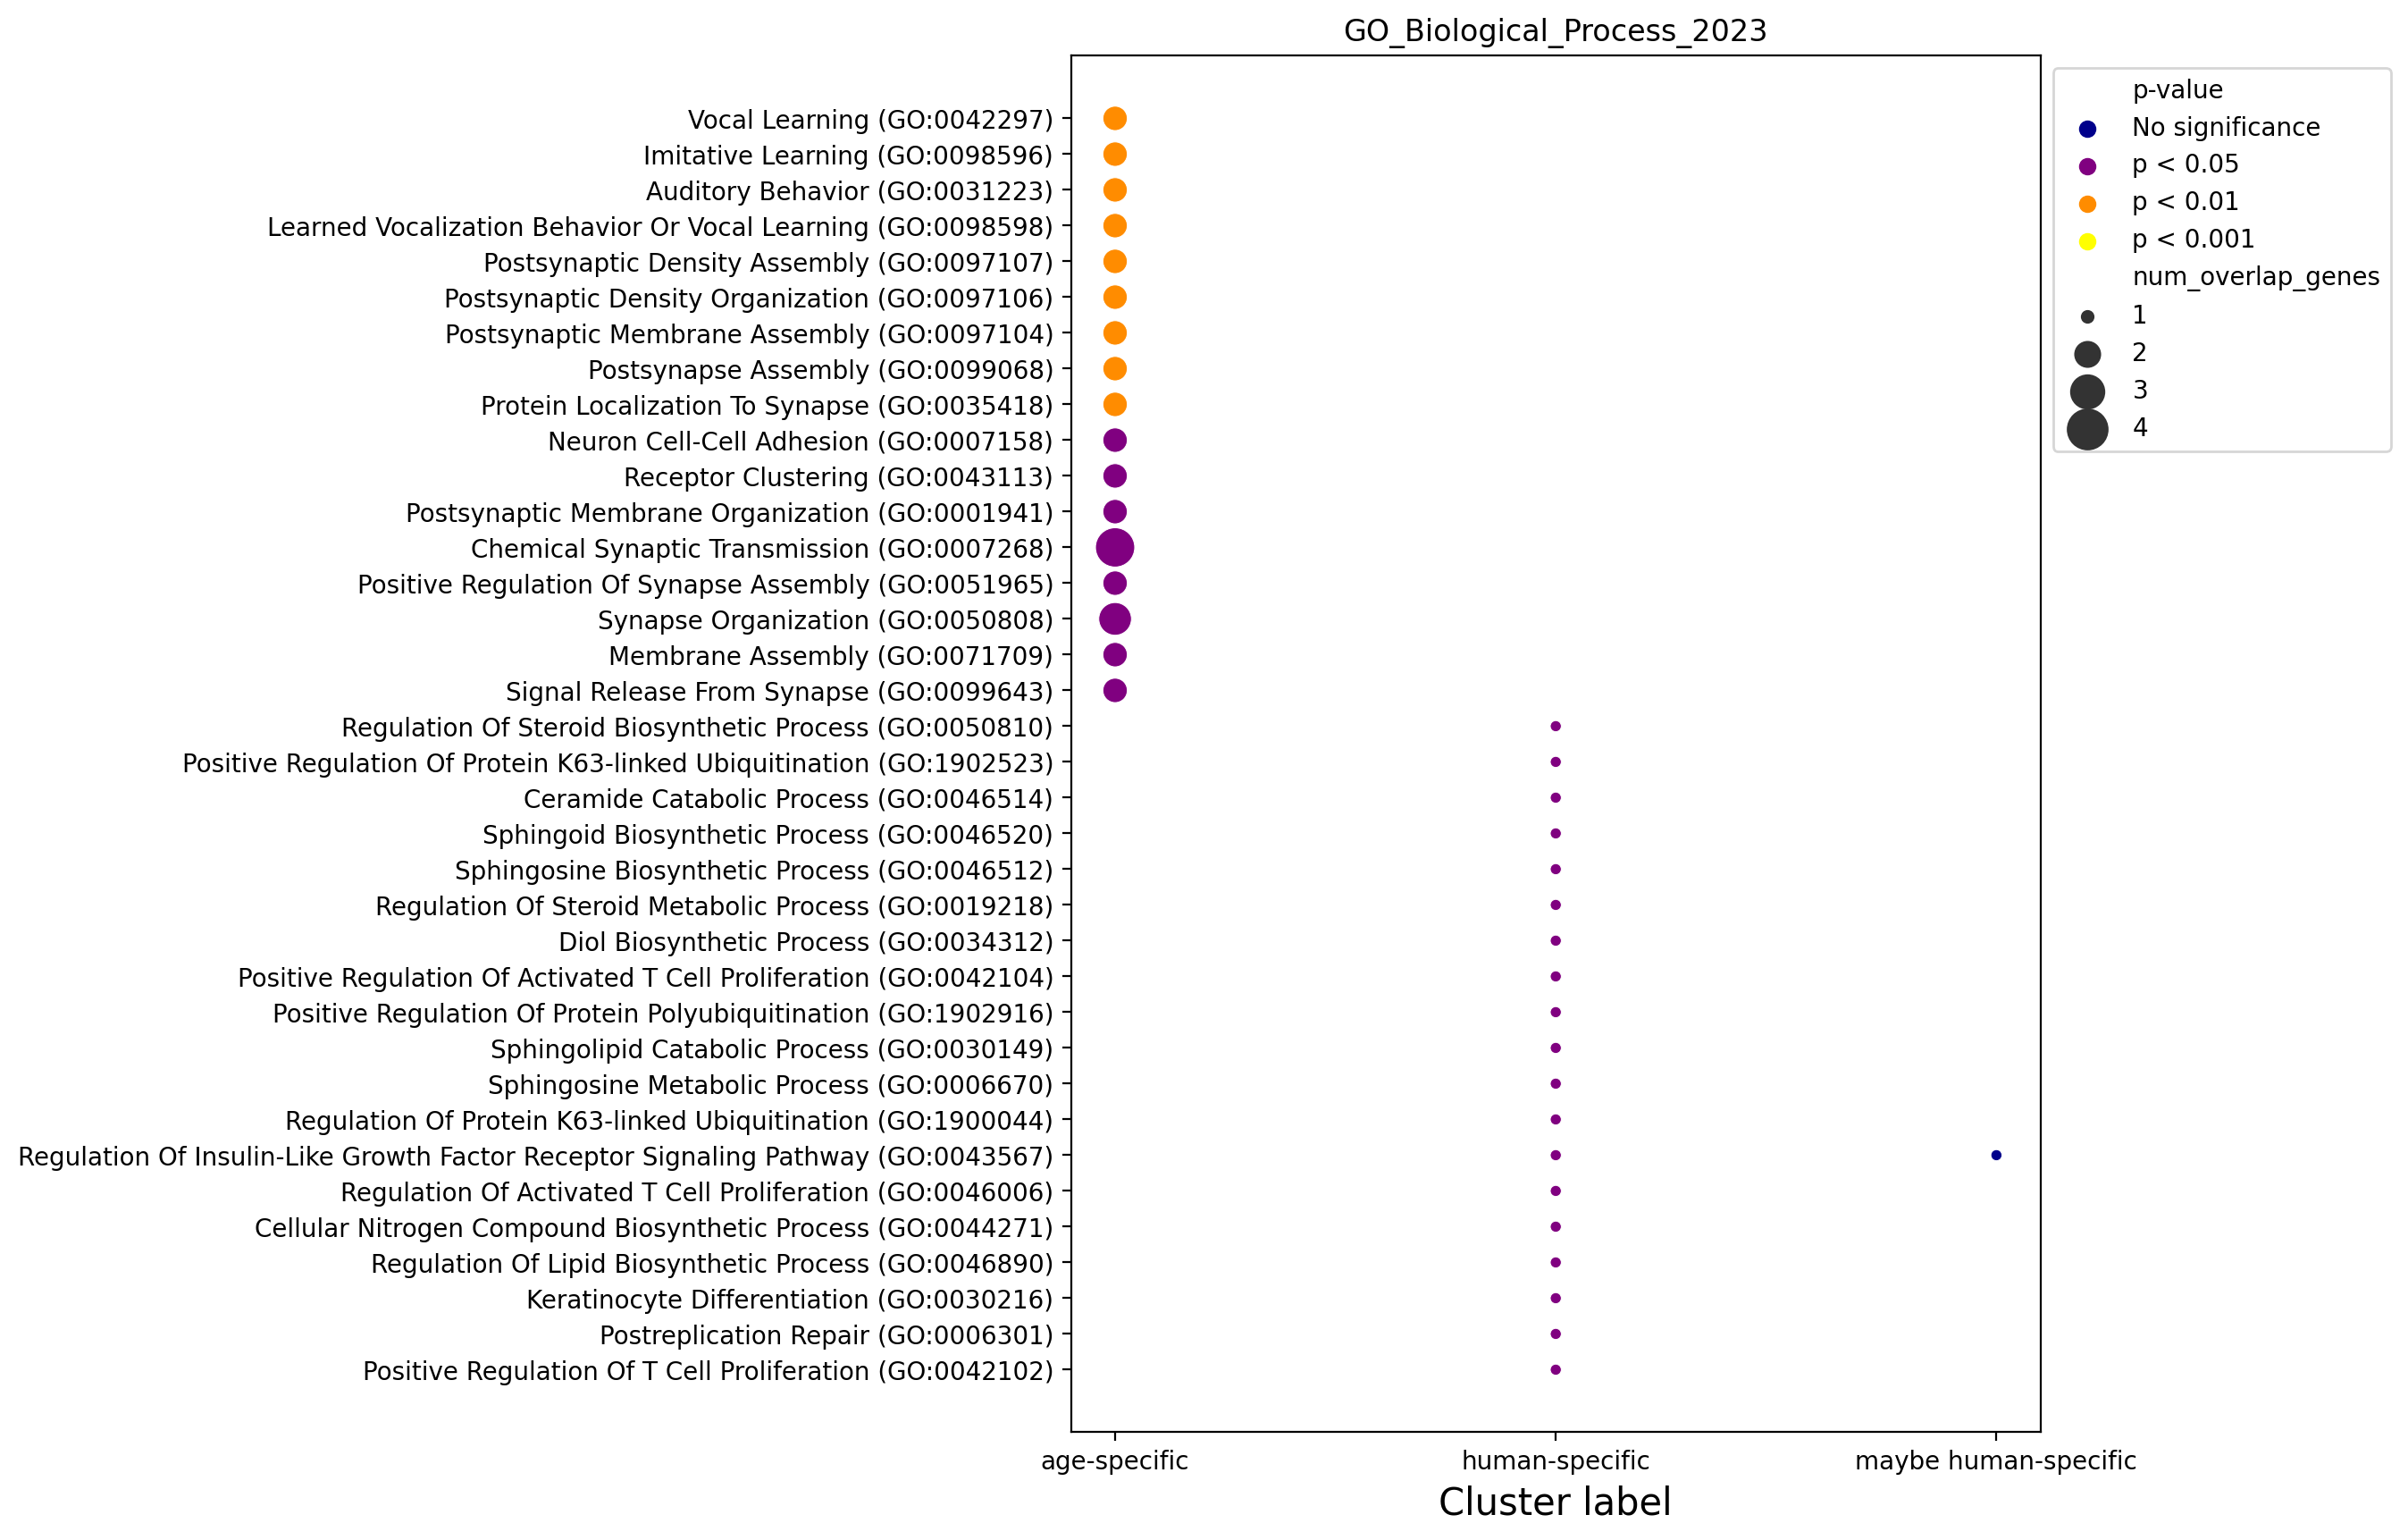

In [155]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 10), dpi=100)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## GO_Molecular_Function_2023

In [96]:
db_name = 'GO_Molecular_Function_2023'
GeneCluster.enrich_geneclusters(gene_clust,db_name )

In [97]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val  \
Term                                                                 
Calcium Channel Regulator Activity (GO:0005246)        1  0.001240   
Lactate Dehydrogenase Activity (GO:0004457)            2  0.002952   
Amyloid-Beta Binding (GO:0001540)                      3  0.007316   
Chemokine Activity (GO:0008009)                        4  0.008832   
P-type Potassium Transmembrane Transporter Acti...     5  0.008832   

                                                       Z-score  \
Term                                                             
Calcium Channel Regulator Activity (GO:0005246)      46.136905   
Lactate Dehydrogenase Activity (GO:0004457)                inf   
Amyloid-Beta Binding (GO:0001540)                    17.517007   
Chemokine Activity (GO:0008009)                     176.477273   
P-type Potassium Transmembrane Transporter Acti...  176.477273   

                                                    Combined score  \
Term                                                                 
Calcium Channel Regulator Activity (GO:0005246)         308.788368   
Lactate Dehydrogenase Activity (GO:0004457)                    inf   
Amyloid-Beta Binding (GO:0001540)                        86.142730   
Chemokine Activity (GO:0008009)                         834.618621   
P-type Potassium Transmembrane Transporter Acti...      834.618621   

                                                   Overlapping genes  \
Term                                                                   
Calcium Channel Regulator Activity (GO:0005246)       [NRXN1, NRXN2]   
Lactate Dehydrogenase Activity (GO:0004457)                   [LDHB]   
Amyloid-Beta Binding (GO:0001540)                   [CLSTN1, ATP1A3]   
Chemokine Activity (GO:0008009)                             [CX3CL1]   
P-type Potassium Transmembrane Transporter Acti...          [ATP1A3]   

                                                    Adjusted P-value  \
Term                                                                   
Calcium Channel Regulator Activity (GO:0005246)             0.062931   
Lactate Dehydrogenase Activity (GO:0004457)                 0.062931   
Amyloid-Beta Binding (GO:0001540)                           0.062931   
Chemokine Activity (GO:0008009)                             0.062931   
P-type Potassium Transmembrane Transporter Acti...          0.062931   

                                                    Old p-value  \
Term                                                              
Calcium Channel Regulator Activity (GO:0005246)               0   
Lactate Dehydrogenase Activity (GO:0004457)                   0   
Amyloid-Beta Binding (GO:0001540)                             0   
Chemokine Activity (GO:0008009)                               0   
P-type Potassium Transmembrane Transporter Acti...            0   

                                                    Old adjusted p-value  \
Term                                                                       
Calcium Channel Regulator Activity (GO:0005246)                        0   
Lactate Dehydrogenase Activity (GO:0004457)                            0   
Amyloid-Beta Binding (GO:0001540)                                      0   
Chemokine Activity (GO:0008009)                                        0   
P-type Potassium Transmembrane Transporter Acti...                     0   

                                                    num_overlap_genes  \
Term                                                                    
Calcium Channel Regulator Activity (GO:0005246)                     2   
Lactate Dehydrogenase Activity (GO:0004457)                         1   
Amyloid-Beta Binding (GO:0001540)                                   2   
Chemokine Activity (GO:0008009)                                     1   
P-type Potassium Transmembrane Transporter Acti...                  1   

                                                    neg_log10(p_adj)  \
Term      

In [98]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 20)].index.unique()
terms.size

5

In [99]:
enrich_res[enrich_res.cluster_label == 5]

Empty DataFrame
Columns: [Rank, p-val, Z-score, Combined score, Overlapping genes, Adjusted P-value, Old p-value, Old adjusted p-value, num_overlap_genes, neg_log10(p_adj), cluster_label]
Index: []

In [100]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

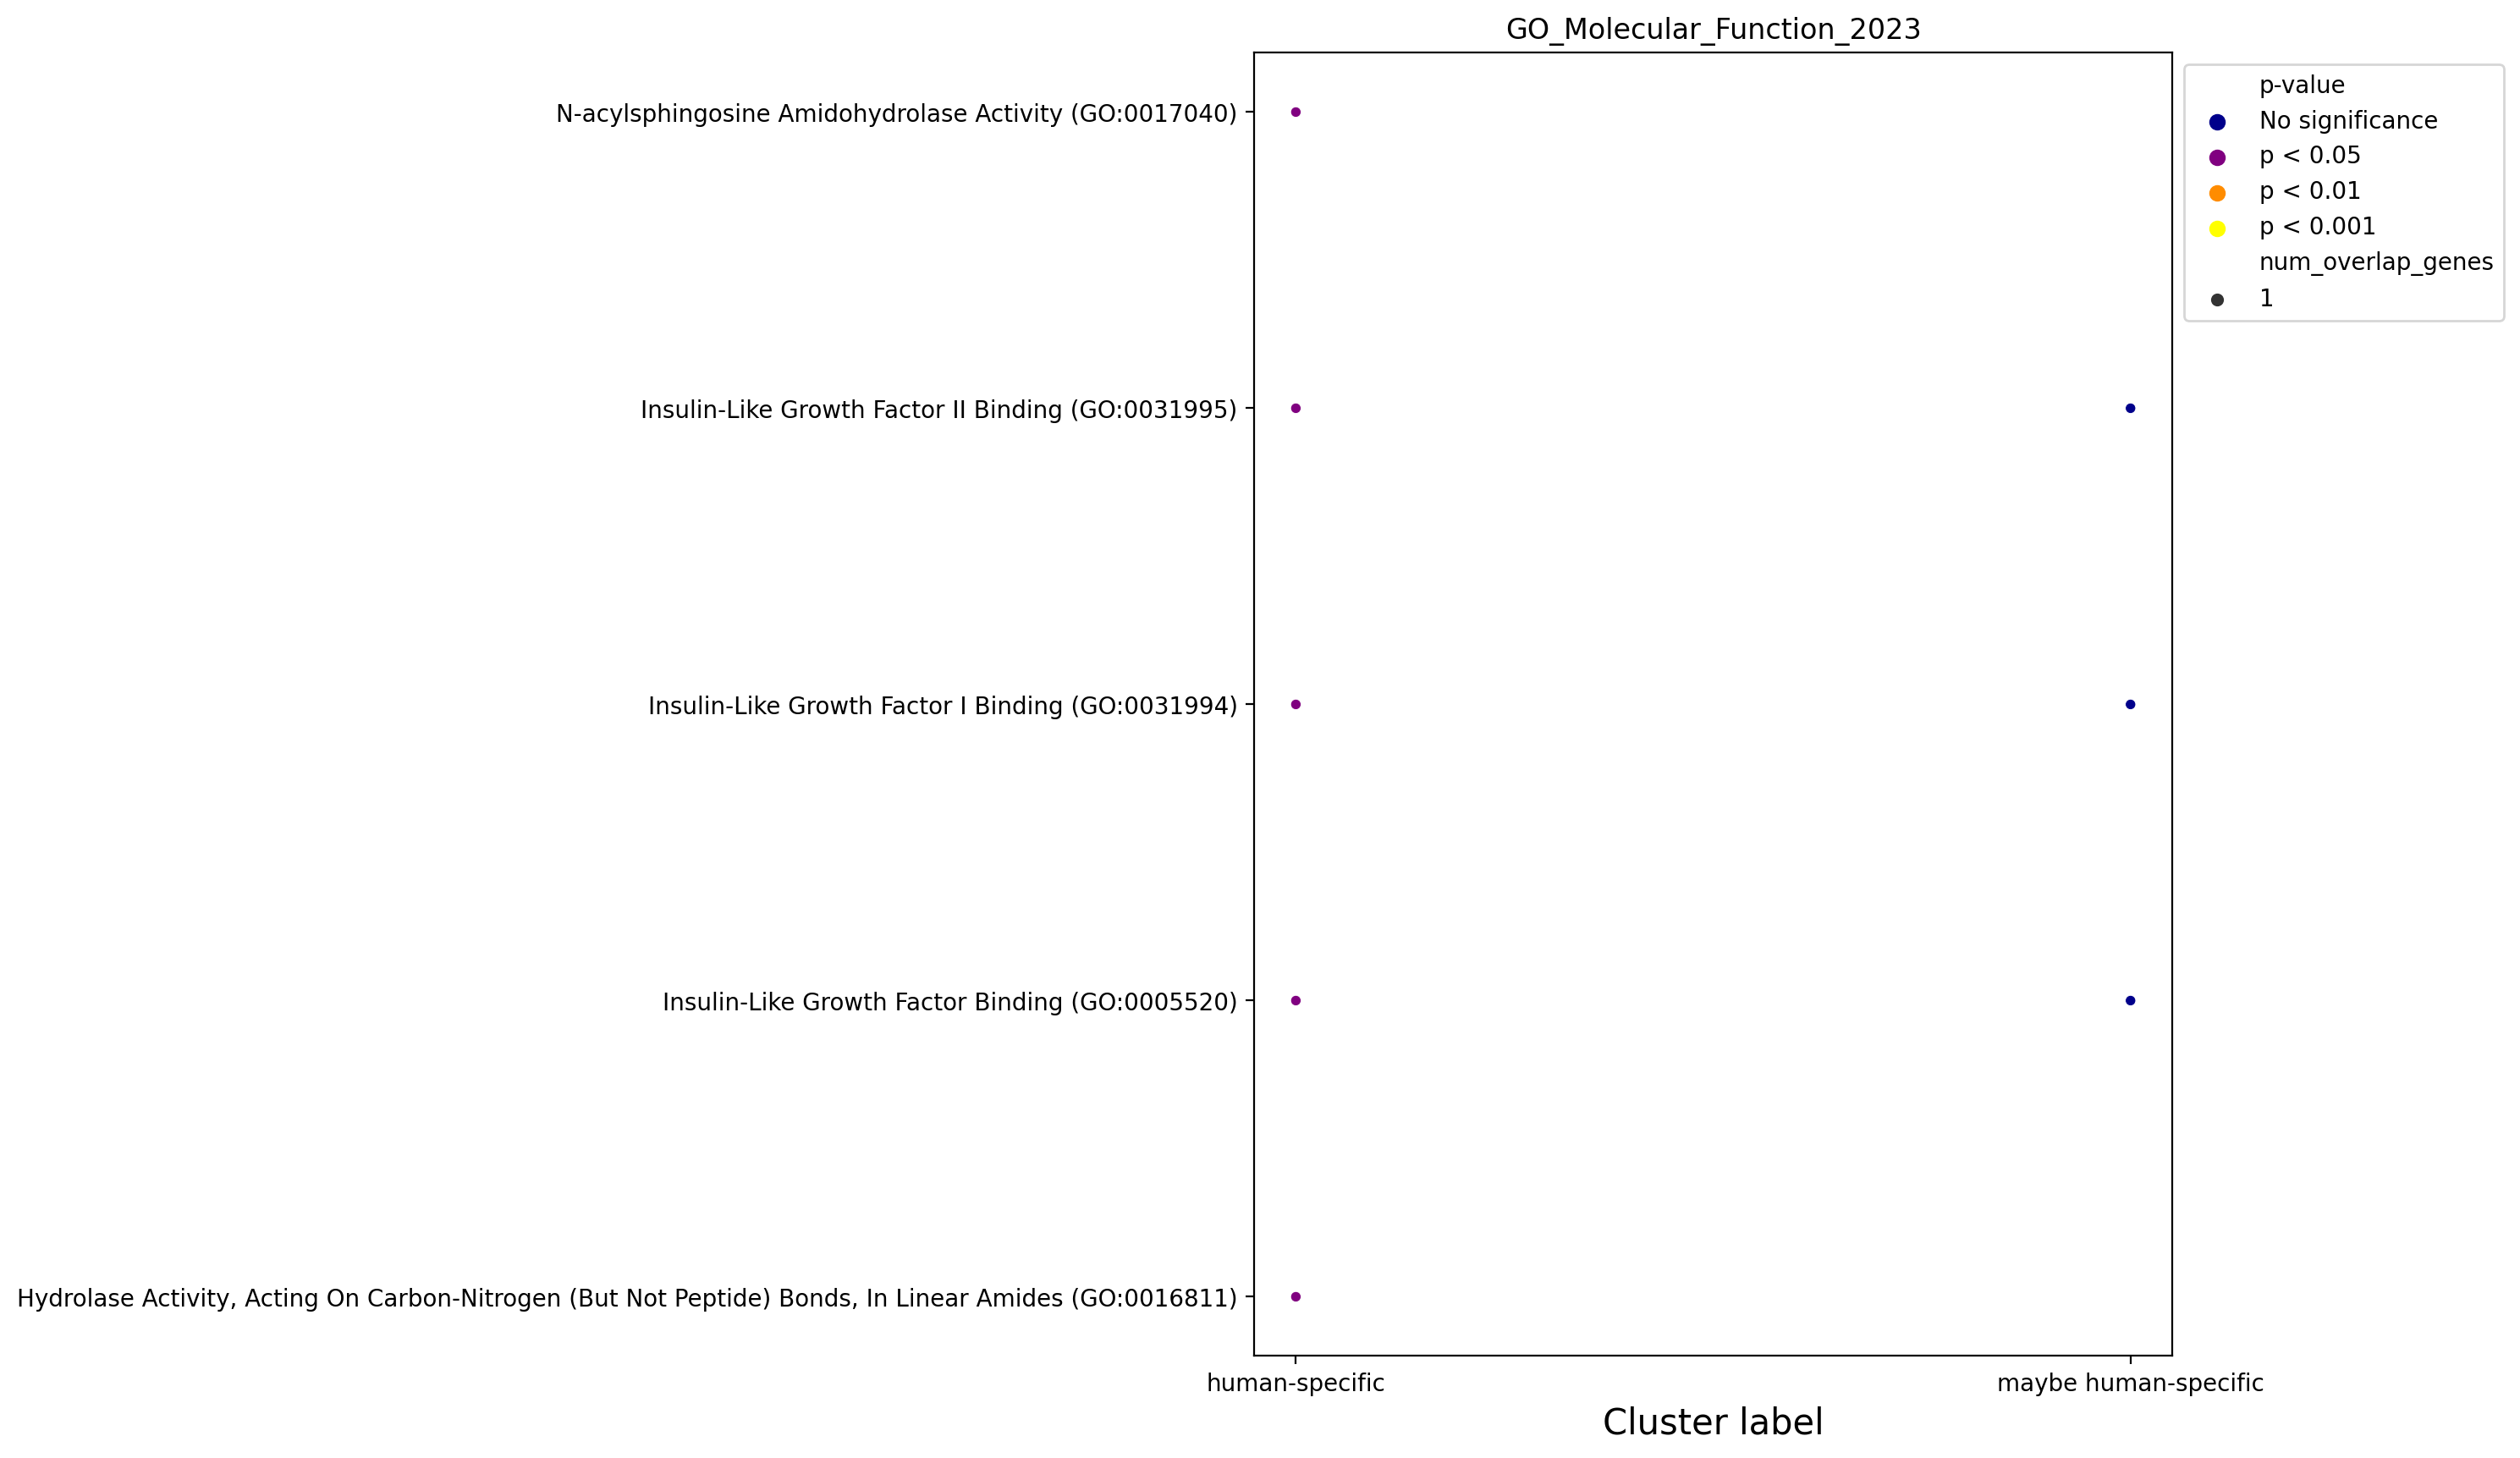

In [101]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 10), dpi=100)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## GO_Cellular_Component_2023

In [102]:
db_name = 'GO_Cellular_Component_2023'
GeneCluster.enrich_geneclusters(gene_clust,db_name )

In [103]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val    Z-score  \
Term                                                                            
Vesicle (GO:0031982)                                   1  0.005042   9.807692   
Cortical Cytoskeleton (GO:0030863)                     2  0.005496  20.452381   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...     3  0.014679  88.215909   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...     4  0.014679  88.215909   
Sodium:Potassium-Exchanging ATPase Complex (GO:...     5  0.017590  70.563636   

                                                    Combined score  \
Term                                                                 
Vesicle (GO:0031982)                                     51.882894   
Cortical Cytoskeleton (GO:0030863)                      106.430284   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...      372.387796   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...      372.387796   
Sodium:Potassium-Exchanging ATPase Complex (GO:...      285.106111   

                                                        Overlapping genes  \
Term                                                                        
Vesicle (GO:0031982)                                [NRXN1, GAD1, ATP1A3]   
Cortical Cytoskeleton (GO:0030863)                          [COTL1, ERC1]   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...                 [GAD1]   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...                 [GAD1]   
Sodium:Potassium-Exchanging ATPase Complex (GO:...               [ATP1A3]   

                                                    Adjusted P-value  \
Term                                                                   
Vesicle (GO:0031982)                                        0.133205   
Cortical Cytoskeleton (GO:0030863)                          0.133205   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...          0.133205   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...          0.133205   
Sodium:Potassium-Exchanging ATPase Complex (GO:...          0.133205   

                                                    Old p-value  \
Term                                                              
Vesicle (GO:0031982)                                          0   
Cortical Cytoskeleton (GO:0030863)                            0   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...            0   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...            0   
Sodium:Potassium-Exchanging ATPase Complex (GO:...            0   

                                                    Old adjusted p-value  \
Term                                                                       
Vesicle (GO:0031982)                                                   0   
Cortical Cytoskeleton (GO:0030863)                                     0   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...                     0   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...                     0   
Sodium:Potassium-Exchanging ATPase Complex (GO:...                     0   

                                                    num_overlap_genes  \
Term                                                                    
Vesicle (GO:0031982)                                                3   
Cortical Cytoskeleton (GO:0030863)                                  2   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...                  1   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...                  1   
Sodium:Potassium-Exchanging ATPase Complex (GO:...                  1   

                                                    neg_log10(p_adj)  \
Term                                                                   
Vesicle (GO:0031982)                                        0.875481   
Cortical Cytoskeleton (GO:0030863)                          0.875481   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...          0.875481   
Clathrin-Sculpted Gamma-Aminobutyric Acid Trans...          0.875481   
S

In [104]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 20)].index.unique()
terms.size

1

In [105]:
enrich_res[enrich_res.cluster_label == 5]

Empty DataFrame
Columns: [Rank, p-val, Z-score, Combined score, Overlapping genes, Adjusted P-value, Old p-value, Old adjusted p-value, num_overlap_genes, neg_log10(p_adj), cluster_label]
Index: []

In [106]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

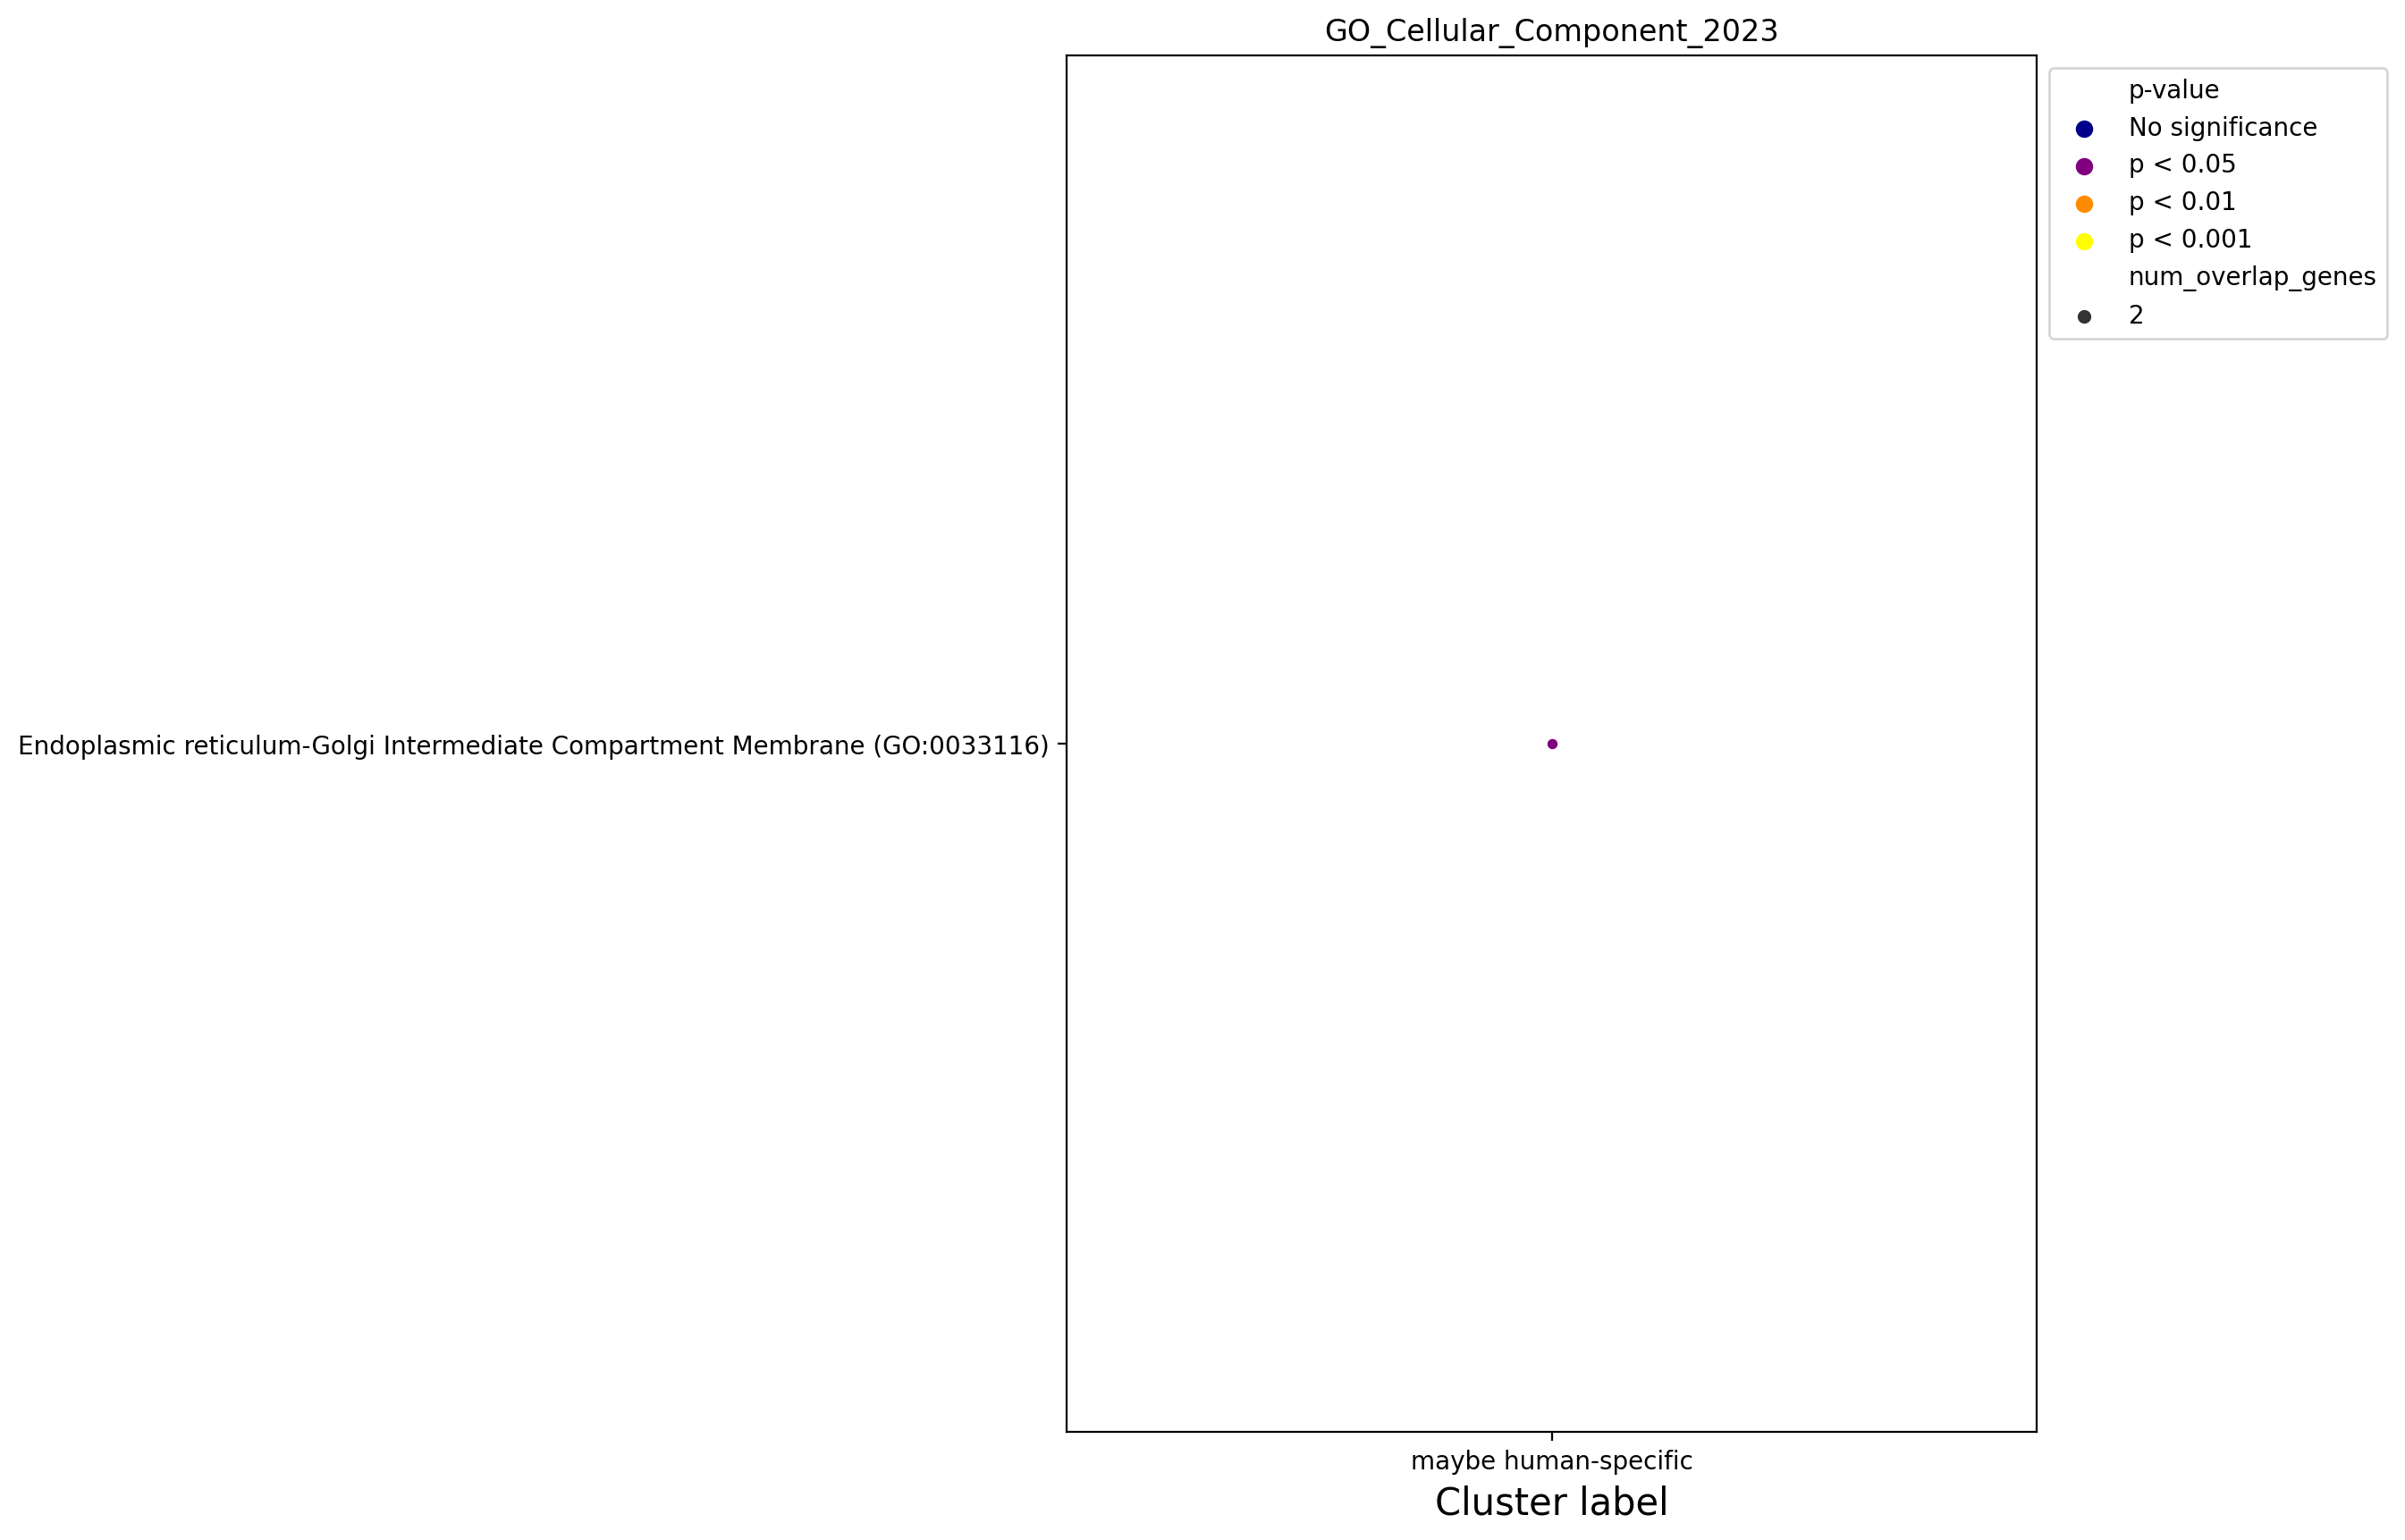

In [107]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 10), dpi=100)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## WikiPathway_2023_Human

In [108]:
db_name = 'WikiPathway_2023_Human'
GeneCluster.enrich_geneclusters(gene_clust,db_name )

In [109]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val  \
Term                                                                 
Disruption Of Postsynaptic Signaling By CNV WP4875     1  0.000070   
Fragile X Syndrome WP4549                              2  0.003280   
Common Pathways Underlying Drug Addiction WP2636       3  0.003919   
Lipid Particles Composition WP3601                     4  0.005897   
Familial Hyperlipidemia Type 2 WP5109                  5  0.008832   

                                                       Z-score  \
Term                                                             
Disruption Of Postsynaptic Signaling By CNV WP4875   46.452000   
Fragile X Syndrome WP4549                            11.500500   
Common Pathways Underlying Drug Addiction WP2636     24.561905   
Lipid Particles Composition WP3601                  353.000000   
Familial Hyperlipidemia Type 2 WP5109               176.477273   

                                                    Combined score  \
Term                                                                 
Disruption Of Postsynaptic Signaling By CNV WP4875      444.276143   
Fragile X Syndrome WP4549                                65.780942   
Common Pathways Underlying Drug Addiction WP2636        136.118202   
Lipid Particles Composition WP3601                     1812.083364   
Familial Hyperlipidemia Type 2 WP5109                   834.618621   

                                                            Overlapping genes  \
Term                                                                            
Disruption Of Postsynaptic Signaling By CNV WP4875    [SYNGAP1, NRXN1, NRXN2]   
Fragile X Syndrome WP4549                           [MAP1LC3B, SYNGAP1, GAD1]   
Common Pathways Underlying Drug Addiction WP2636              [PPP1CC, GNAI1]   
Lipid Particles Composition WP3601                                      [LPL]   
Familial Hyperlipidemia Type 2 WP5109                                   [LPL]   

                                                    Adjusted P-value  \
Term                                                                   
Disruption Of Postsynaptic Signaling By CNV WP4875          0.005826   
Fragile X Syndrome WP4549                                   0.099125   
Common Pathways Underlying Drug Addiction WP2636            0.099125   
Lipid Particles Composition WP3601                          0.099125   
Familial Hyperlipidemia Type 2 WP5109                       0.099125   

                                                    Old p-value  \
Term                                                              
Disruption Of Postsynaptic Signaling By CNV WP4875            0   
Fragile X Syndrome WP4549                                     0   
Common Pathways Underlying Drug Addiction WP2636              0   
Lipid Particles Composition WP3601                            0   
Familial Hyperlipidemia Type 2 WP5109                         0   

                                                    Old adjusted p-value  \
Term                                                                       
Disruption Of Postsynaptic Signaling By CNV WP4875                     0   
Fragile X Syndrome WP4549                                              0   
Common Pathways Underlying Drug Addiction WP2636                       0   
Lipid Particles Composition WP3601                                     0   
Familial Hyperlipidemia Type 2 WP5109                                  0   

                                                    num_overlap_genes  \
Term                                                                    
Disruption Of Postsynaptic Signaling By CNV WP4875                  3   
Fragile X Syndrome WP4549                                           3   
Common Pathways Underlying Drug Addiction WP2636                    2   
Lipid Particles Composition WP3601                                  1   
Familial Hyperlipidemia Type 2 WP5109                               1   

                   

In [110]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 20)].index.unique()
terms.size

14

In [111]:
enrich_res[enrich_res.cluster_label == 5]

Empty DataFrame
Columns: [Rank, p-val, Z-score, Combined score, Overlapping genes, Adjusted P-value, Old p-value, Old adjusted p-value, num_overlap_genes, neg_log10(p_adj), cluster_label]
Index: []

In [112]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

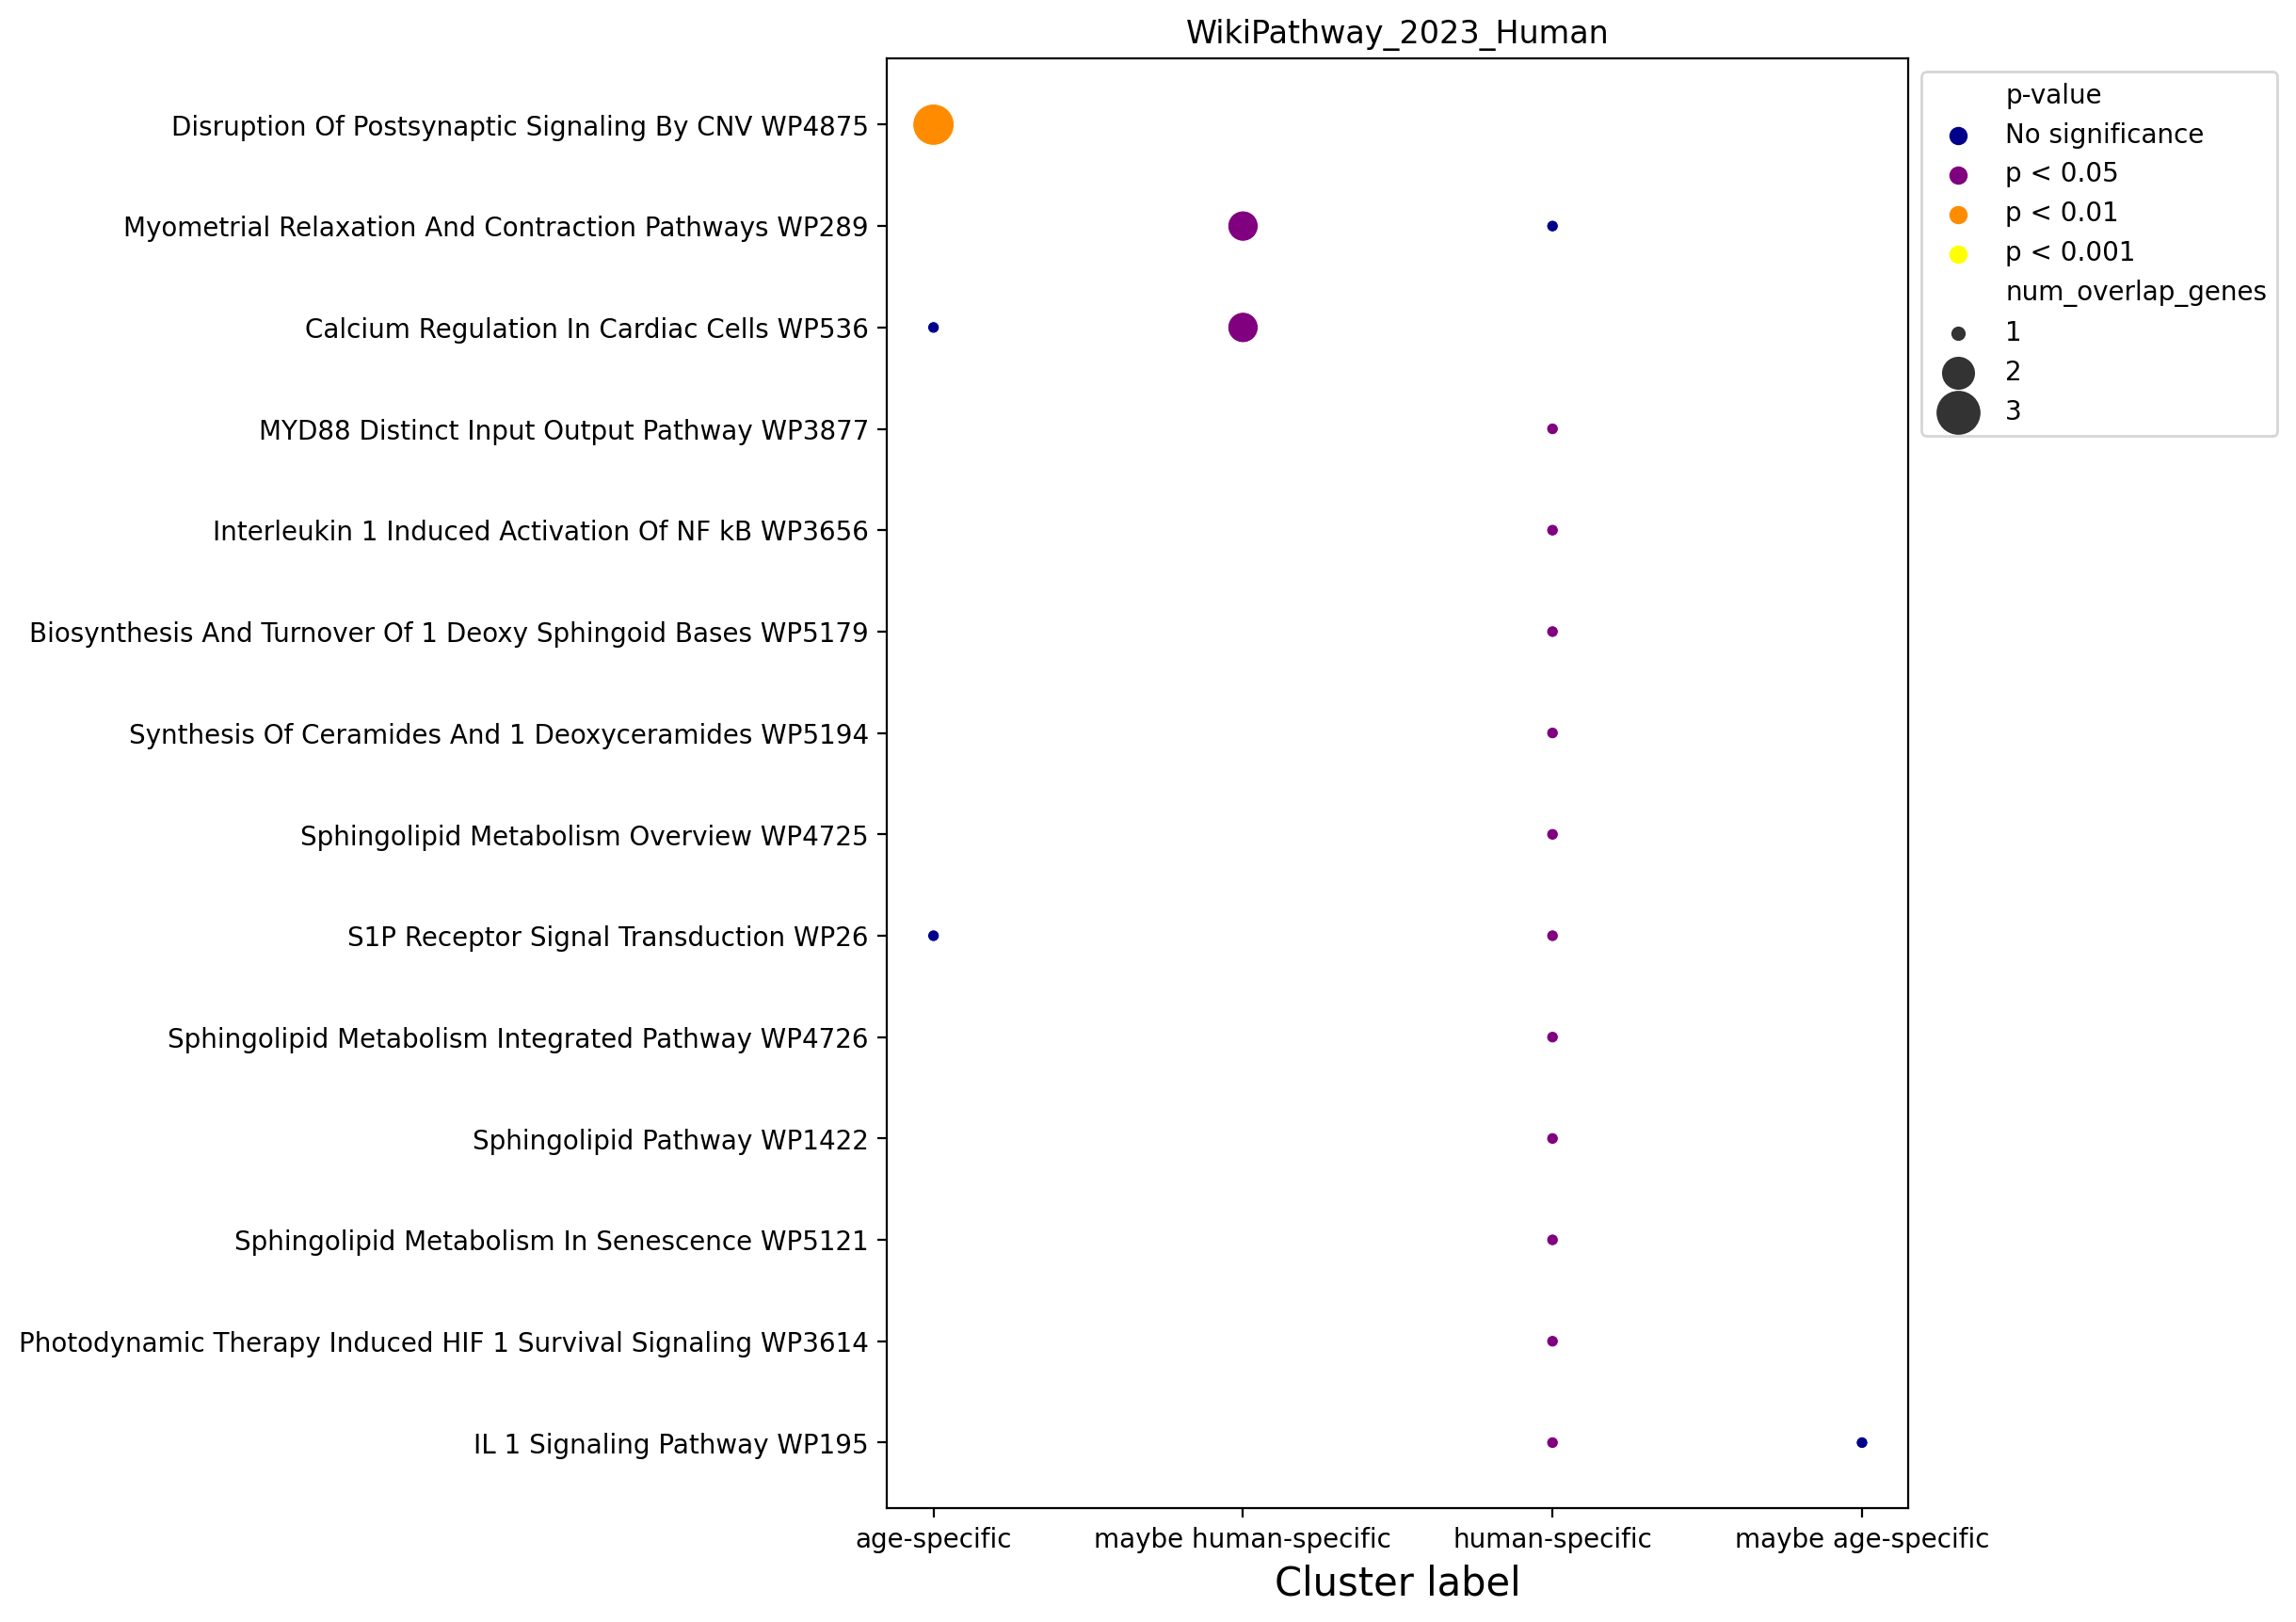

In [113]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 10), dpi=100)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Azimuth_2023


In [114]:
db_name = 'Azimuth_2023'
GeneCluster.enrich_geneclusters(gene_clust, db_name)

In [115]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val  Z-score  \
Term                                                             
Tonsil-L2-aDC2                            1  0.002952      inf   
Adipose-L1-Monocyte                       2  0.002952      inf   
Lung V2 (HLCA)-ann Level 4-Suprabasal     3  0.005897    353.0   
PBMC-L3-Double-negative T 1               4  0.005897    353.0   
PBMC-L2-CD8+ Central Memory T             5  0.005897    353.0   

                                       Combined score Overlapping genes  \
Term                                                                      
Tonsil-L2-aDC2                                    inf           [NRXN2]   
Adipose-L1-Monocyte                               inf           [COTL1]   
Lung V2 (HLCA)-ann Level 4-Suprabasal     1812.083364            [LDHB]   
PBMC-L3-Double-negative T 1               1812.083364            [LDHB]   
PBMC-L2-CD8+ Central Memory T             1812.083364            [LDHB]   

                                       Adjusted P-value  Old p-value  \
Term                                                                   
Tonsil-L2-aDC2                                  0.01986            0   
Adipose-L1-Monocyte                             0.01986            0   
Lung V2 (HLCA)-ann Level 4-Suprabasal           0.01986            0   
PBMC-L3-Double-negative T 1                     0.01986            0   
PBMC-L2-CD8+ Central Memory T                   0.01986            0   

                                       Old adjusted p-value  \
Term                                                          
Tonsil-L2-aDC2                                            0   
Adipose-L1-Monocyte                                       0   
Lung V2 (HLCA)-ann Level 4-Suprabasal                     0   
PBMC-L3-Double-negative T 1                               0   
PBMC-L2-CD8+ Central Memory T                             0   

                                       num_overlap_genes  neg_log10(p_adj)  \
Term                                                                         
Tonsil-L2-aDC2                                         1          1.702018   
Adipose-L1-Monocyte                                    1          1.702018   
Lung V2 (HLCA)-ann Level 4-Suprabasal                  1          1.702018   
PBMC-L3-Double-negative T 1                            1          1.702018   
PBMC-L2-CD8+ Central Memory T                          1          1.702018   

                                      cluster_label  
Term                                                 
Tonsil-L2-aDC2                         age-specific  
Adipose-L1-Monocyte                    age-specific  
Lung V2 (HLCA)-ann Level 4-Suprabasal  age-specific  
PBMC-L3-Double-negative T 1            age-specific  
PBMC-L2-CD8+ Central Memory T          age-specific

In [116]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 10)].index.unique()
terms.size

33

In [117]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

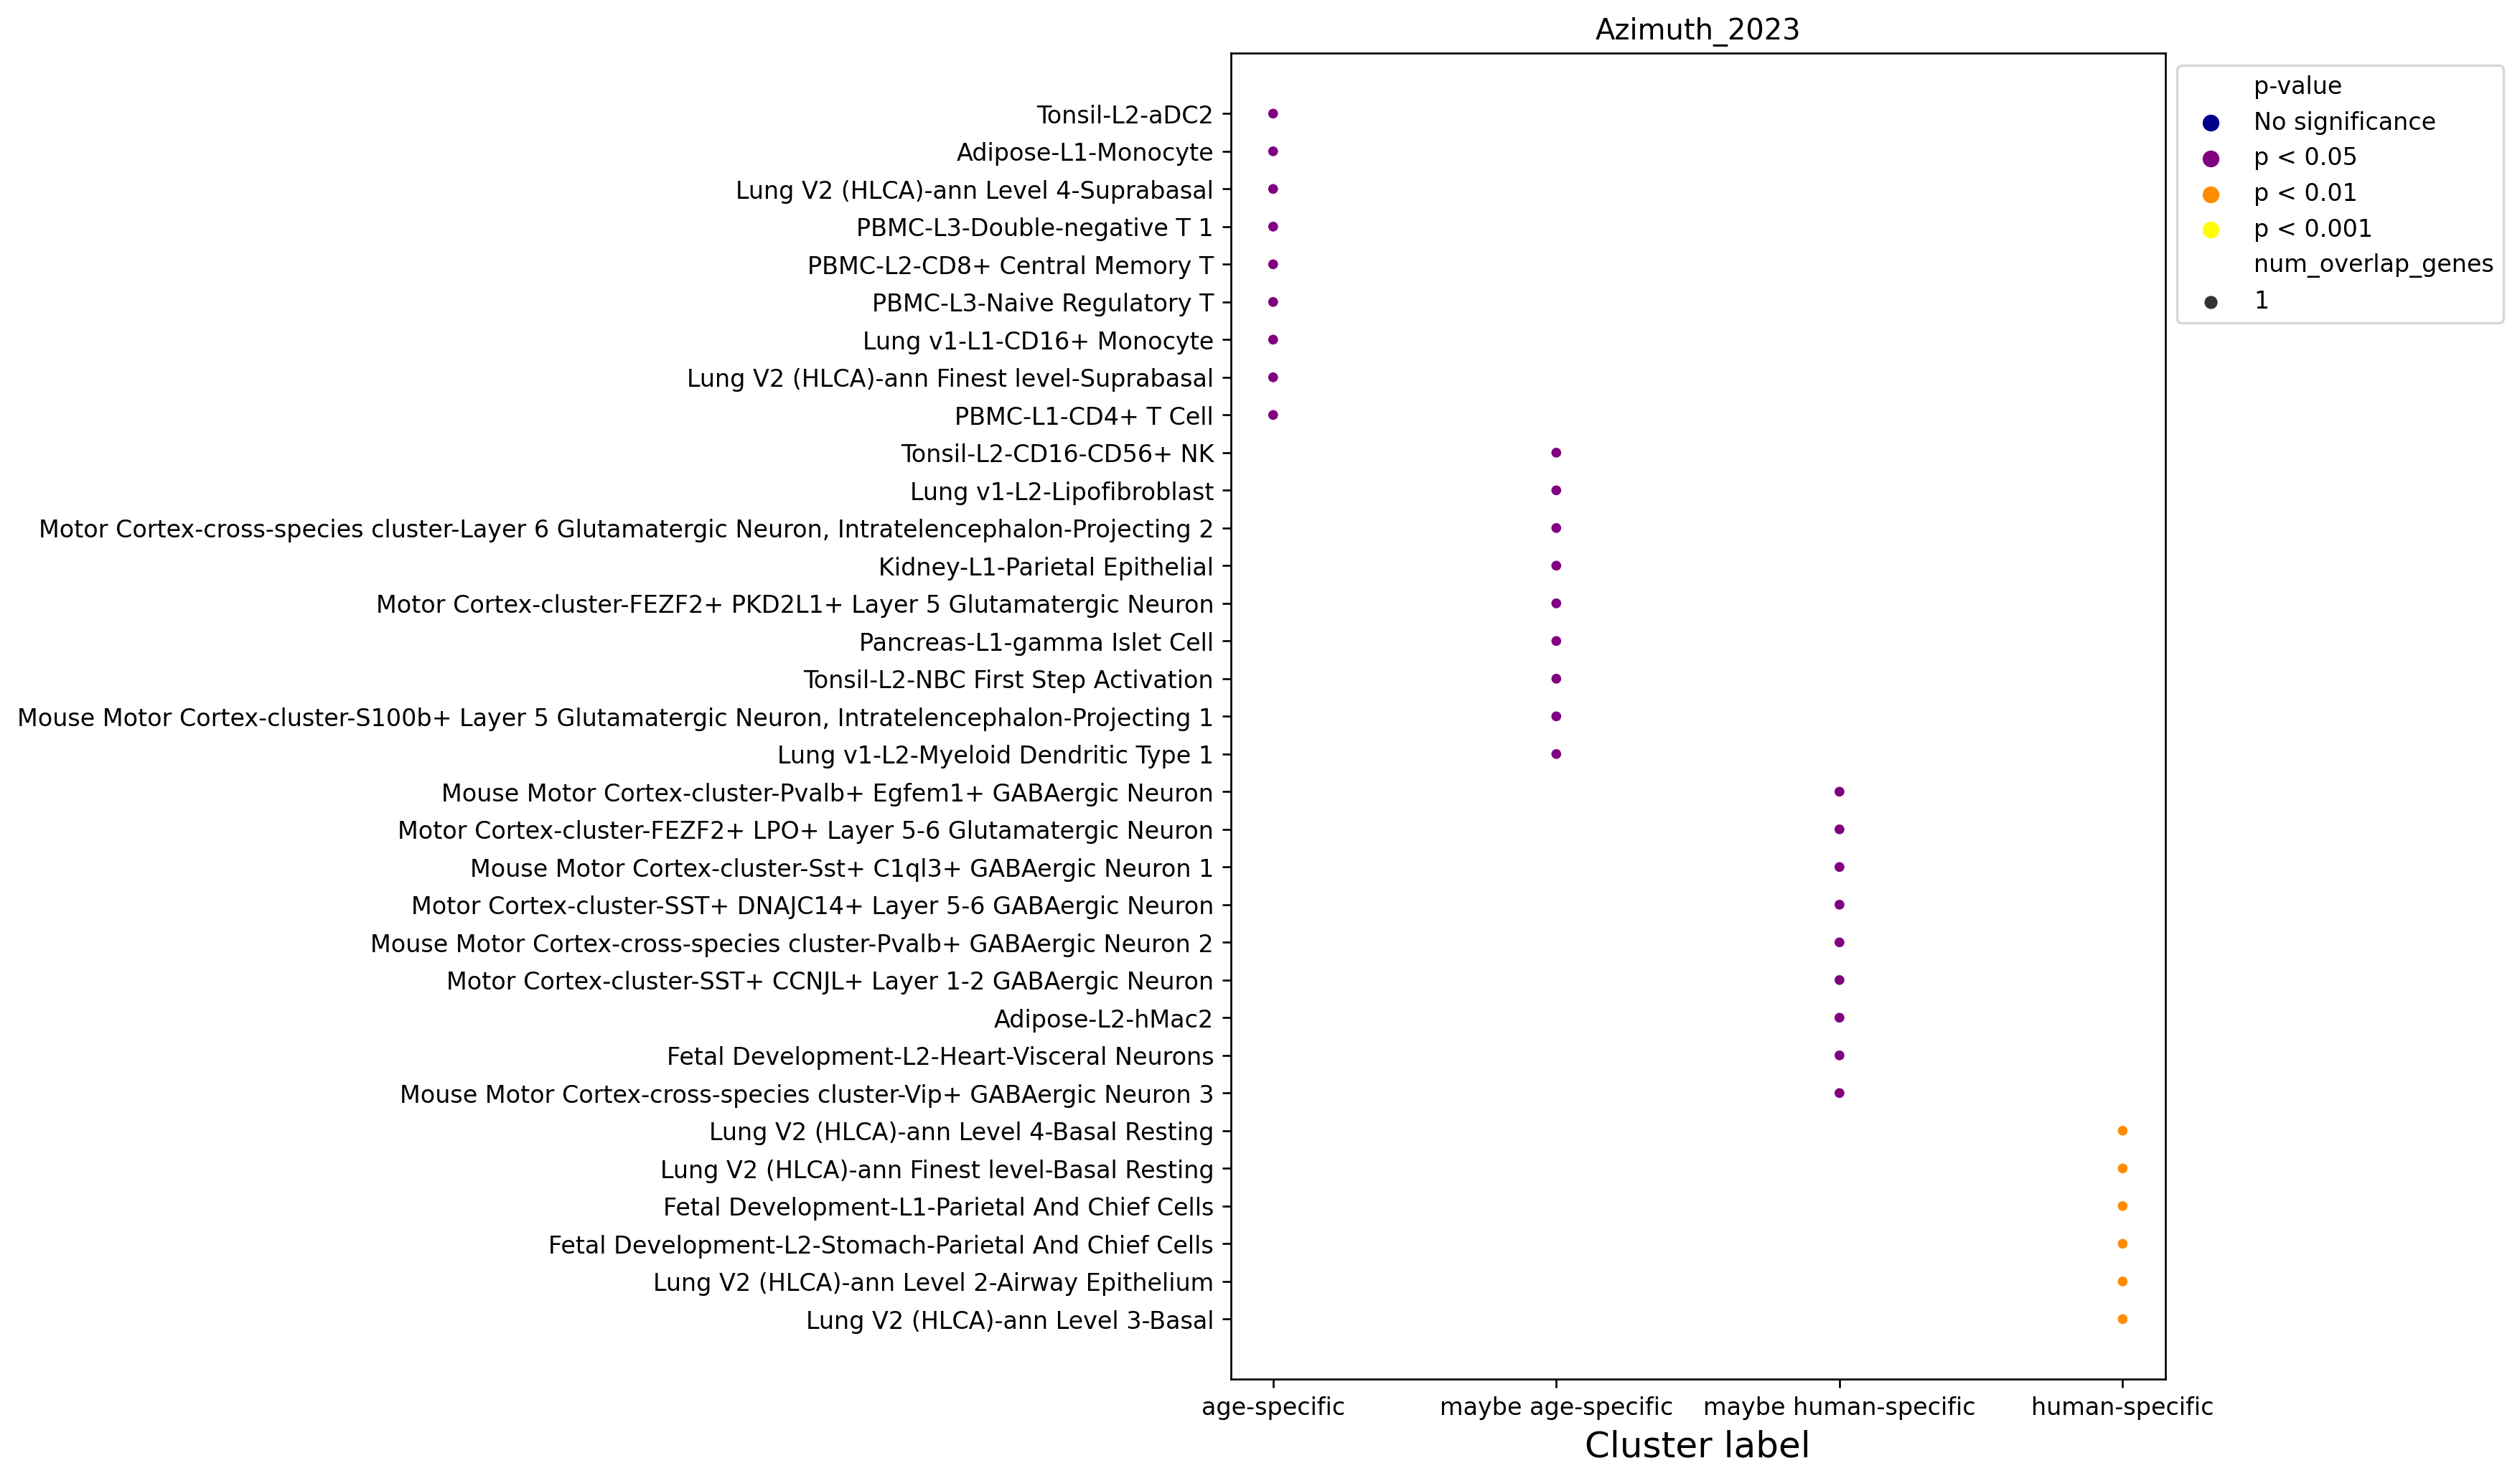

In [118]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 10), dpi=120)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Allen_Brain_Atlas_10x_scRNA_2021


In [119]:
db_name = 'Allen_Brain_Atlas_10x_scRNA_2021'
GeneCluster.enrich_geneclusters(gene_clust, db_name)

In [120]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val    Z-score  Combined score  \
Term                                                                         
Mouse 125 DG down                   1  0.000038   9.766892       99.421744   
Mouse 364 Oligo down                2  0.000506   6.264793       47.548709   
Mouse 116 Pvalb up                  3  0.001104  49.219048      335.125573   
Mouse 115 Pvalb up                  4  0.001858  36.890476      231.969887   
Human Inh L5-6 PVALB FAM150B up     5  0.002032  35.129252      217.762437   

                                                                 Overlapping genes  \
Term                                                                                 
Mouse 125 DG down                [GAD1, CLSTN1, NRXN2, CX3CL1, GNAI1, FBXO9, DL...   
Mouse 364 Oligo down             [NDUFB10, NRXN1, CLSTN1, CX3CL1, GNAI1, FBXO9,...   
Mouse 116 Pvalb up                                                  [LDHB, PPP1CC]   
Mouse 115 Pvalb up                                                  [LDHB, PPP1CC]   
Human Inh L5-6 PVALB FAM150B up                                    [LDHB, ST3GAL5]   

                                 Adjusted P-value  Old p-value  \
Term                                                             
Mouse 125 DG down                        0.005577            0   
Mouse 364 Oligo down                     0.037159            0   
Mouse 116 Pvalb up                       0.054094            0   
Mouse 115 Pvalb up                       0.059731            0   
Human Inh L5-6 PVALB FAM150B up          0.059731            0   

                                 Old adjusted p-value  num_overlap_genes  \
Term                                                                       
Mouse 125 DG down                                   0                  7   
Mouse 364 Oligo down                                0                  7   
Mouse 116 Pvalb up                                  0                  2   
Mouse 115 Pvalb up                                  0                  2   
Human Inh L5-6 PVALB FAM150B up                     0                  2   

                                 neg_log10(p_adj) cluster_label  
Term                                                             
Mouse 125 DG down                        2.253569  age-specific  
Mouse 364 Oligo down                     1.429934  age-specific  
Mouse 116 Pvalb up                       1.266854  age-specific  
Mouse 115 Pvalb up                       1.223797  age-specific  
Human Inh L5-6 PVALB FAM150B up          1.223797  age-specific

In [121]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 10)].index.unique()
terms.size

8

In [122]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

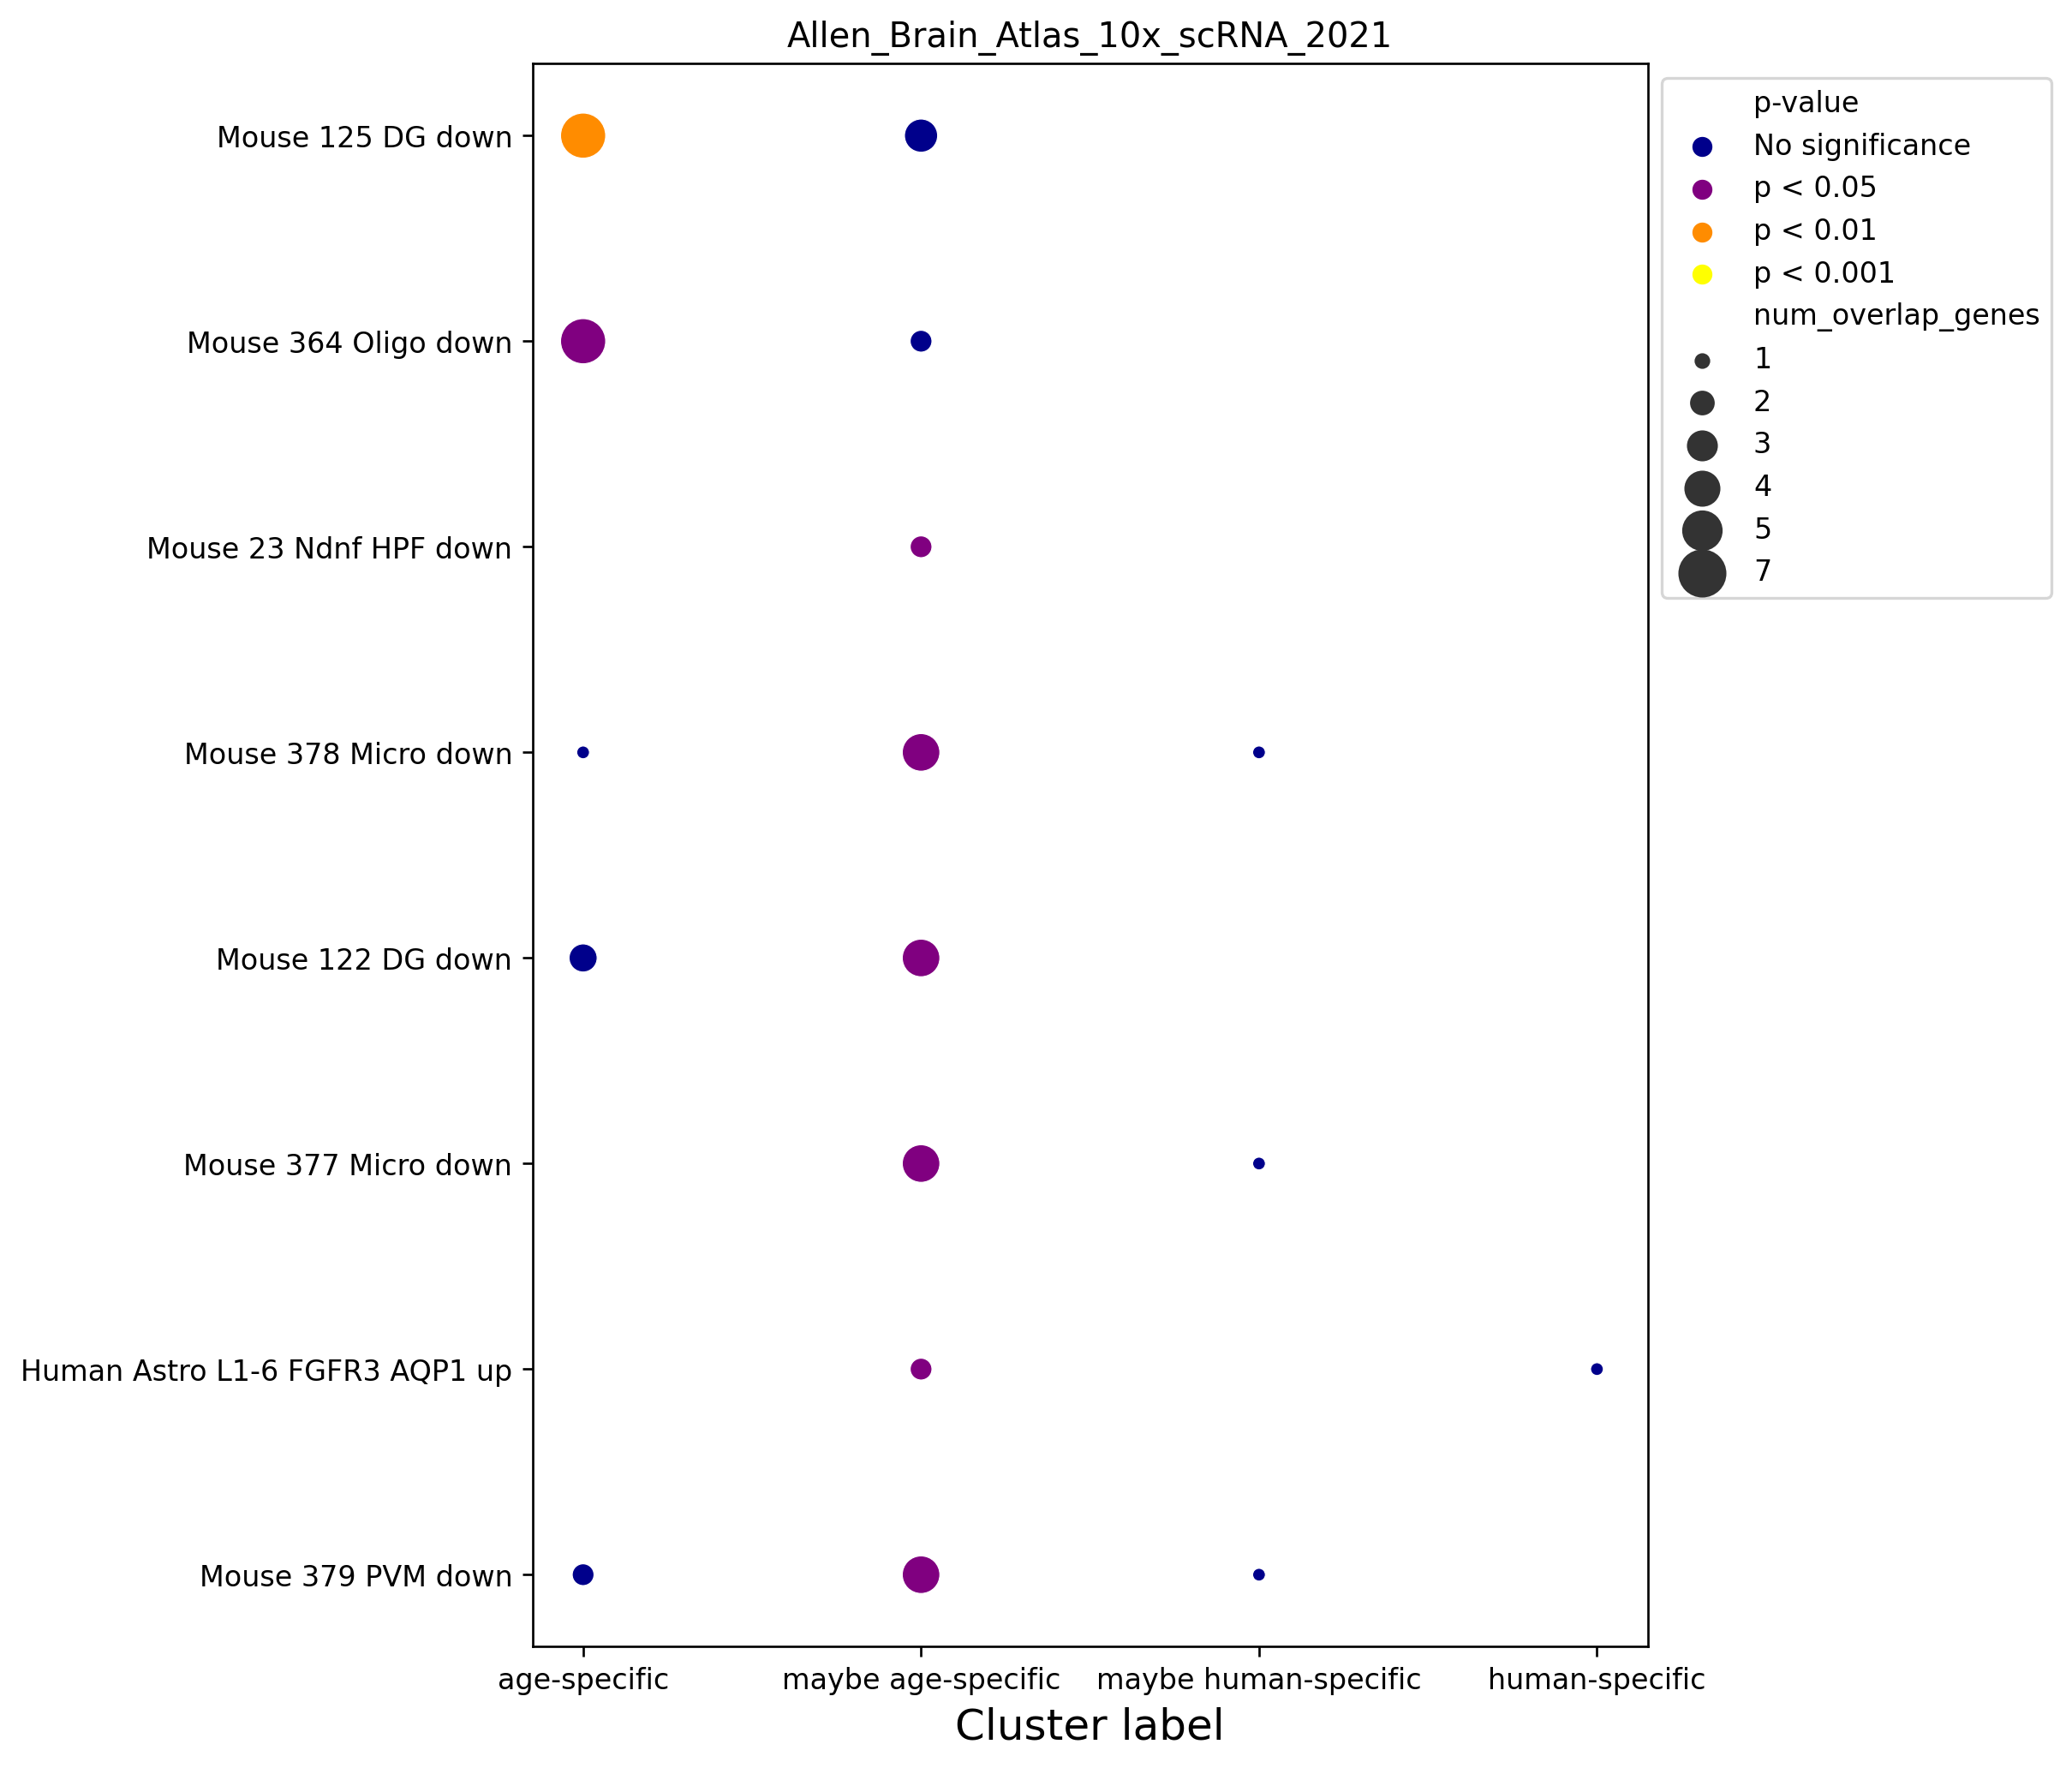

In [123]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 10), dpi=120)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Azimuth Cell Types 2021


In [124]:
db_name = 'Azimuth_Cell_Types_2021'
GeneCluster.enrich_geneclusters(gene_clust, db_name)

In [125]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val     Z-score  Combined score  \
Term                                                                         
Double-negative T 1 CL0000935      1  0.005897  353.000000     1812.083364   
CD8+ Central Memory T CL0000909    2  0.005897  353.000000     1812.083364   
Naive Regulatory T CL0000815       3  0.005897  353.000000     1812.083364   
CD4+ Central Memory T CL0000897    4  0.008832  176.477273      834.618621   
Nonclassical Monocyte CL0000875    5  0.008832  176.477273      834.618621   

                                Overlapping genes  Adjusted P-value  \
Term                                                                  
Double-negative T 1 CL0000935              [LDHB]          0.017665   
CD8+ Central Memory T CL0000909            [LDHB]          0.017665   
Naive Regulatory T CL0000815               [LDHB]          0.017665   
CD4+ Central Memory T CL0000897            [LDHB]          0.017665   
Nonclassical Monocyte CL0000875           [COTL1]          0.017665   

                                Old p-value Old adjusted p-value  \
Term                                                               
Double-negative T 1 CL0000935             0                    0   
CD8+ Central Memory T CL0000909           0                    0   
Naive Regulatory T CL0000815              0                    0   
CD4+ Central Memory T CL0000897           0                    0   
Nonclassical Monocyte CL0000875           0                    0   

                                num_overlap_genes  neg_log10(p_adj)  \
Term                                                                  
Double-negative T 1 CL0000935                   1           1.75289   
CD8+ Central Memory T CL0000909                 1           1.75289   
Naive Regulatory T CL0000815                    1           1.75289   
CD4+ Central Memory T CL0000897                 1           1.75289   
Nonclassical Monocyte CL0000875                 1           1.75289   

                                cluster_label  
Term                                           
Double-negative T 1 CL0000935    age-specific  
CD8+ Central Memory T CL0000909  age-specific  
Naive Regulatory T CL0000815     age-specific  
CD4+ Central Memory T CL0000897  age-specific  
Nonclassical Monocyte CL0000875  age-specific

In [126]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 10)].index.unique()
terms.size

26

In [127]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

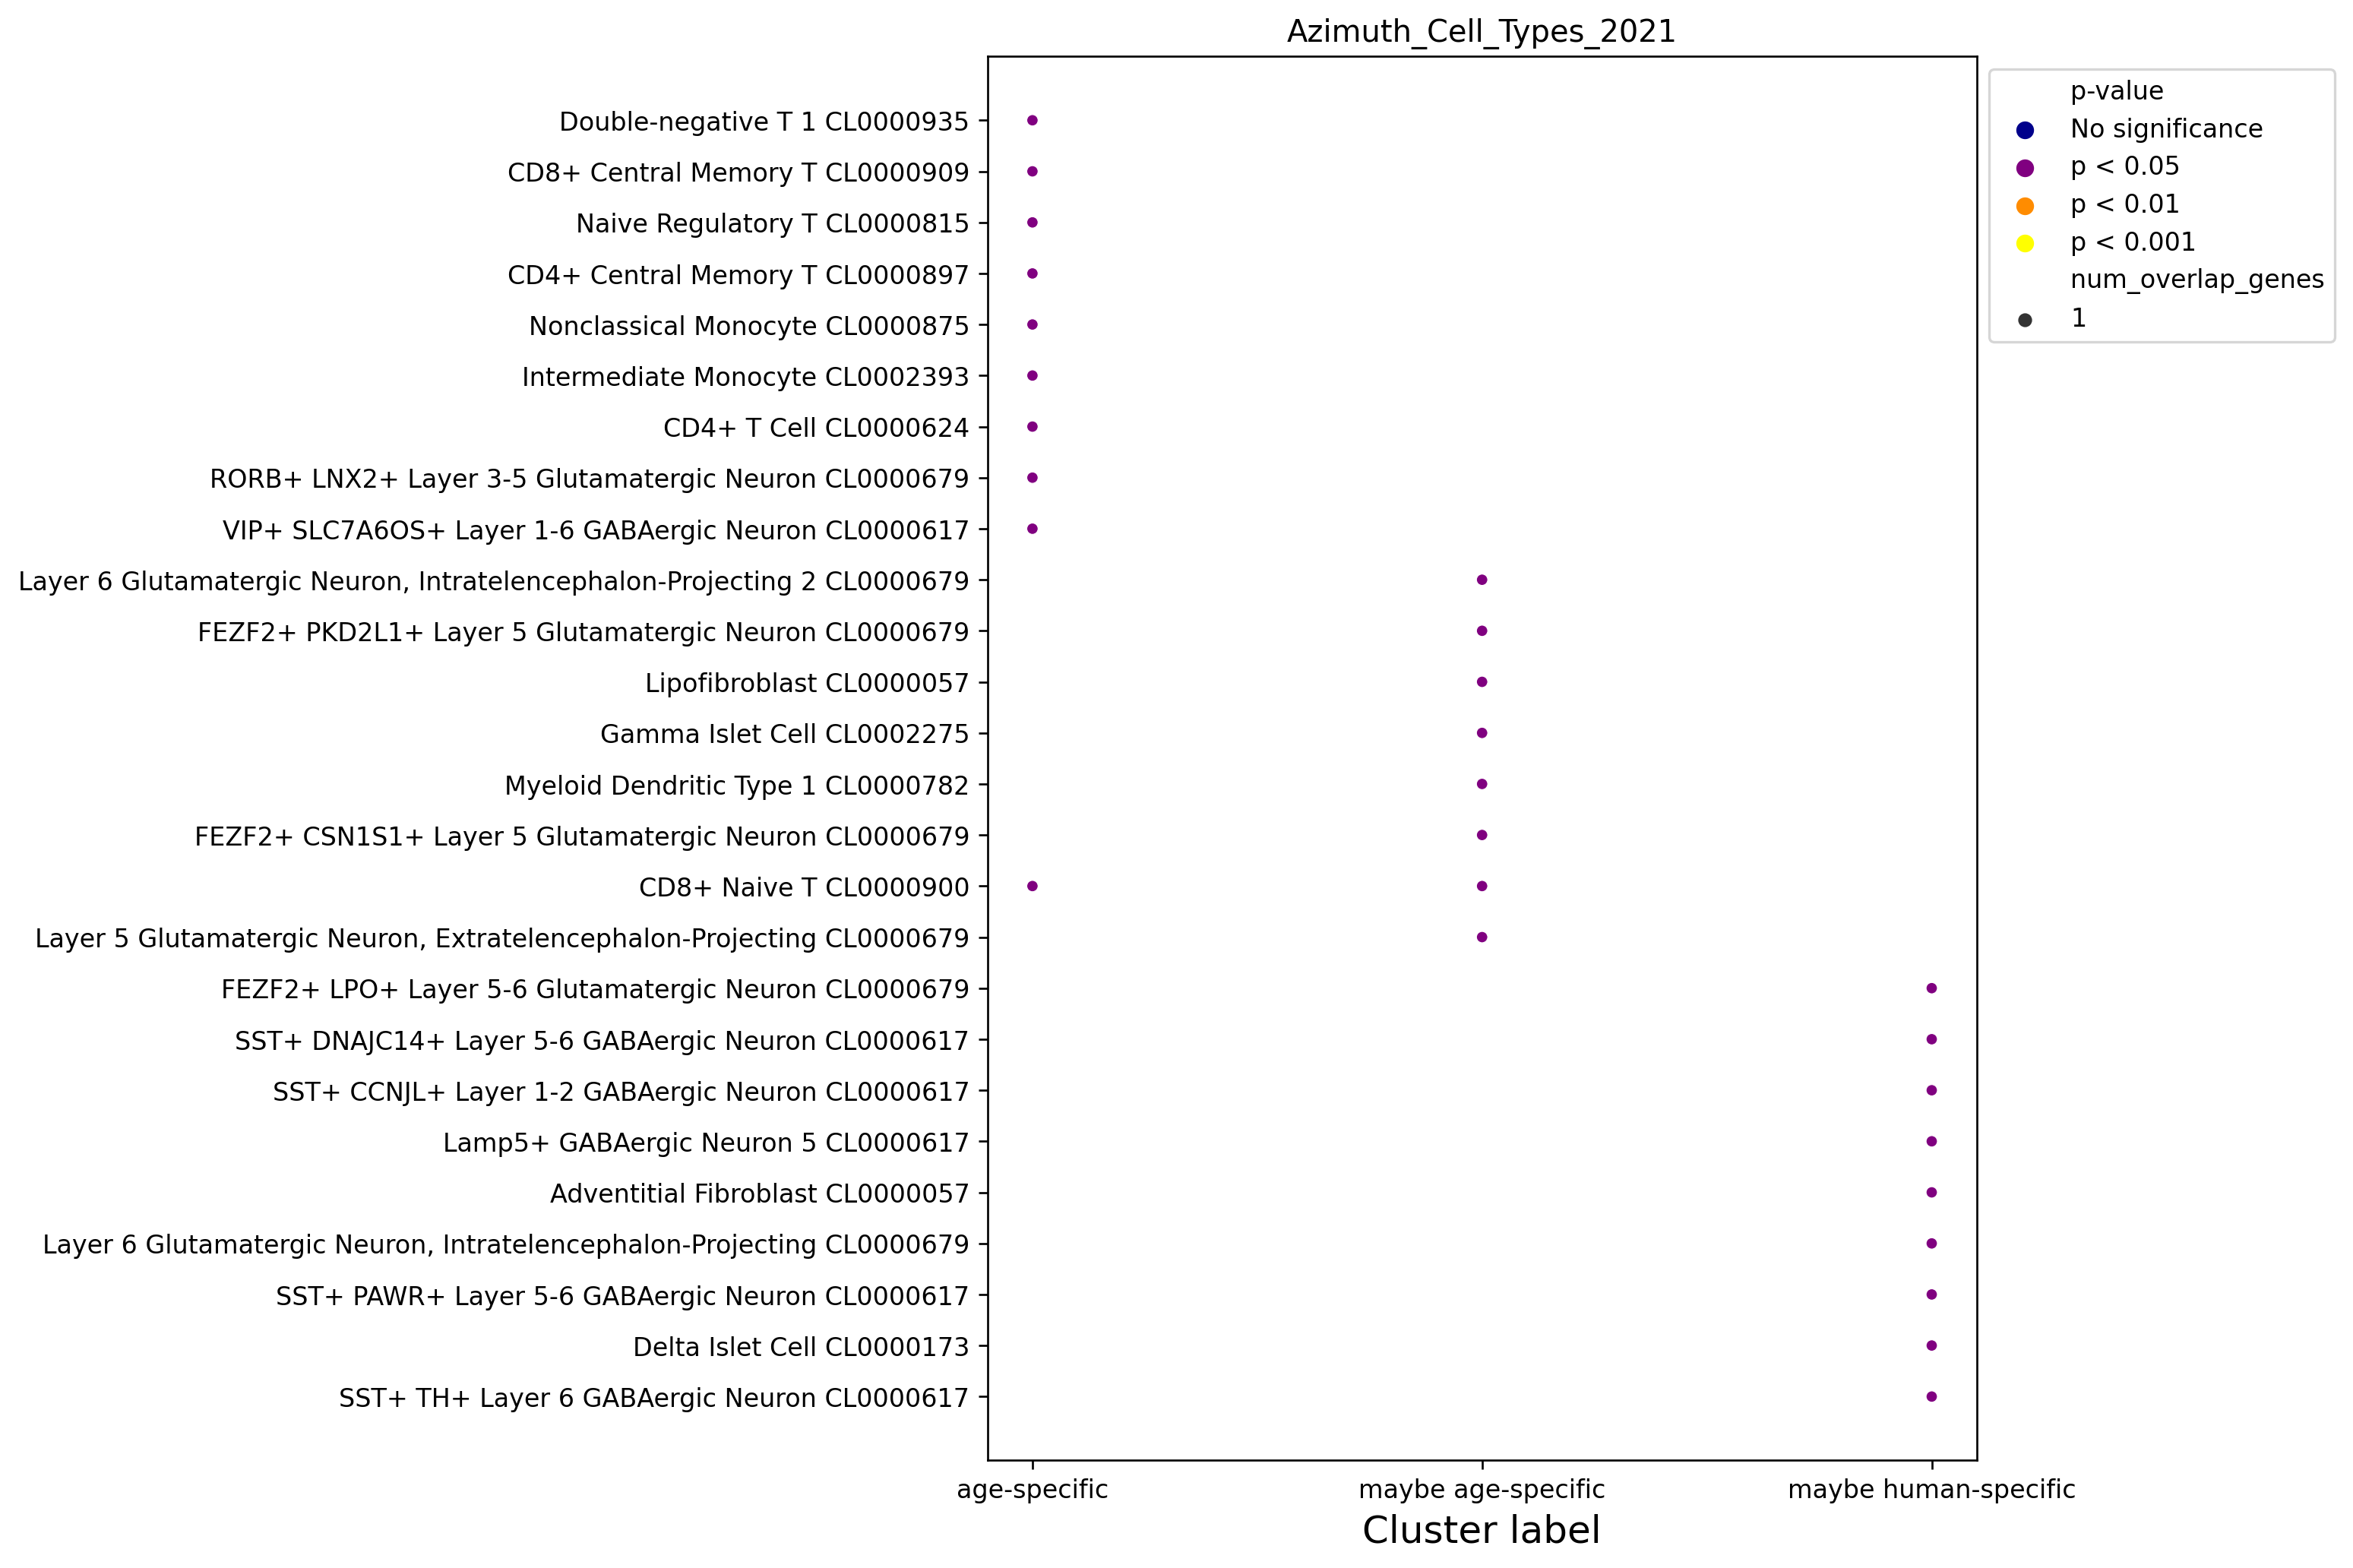

In [128]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 10), dpi=120)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## SynGO_2022

In [129]:
db_name = 'SynGO_2022'
GeneCluster.enrich_geneclusters(gene_clust, db_name)

In [130]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val     Z-score  \
Term                                                                            
Regulation Of Synaptic Vesicle Fusion To Presyn...    1  0.011760  117.636364   
Maintenance Of Postsynaptic Specialization Stru...    2  0.014679   88.215909   
Integral Component Of Presynaptic Membrane (GO:...    3  0.017351   10.945274   
Regulation Of Postsynaptic Specialization Assem...    4  0.017590   70.563636   
Regulation Of Calcium-Dependent Activation Of S...    5  0.020493   58.795455   

                                                    Combined score  \
Term                                                                 
Regulation Of Synaptic Vesicle Fusion To Presyn...      522.664863   
Maintenance Of Postsynaptic Specialization Stru...      372.387796   
Integral Component Of Presynaptic Membrane (GO:...       44.373145   
Regulation Of Postsynaptic Specialization Assem...      285.106111   
Regulation Of Calcium-Dependent Activation Of S...      228.577357   

                                                   Overlapping genes  \
Term                                                                   
Regulation Of Synaptic Vesicle Fusion To Presyn...            [ERC1]   
Maintenance Of Postsynaptic Specialization Stru...         [SYNGAP1]   
Integral Component Of Presynaptic Membrane (GO:...   [NRXN1, ATP1A3]   
Regulation Of Postsynaptic Specialization Assem...           [NRXN1]   
Regulation Of Calcium-Dependent Activation Of S...            [ERC1]   

                                                    Adjusted P-value  \
Term                                                                   
Regulation Of Synaptic Vesicle Fusion To Presyn...          0.060734   
Maintenance Of Postsynaptic Specialization Stru...          0.060734   
Integral Component Of Presynaptic Membrane (GO:...          0.060734   
Regulation Of Postsynaptic Specialization Assem...          0.060734   
Regulation Of Calcium-Dependent Activation Of S...          0.060734   

                                                   Old p-value  \
Term                                                             
Regulation Of Synaptic Vesicle Fusion To Presyn...           0   
Maintenance Of Postsynaptic Specialization Stru...           0   
Integral Component Of Presynaptic Membrane (GO:...           0   
Regulation Of Postsynaptic Specialization Assem...           0   
Regulation Of Calcium-Dependent Activation Of S...           0   

                                                   Old adjusted p-value  \
Term                                                                      
Regulation Of Synaptic Vesicle Fusion To Presyn...                    0   
Maintenance Of Postsynaptic Specialization Stru...                    0   
Integral Component Of Presynaptic Membrane (GO:...                    0   
Regulation Of Postsynaptic Specialization Assem...                    0   
Regulation Of Calcium-Dependent Activation Of S...                    0   

                                                   num_overlap_genes  \
Term                                                                   
Regulation Of Synaptic Vesicle Fusion To Presyn...                 1   
Maintenance Of Postsynaptic Specialization Stru...                 1   
Integral Component Of Presynaptic Membrane (GO:...                 2   
Regulation Of Postsynaptic Specialization Assem...                 1   
Regulation Of Calcium-Dependent Activation Of S...                 1   

                                                    neg_log10(p_adj)  \
Term                                                                   
Regulation Of Synaptic Vesicle Fusion To Presyn...          1.216569   
Maintenance Of Postsynaptic Specialization Stru...          1.216569   
Integral Component Of Presynaptic Membrane (GO:...          1.216569   
Regulation Of Postsynaptic Specialization Assem...          1.216569   
Regulation Of Calcium-Dependent Activation Of S...      

In [131]:
enrich_res[enrich_res['Adjusted P-value'] < 0.05].head()

Empty DataFrame
Columns: [Rank, p-val, Z-score, Combined score, Overlapping genes, Adjusted P-value, Old p-value, Old adjusted p-value, num_overlap_genes, neg_log10(p_adj), cluster_label]
Index: []

In [132]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05)].index.unique()
terms.size

0

In [133]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

C:\Users\aleks\AppData\Local\Temp\ipykernel_660\320292492.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


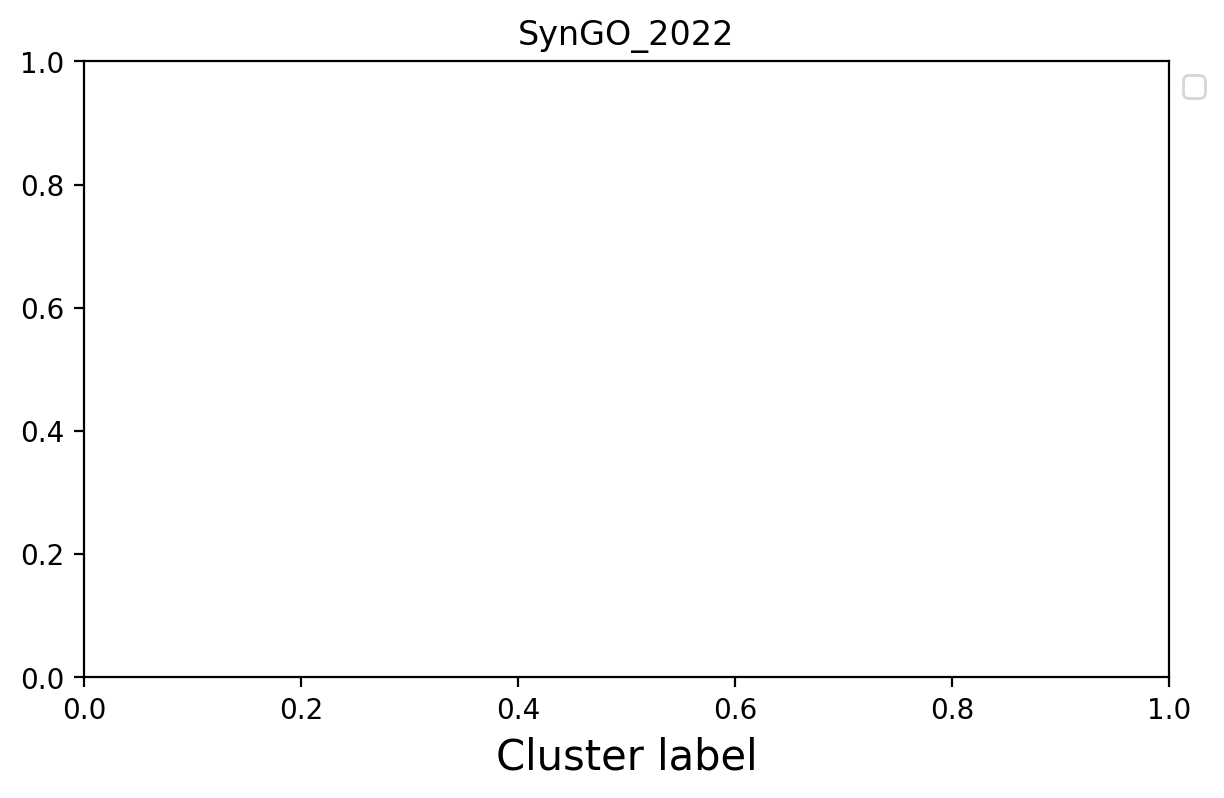

In [134]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 4), dpi=100)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## MGI_Mammalian_Phenotype_Level_4_2021

In [135]:
db_name = 'MGI_Mammalian_Phenotype_Level_4_2021'
GeneCluster.enrich_geneclusters(gene_clust, db_name)

In [136]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val  \
Term                                                                 
abnormal habituation to a new environment MP:00...     1  0.000296   
abnormal excitatory postsynaptic currents MP:00...     2  0.000833   
decreased circulating HDL cholesterol level MP:...     3  0.001710   
abnormal long term object recognition memory MP...     4  0.002400   
abnormal dendritic cell physiology MP:0002376          5  0.002596   

                                                       Z-score  \
Term                                                             
abnormal habituation to a new environment MP:00...  105.578231   
abnormal excitatory postsynaptic currents MP:00...   18.949180   
decreased circulating HDL cholesterol level MP:...   14.597468   
abnormal long term object recognition memory MP...   32.066253   
abnormal dendritic cell physiology MP:0002376        30.726190   

                                                    Combined score  \
Term                                                                 
abnormal habituation to a new environment MP:00...      857.678491   
abnormal excitatory postsynaptic currents MP:00...      134.359066   
decreased circulating HDL cholesterol level MP:...       93.001683   
abnormal long term object recognition memory MP...      193.426408   
abnormal dendritic cell physiology MP:0002376           182.938735   

                                                          Overlapping genes  \
Term                                                                          
abnormal habituation to a new environment MP:00...         [ATP1A3, DLGAP4]   
abnormal excitatory postsynaptic currents MP:00...  [NRXN1, CLSTN1, DLGAP4]   
decreased circulating HDL cholesterol level MP:...       [LDHB, NRXN1, LPL]   
abnormal long term object recognition memory MP...          [ATP1A3, GNAI1]   
abnormal dendritic cell physiology MP:0002376              [ZBTB46, CX3CL1]   

                                                    Adjusted P-value  \
Term                                                                   
abnormal habituation to a new environment MP:00...          0.060476   
abnormal excitatory postsynaptic currents MP:00...          0.084964   
decreased circulating HDL cholesterol level MP:...          0.093425   
abnormal long term object recognition memory MP...          0.093425   
abnormal dendritic cell physiology MP:0002376               0.093425   

                                                    Old p-value  \
Term                                                              
abnormal habituation to a new environment MP:00...            0   
abnormal excitatory postsynaptic currents MP:00...            0   
decreased circulating HDL cholesterol level MP:...            0   
abnormal long term object recognition memory MP...            0   
abnormal dendritic cell physiology MP:0002376                 0   

                                                    Old adjusted p-value  \
Term                                                                       
abnormal habituation to a new environment MP:00...                     0   
abnormal excitatory postsynaptic currents MP:00...                     0   
decreased circulating HDL cholesterol level MP:...                     0   
abnormal long term object recognition memory MP...                     0   
abnormal dendritic cell physiology MP:0002376                          0   

                                                    num_overlap_genes  \
Term                                                                    
abnormal habituation to a new environment MP:00...                  2   
abnormal excitatory postsynaptic currents MP:00...                  3   
decreased circulating HDL cholesterol level MP:...                  3   
abnormal long term object recognition memory MP...                  2   
abnormal dendritic cell physiology MP:0002376                       2   

                                 

In [137]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 10)].index.unique()
terms.size

9

In [138]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

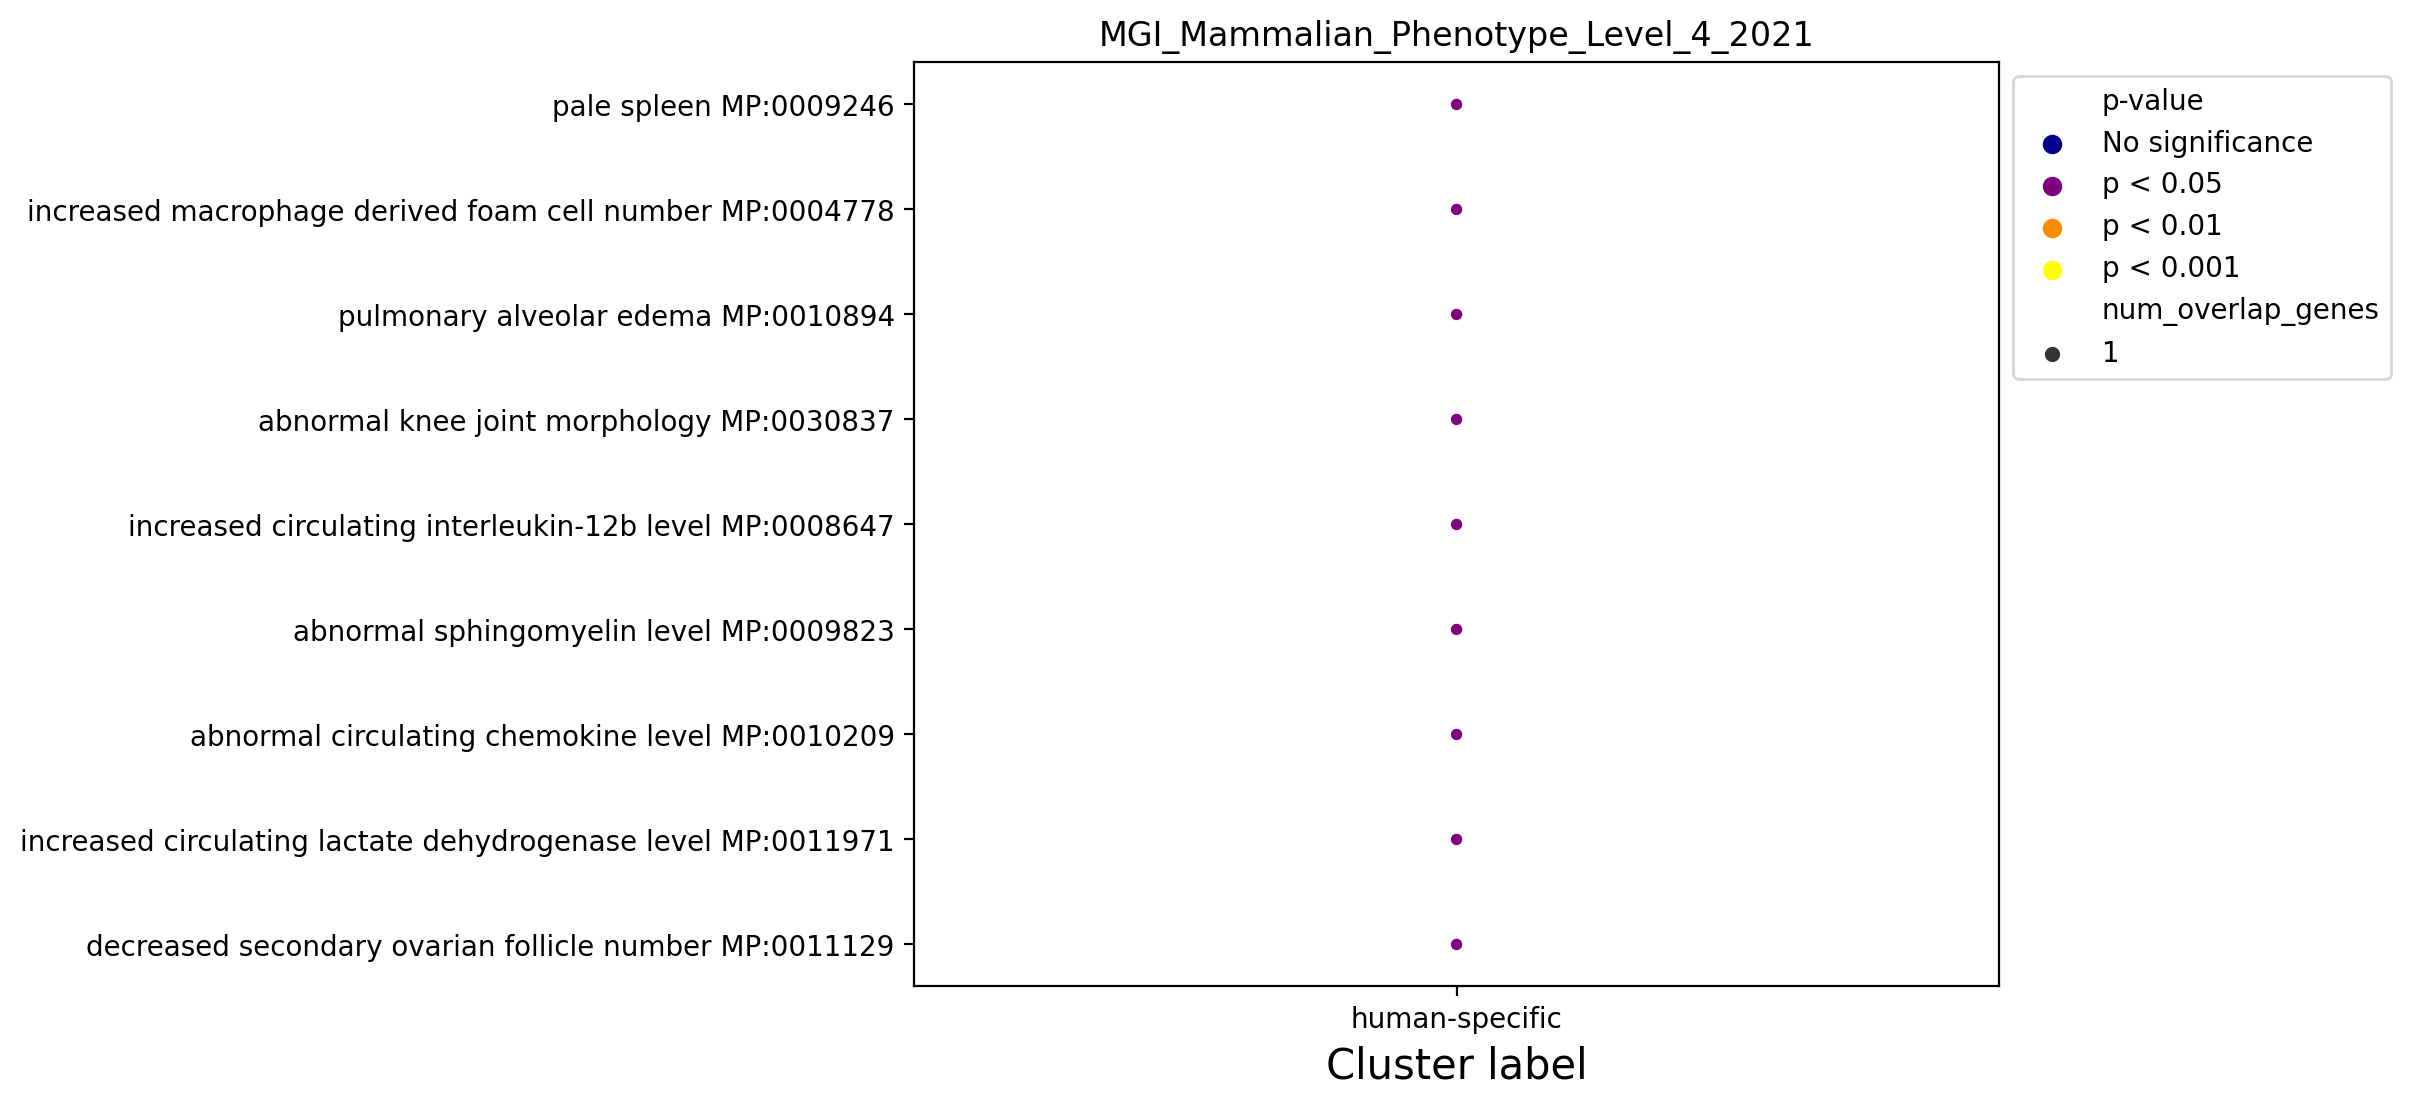

In [139]:
fig = plt.figure(figsize=(7, 6), dpi=100)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Reactome_2022

In [140]:
db_name = 'Reactome_2022'
GeneCluster.enrich_geneclusters(gene_clust, db_name)

In [141]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val  \
Term                                                                 
Neurexins And Neuroligins R-HSA-6794361                1  0.000275   
Neuronal System R-HSA-112316                           2  0.000526   
Protein-protein Interactions At Synapses R-HSA-...     3  0.000911   
Citric Acid (TCA) Cycle And Respiratory Electro...     4  0.004260   
Chylomicron Remodeling R-HSA-8963901                   5  0.005897   

                                                       Z-score  \
Term                                                             
Neurexins And Neuroligins R-HSA-6794361              28.265854   
Neuronal System R-HSA-112316                          9.062049   
Protein-protein Interactions At Synapses R-HSA-...   18.342857   
Citric Acid (TCA) Cycle And Respiratory Electro...   10.441364   
Chylomicron Remodeling R-HSA-8963901                353.000000   

                                                    Combined score  \
Term                                                                 
Neurexins And Neuroligins R-HSA-6794361                 231.725962   
Neuronal System R-HSA-112316                             68.415622   
Protein-protein Interactions At Synapses R-HSA-...      128.410470   
Citric Acid (TCA) Cycle And Respiratory Electro...       56.993721   
Chylomicron Remodeling R-HSA-8963901                   1812.083364   

                                                                      Overlapping genes  \
Term                                                                                      
Neurexins And Neuroligins R-HSA-6794361                          [NRXN1, NRXN2, DLGAP4]   
Neuronal System R-HSA-112316                        [NRXN1, GAD1, NRXN2, GNAI1, DLGAP4]   
Protein-protein Interactions At Synapses R-HSA-...               [NRXN1, NRXN2, DLGAP4]   
Citric Acid (TCA) Cycle And Respiratory Electro...                [LDHB, NDUFB10, ETFB]   
Chylomicron Remodeling R-HSA-8963901                                              [LPL]   

                                                    Adjusted P-value  \
Term                                                                   
Neurexins And Neuroligins R-HSA-6794361                     0.044470   
Neuronal System R-HSA-112316                                0.044470   
Protein-protein Interactions At Synapses R-HSA-...          0.051340   
Citric Acid (TCA) Cycle And Respiratory Electro...          0.179990   
Chylomicron Remodeling R-HSA-8963901                        0.199305   

                                                    Old p-value  \
Term                                                              
Neurexins And Neuroligins R-HSA-6794361                       0   
Neuronal System R-HSA-112316                                  0   
Protein-protein Interactions At Synapses R-HSA-...            0   
Citric Acid (TCA) Cycle And Respiratory Electro...            0   
Chylomicron Remodeling R-HSA-8963901                          0   

                                                    Old adjusted p-value  \
Term                                                                       
Neurexins And Neuroligins R-HSA-6794361                                0   
Neuronal System R-HSA-112316                                           0   
Protein-protein Interactions At Synapses R-HSA-...                     0   
Citric Acid (TCA) Cycle And Respiratory Electro...                     0   
Chylomicron Remodeling R-HSA-8963901                                   0   

                                                    num_overlap_genes  \
Term                                                                    
Neurexins And Neuroligins R-HSA-6794361                             3   
Neuronal System R-HSA-112316                                        5   
Protein-protein Interactions At Synapses R-HSA-...                  3   
Citric Acid (TCA) Cycle And Respiratory Electro...                  3   
Chylomicron Remodeling 

In [142]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05)].index.unique()
terms.size

2

In [143]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

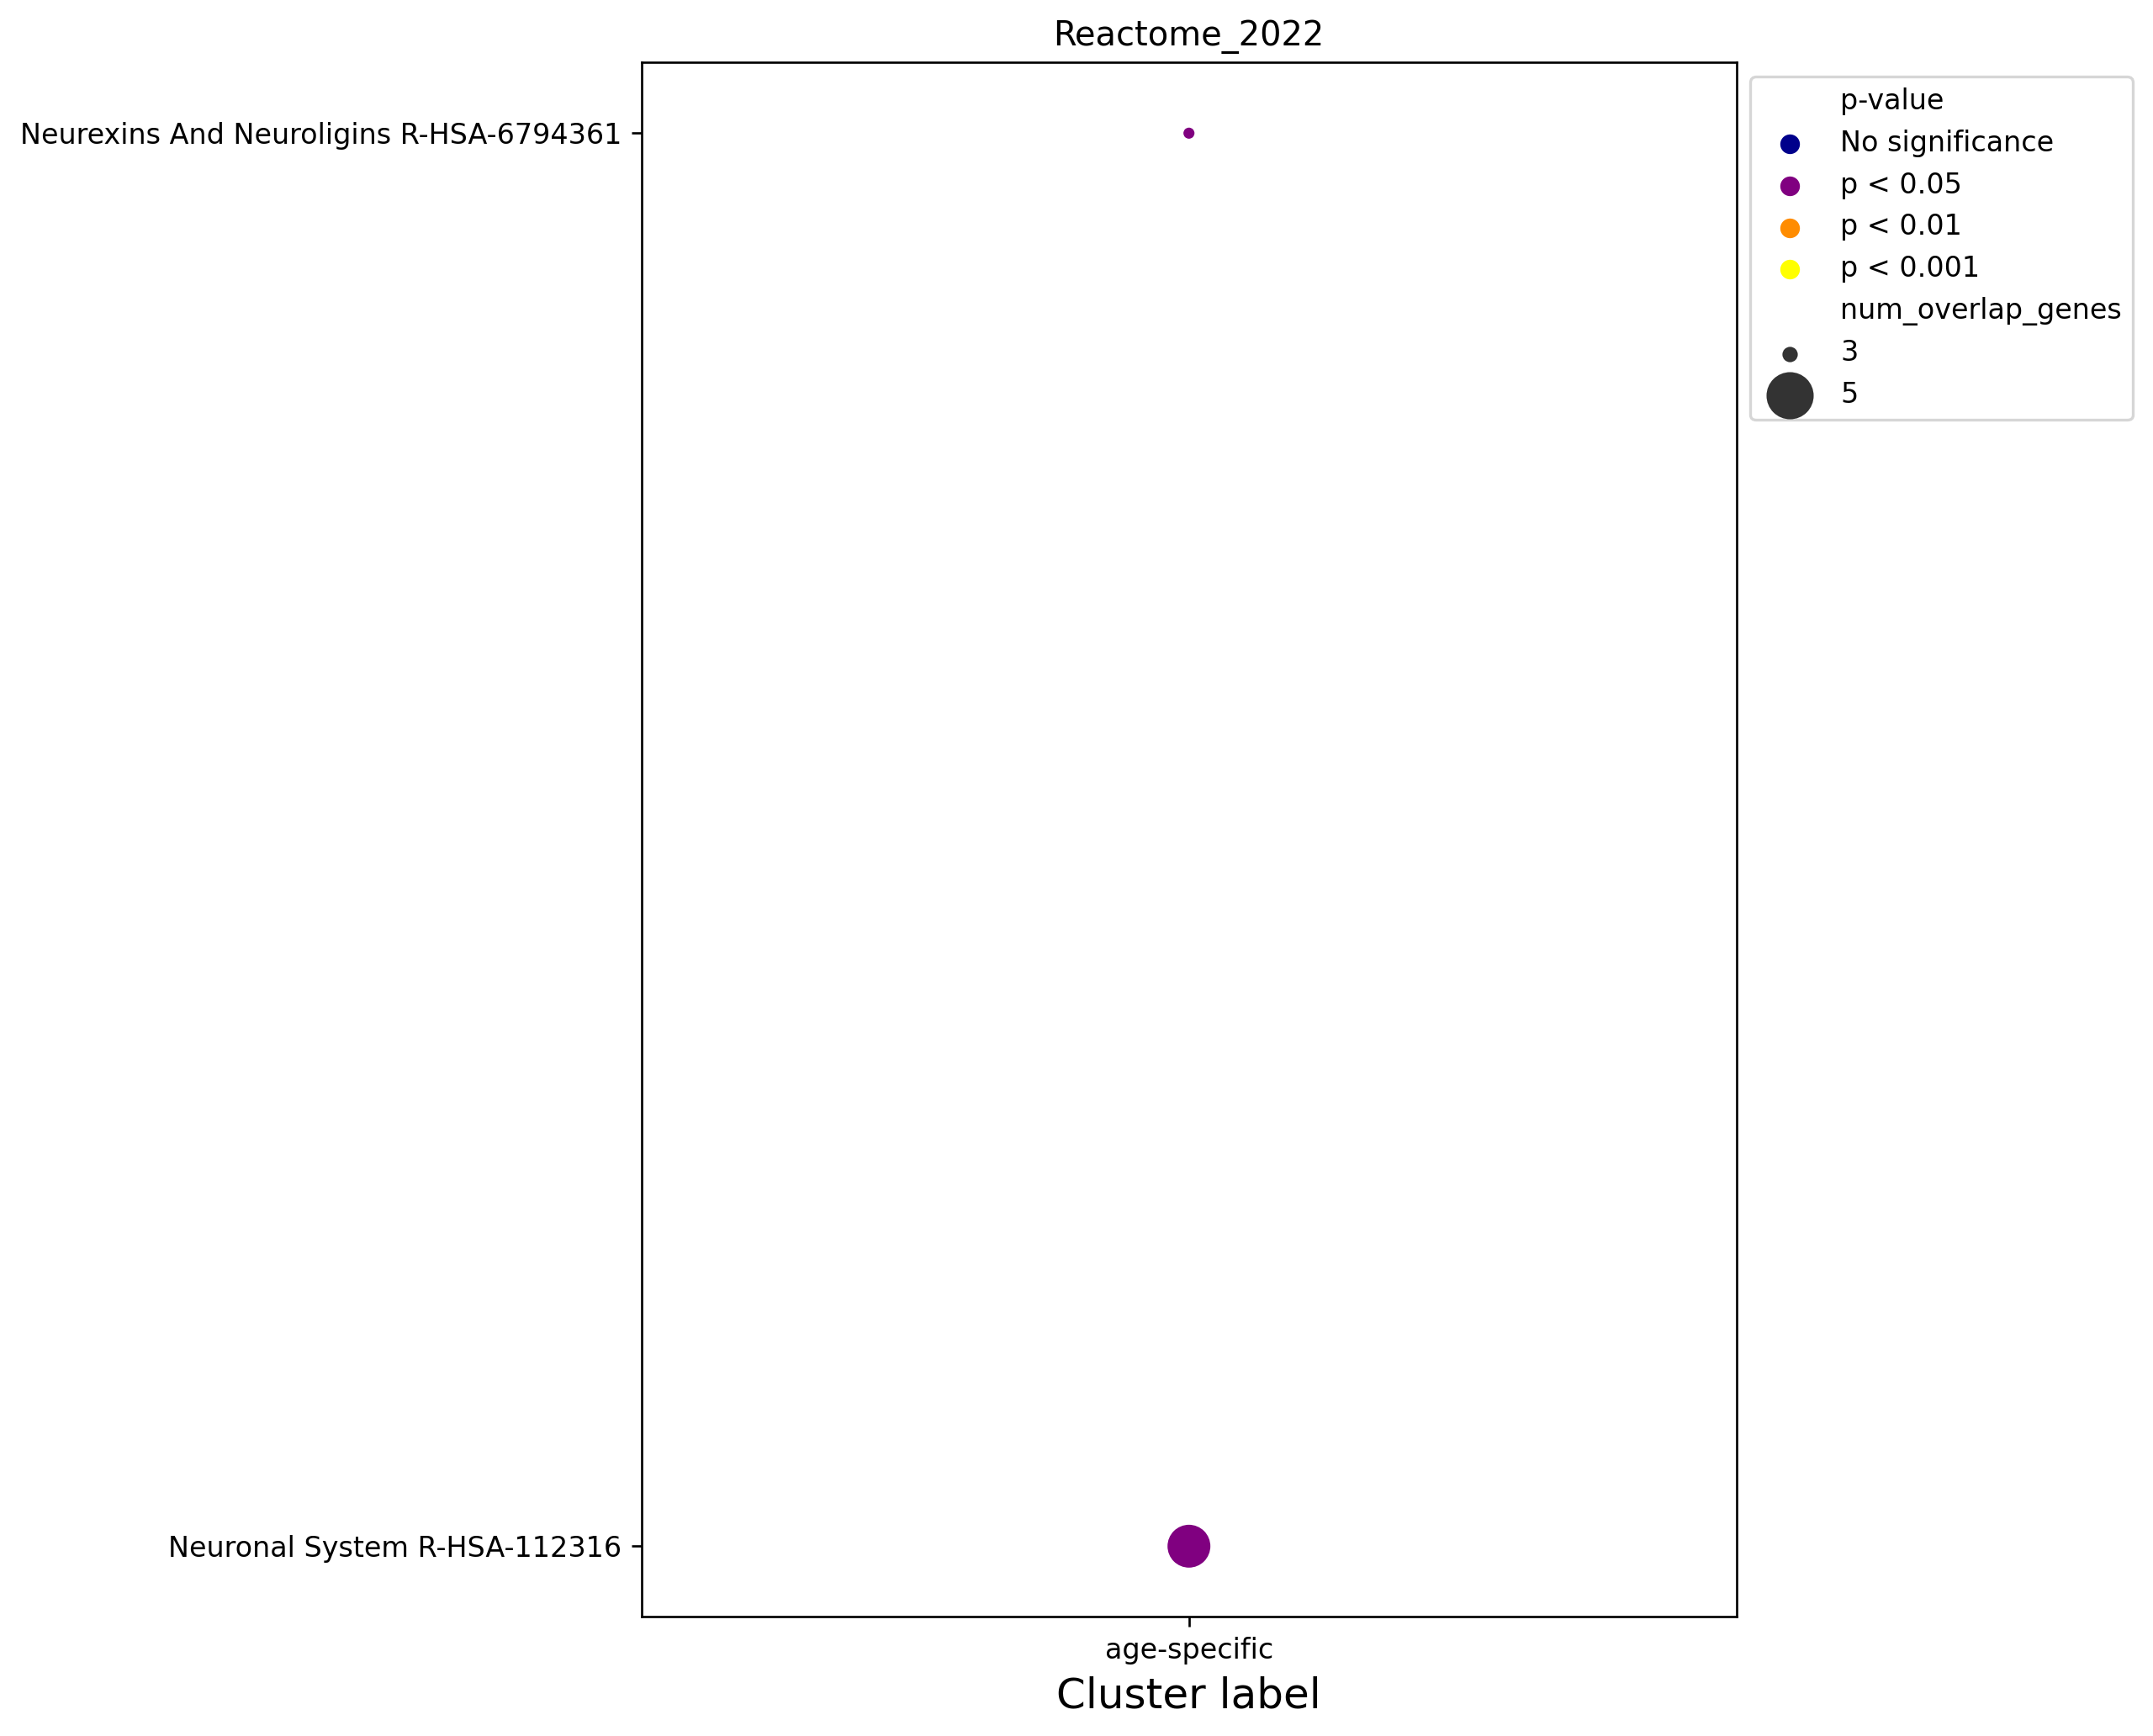

In [144]:
fig = plt.figure(figsize=(7, 10), dpi=120)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## KEGG_2021_Human

In [145]:
db_name = 'KEGG_2021_Human'
GeneCluster.enrich_geneclusters(gene_clust, db_name)

In [146]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val    Z-score  \
Term                                                                
cGMP-PKG signaling pathway                 1  0.001961  13.886747   
Adrenergic signaling in cardiomyocytes     2  0.002164  13.397093   
cAMP signaling pathway                     3  0.003653  11.052404   
Gastric acid secretion                     4  0.005782  19.897040   
Cell adhesion molecules                    5  0.010487  14.408964   

                                        Combined score  \
Term                                                     
cGMP-PKG signaling pathway                   86.572145   
Adrenergic signaling in cardiomyocytes       82.202675   
cAMP signaling pathway                       62.027361   
Gastric acid secretion                      102.528566   
Cell adhesion molecules                      65.670431   

                                              Overlapping genes  \
Term                                                              
cGMP-PKG signaling pathway              [PPP1CC, ATP1A3, GNAI1]   
Adrenergic signaling in cardiomyocytes  [PPP1CC, ATP1A3, GNAI1]   
cAMP signaling pathway                  [PPP1CC, ATP1A3, GNAI1]   
Gastric acid secretion                          [ATP1A3, GNAI1]   
Cell adhesion molecules                          [NRXN1, NRXN2]   

                                        Adjusted P-value  Old p-value  \
Term                                                                    
cGMP-PKG signaling pathway                      0.111439            0   
Adrenergic signaling in cardiomyocytes          0.111439            0   
cAMP signaling pathway                          0.125431            0   
Gastric acid secretion                          0.148894            0   
Cell adhesion molecules                         0.181179            0   

                                        Old adjusted p-value  \
Term                                                           
cGMP-PKG signaling pathway                                 0   
Adrenergic signaling in cardiomyocytes                     0   
cAMP signaling pathway                                     0   
Gastric acid secretion                                     0   
Cell adhesion molecules                                    0   

                                        num_overlap_genes  neg_log10(p_adj)  \
Term                                                                          
cGMP-PKG signaling pathway                              3          0.952963   
Adrenergic signaling in cardiomyocytes                  3          0.952963   
cAMP signaling pathway                                  3          0.901595   
Gastric acid secretion                                  2          0.827123   
Cell adhesion molecules                                 2          0.741891   

                                       cluster_label  
Term                                                  
cGMP-PKG signaling pathway              age-specific  
Adrenergic signaling in cardiomyocytes  age-specific  
cAMP signaling pathway                  age-specific  
Gastric acid secretion                  age-specific  
Cell adhesion molecules                 age-specific

In [147]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05)].index.unique()
terms.size

0

In [148]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

C:\Users\aleks\AppData\Local\Temp\ipykernel_660\1637178367.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


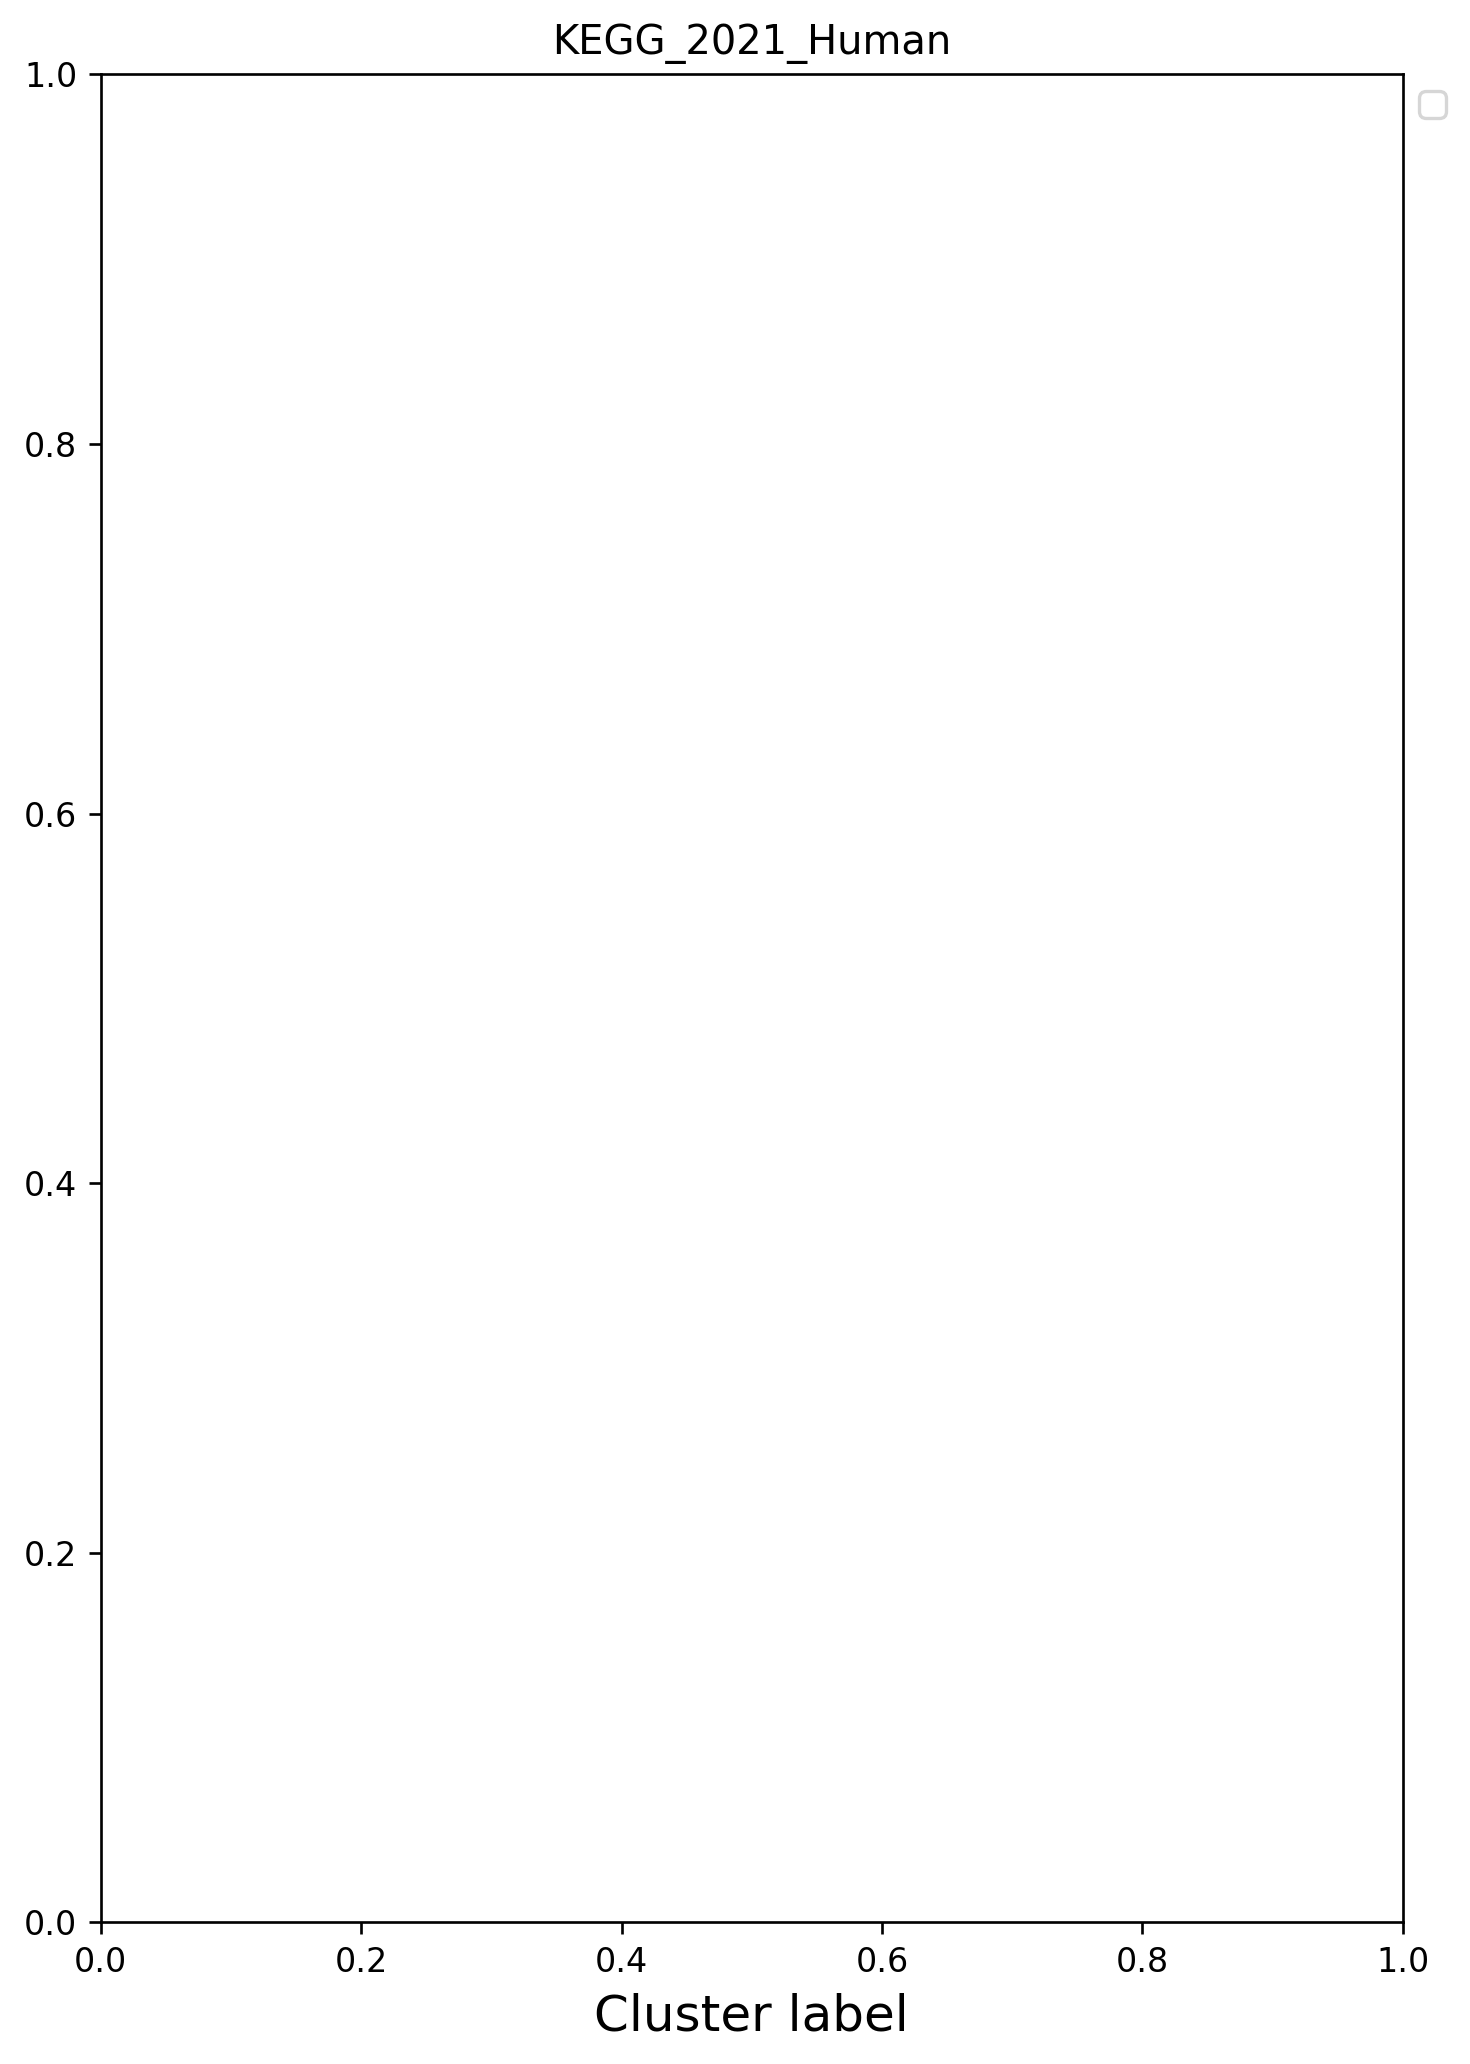

In [149]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 10), dpi=120)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))